In [2]:
pacman::p_load(ggplot2,tidyverse,data.table,bbmle,patchwork)

[1] "0.636416136756131; window-100 to -100; strain:Chaetoceros_deflandrei_"
[1] "0.25450457591979; window-100 to -100; strain:Corethron_pennatum_"
[1] "0.642577937932253; window-100 to -100; strain:Fragilariopsis_cylindrus_"
[1] "0.547599781068888; window-100 to -100; strain:Fragilariopsis_kerguelensis_"
[1] "0.579785683925847; window-100 to -100; strain:Pseudo-nitzschia_turgiduloides_"
[1] "0.683137381671057; window-100 to -100; strain:Stellarima_microtrias_"
[1] "0.483403356184525; window-100 to -100; strain:Synedra__"
[1] "0.842184958411662; window-100 to -100; strain:Emiliania_huxleyi_"
[1] "1.13554835305757; window-100 to -100; strain:Emiliania_huxleyi_R strain TQ26"
[1] "0.84120027317404; window-100 to -100; strain:Gephyrocapsa_oceanica_AB1, CAWPOT"
[1] "0.246735775507771; window-100 to -100; strain:Alexandrium_minutum_"
[1] "broken"
[1] "0.325834373241038; window-100 to -100; strain:Calcidiscus_leptoporus_NS10-2"
[1] "0.689382396858779; window-100 to -100; strain:Emiliania_huxle

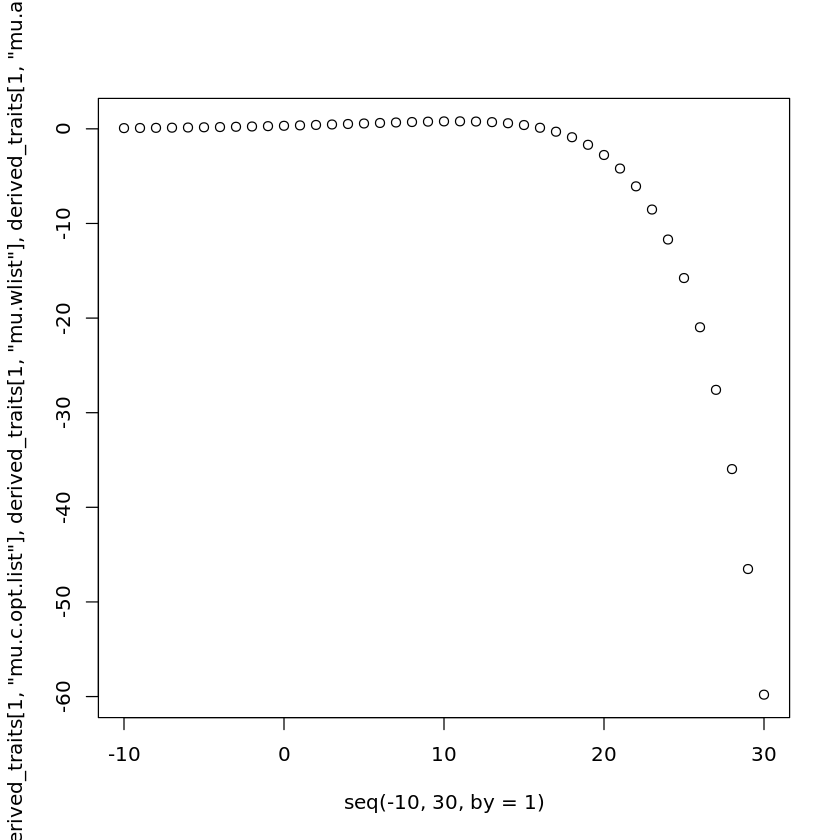

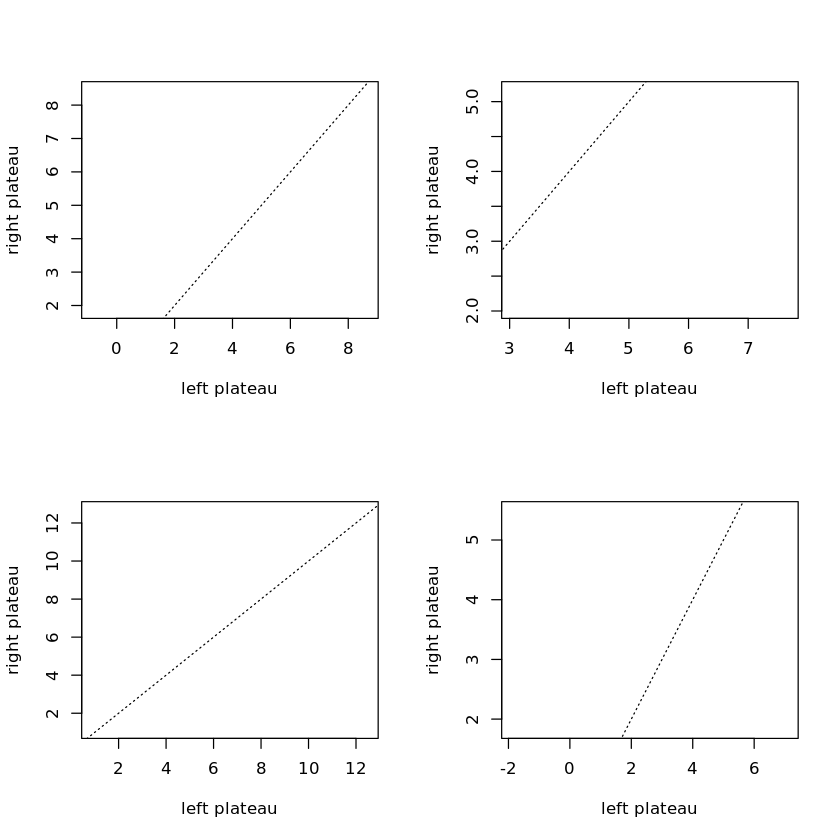

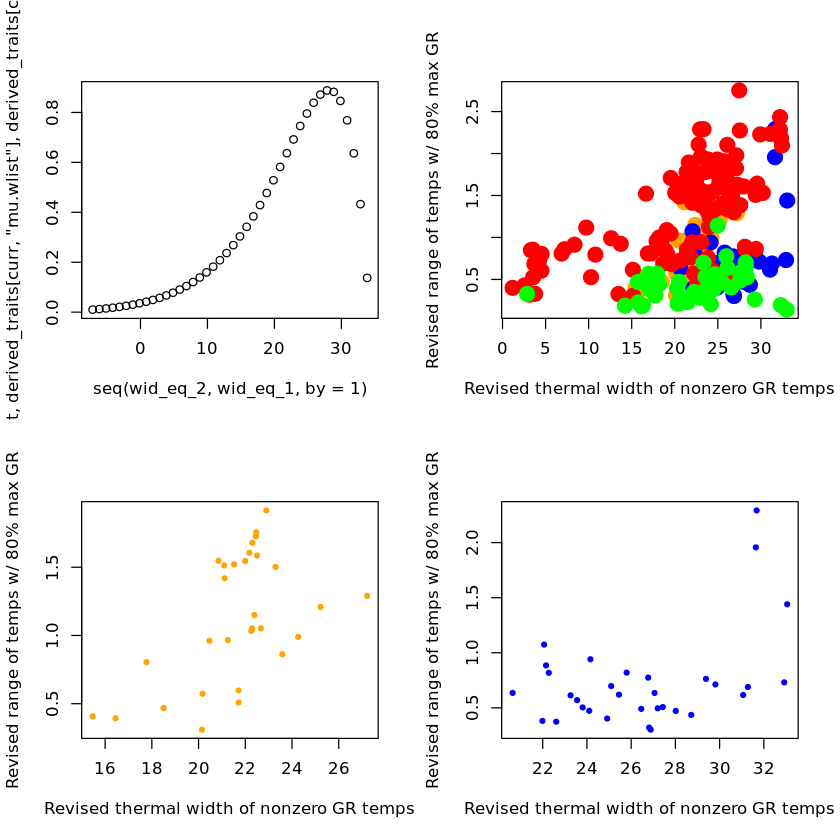

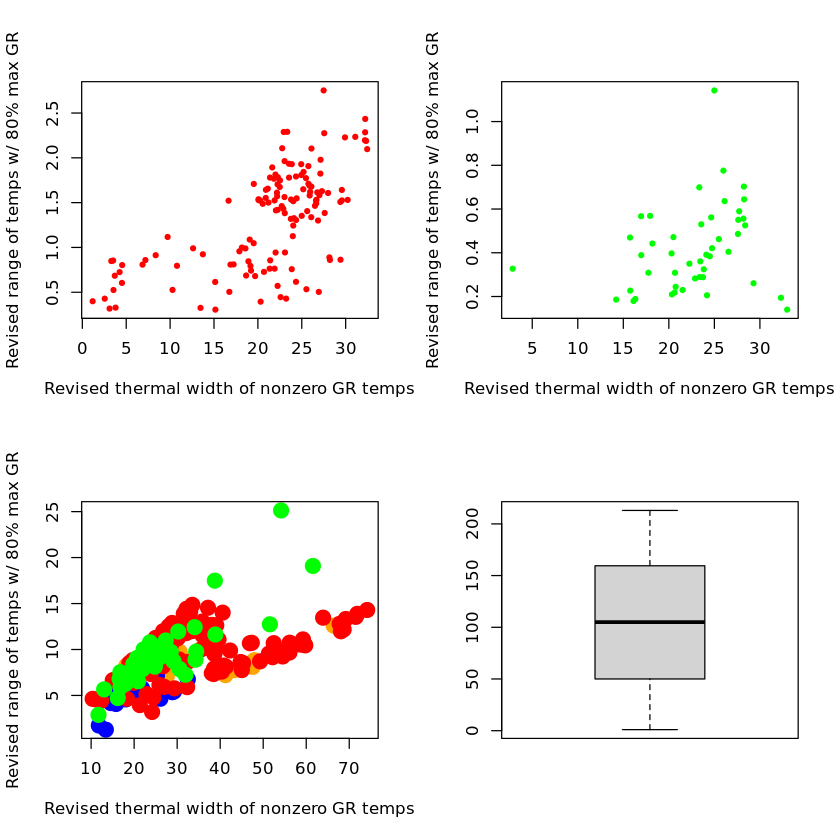


Call:
lm(formula = Revised_plateau ~ Revised_wid, data = revised_df[revised_df$Group == 
    "coccolithophores", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1732 -1.2798  0.0885  1.0149  2.7150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.13647    0.83147   8.583 2.51e-09 ***
Revised_wid  0.05111    0.02652   1.928   0.0641 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.593 on 28 degrees of freedom
Multiple R-squared:  0.1172,	Adjusted R-squared:  0.08562 
F-statistic: 3.715 on 1 and 28 DF,  p-value: 0.06411



Call:
lm(formula = Revised_plateau ~ Revised_wid, data = revised_df[revised_df$Group == 
    "diatoms", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0550 -1.7141 -0.0884  1.7113  4.8932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.41803    0.55855  13.281  < 2e-16 ***
Revised_wid  0.07600    0.01468   5.177 8.13e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.371 on 133 degrees of freedom
Multiple R-squared:  0.1677,	Adjusted R-squared:  0.1615 
F-statistic:  26.8 on 1 and 133 DF,  p-value: 8.13e-07



Call:
lm(formula = Revised_plateau ~ Revised_wid, data = revised_df[revised_df$Group == 
    "dinoflagellates", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5064 -0.8348  0.1806  0.9675  7.0813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38957    0.80292   1.731   0.0905 .  
Revised_wid  0.30759    0.02884  10.665 8.83e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.956 on 44 degrees of freedom
Multiple R-squared:  0.7211,	Adjusted R-squared:  0.7147 
F-statistic: 113.7 on 1 and 44 DF,  p-value: 8.834e-14


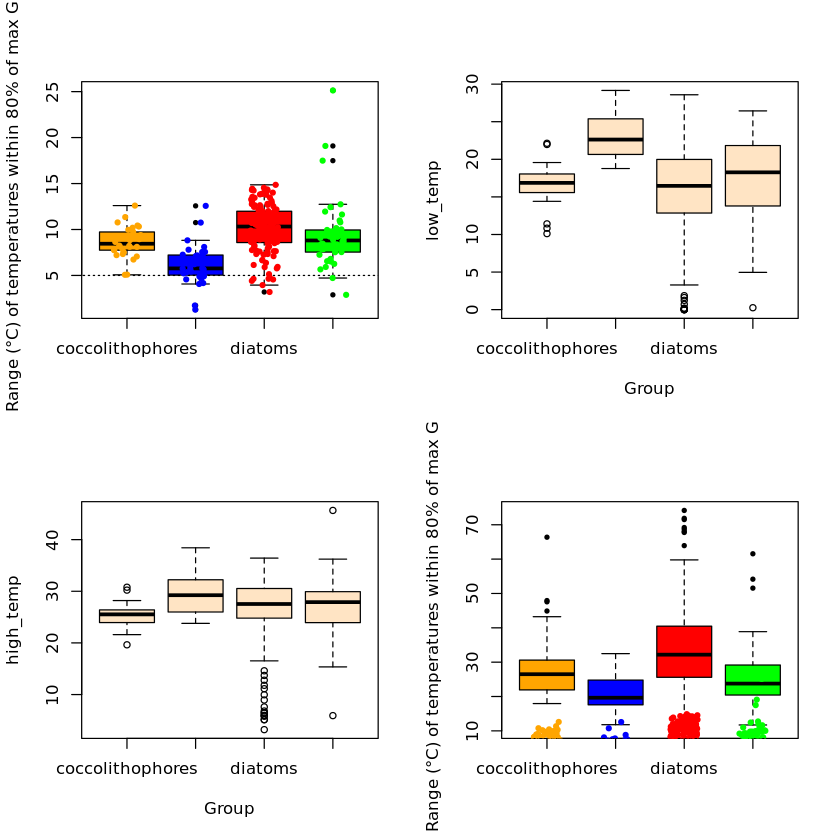

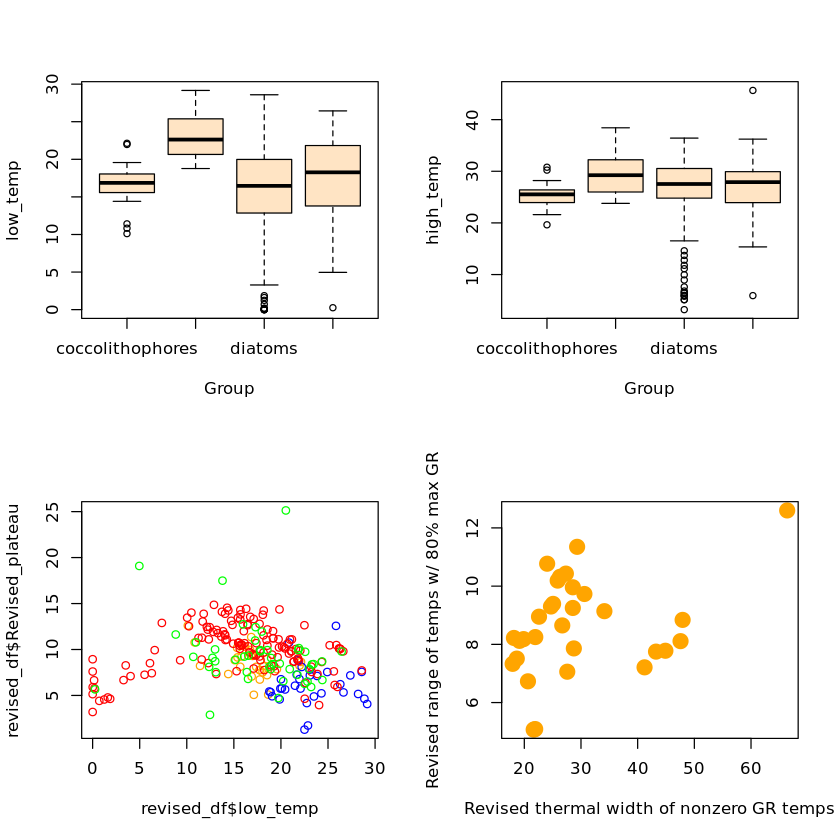

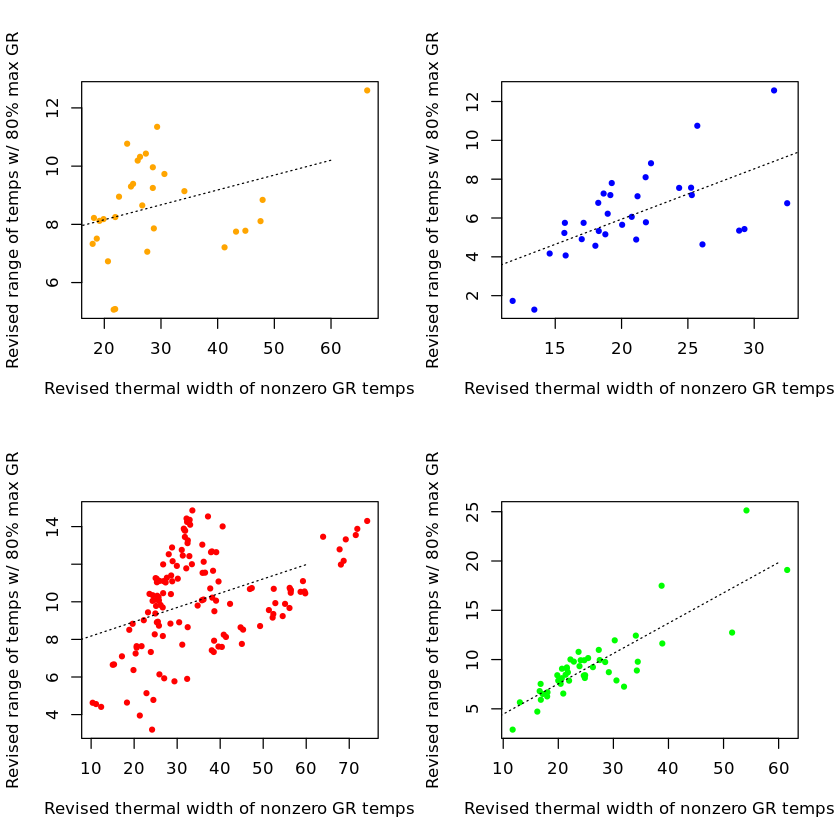

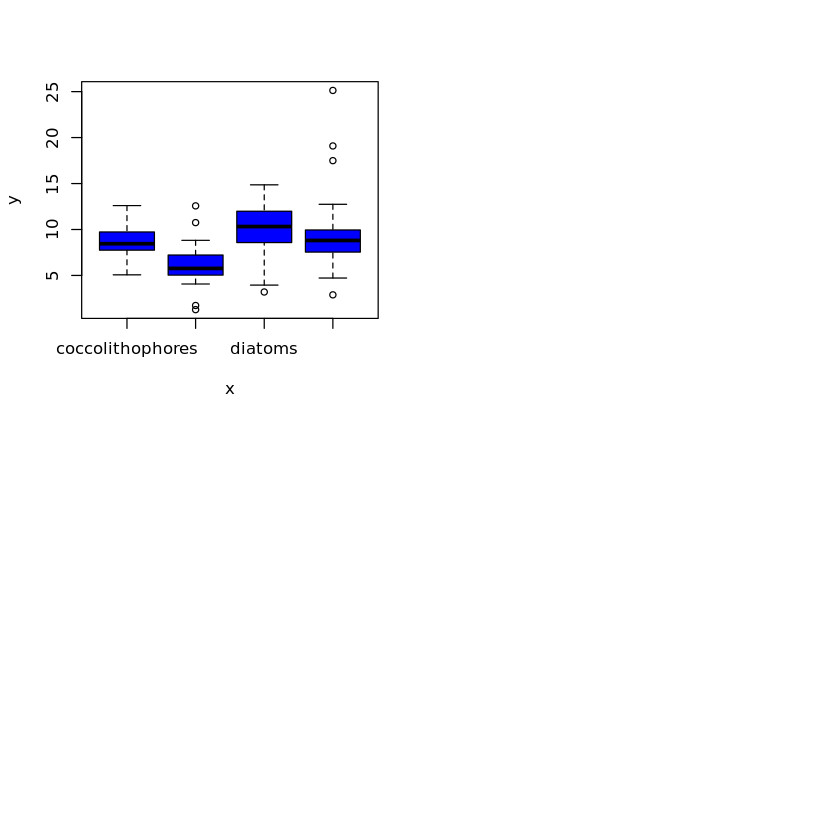

ERROR: Error in mfrow(c(2, 2)): could not find function "mfrow"


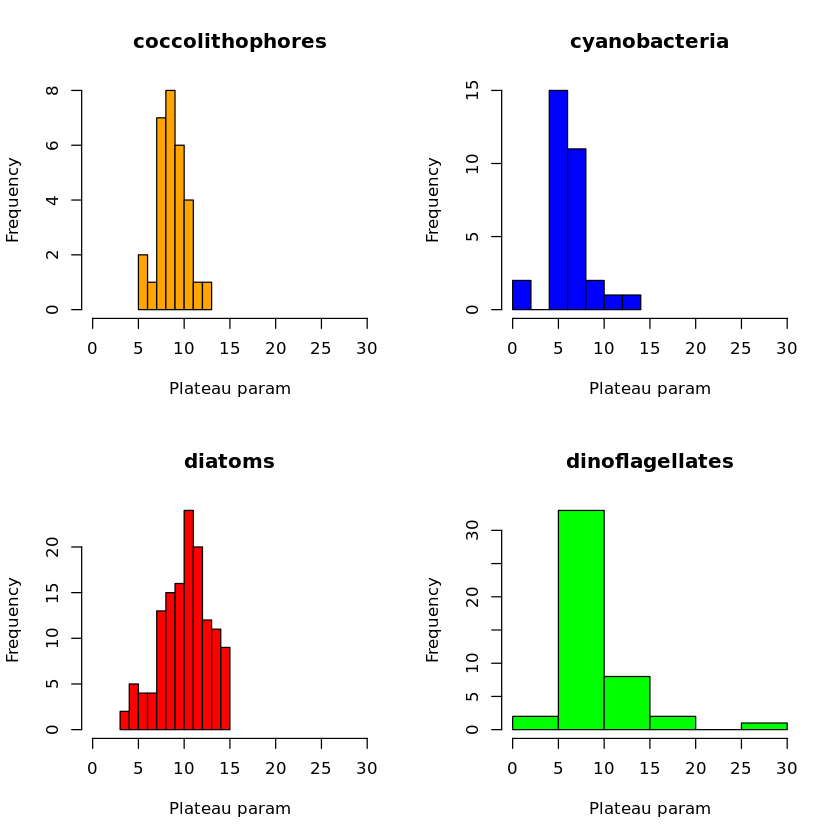

In [3]:
nbcurve <- function(x,opt,w,a,b){
  res<-a*exp(b*x)*(1-((x-opt)/(w/2))^2)
  res
}

derived_traits<-read.csv("../../data/PFT_thermal_response/data/derived_traits.csv")
gr_fr<-read.csv("../../data/PFT_thermal_response/data/growth_rates.csv")
derived_traits_merge<-merge(derived_traits,gr_fr,by="isolate.code")

plot(seq(-10,30,by=1),nbcurve(seq(-10,30,by=1),
                              derived_traits[1,"mu.c.opt.list"],
                              derived_traits[1,"mu.wlist"],
                              derived_traits[1,"mu.alist"],
                              derived_traits[1,"mu.blist"]))
recalculate=TRUE
# for (curr in c(1:nrow(derived_traits))) {
#   a=derived_traits[curr,"mu.alist"]
#   b=derived_traits[curr,"mu.blist"]
#   w=derived_traits[curr,"mu.wlist"]
#   opt=derived_traits[curr,"mu.c.opt.val.list"]
#   opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
#                      a=derived_traits[curr,"mu.alist"],
#                      b=derived_traits[curr,"mu.blist"],
#                      w=derived_traits[curr,"mu.wlist"],
#                      opt=derived_traits[curr,"mu.c.opt.val.list"])$maximum
#   wid_eq_1 = derived_traits[curr,"mu.wlist"]/2+
#     (all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
#   wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
#     derived_traits[curr,"mu.c.opt.val.list"]
#   if (recalculate) {
#     wid_eq_1 = (derived_traits[curr,"mu.wlist"])/2+
#       opt_val
#     wid_eq_2 = -(derived_traits[curr,"mu.wlist"])/2+
#       opt_val
#   }
#   tolerance_val=nbcurve(opt_val,opt,w,a,b)*0.8
#   temps_test=seq(from = wid_eq_2+sign(wid_eq_2)*wid_eq_2*0.5, 
#                  to = wid_eq_1+sign(wid_eq_2)*wid_eq_2*0.5, by = 0.01)
#   window_1 = -100
#   window_2 = -100
#   print(paste0(tolerance_val,"; window",window_1," to ",window_2,"; strain:",strain_curr))
#   for (temp in temps_test) {
#     if ((window_1<0)&(window_2<0)&(nbcurve(temp,opt,w,a,b) >= tolerance_val)) {
#       window_1 = temp
#     }else if ((window_2<0)&(window_1>0)&(nbcurve(temp,opt,w,a,b) <= tolerance_val)){
#       window_2=temp
#     }
#   }
#   revised_df = revised_df %>%
#     dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_opt=opt_val,
#                                 Revised_wid=abs(wid_eq_2-wid_eq_1)))
# }

recalculate=FALSE
revised_df=data.frame()
for (curr in c(1:nrow(derived_traits))) {
  strain_curr=paste(derived_traits[curr,"genus"],
                    derived_traits[curr,"species"],
               derived_traits[curr,"strain"],sep="_")
  group_curr=derived_traits[curr,"group"]
  if (length(group_curr)==0) {
    group_curr="unknown"
  }
  a=derived_traits[curr,"mu.alist"]
  b=derived_traits[curr,"mu.blist"]
  w=derived_traits[curr,"mu.wlist"]
  opt=derived_traits[curr,"mu.c.opt.list"]
  opt_val = optimize(nbcurve,interval=c(-20,40),maximum=TRUE,
                     a=derived_traits[curr,"mu.alist"],
                     b=derived_traits[curr,"mu.blist"],
                     w=derived_traits[curr,"mu.wlist"],
                     opt=opt)$maximum
  if (abs(opt_val) > 100) {
    next # these original parameterizations were bad.
  }
  wid_eq_1 = derived_traits[curr,"mu.wlist"]/2+
    opt
  wid_eq_2 = -derived_traits[curr,"mu.wlist"]/2+
    opt
  tol_gr=0.01 ## we don't want to say the width is valid when GR<this
  test_temp=wid_eq_1
  while ((nbcurve(test_temp,opt,w,a,b) < tol_gr)) {
    test_temp=test_temp+sign(test_temp)*-0.001
  }
  wid_eq_1=test_temp
  test_temp=wid_eq_2
  while ((nbcurve(test_temp,opt,w,a,b) < tol_gr)) {
    test_temp=test_temp+sign(test_temp-wid_eq_1)*-0.001
  }
  wid_eq_2=test_temp
  
  if (recalculate) {
    wid_eq_1 = (derived_traits[curr,"mu.wlist"])/2+
      opt_val
    wid_eq_2 = -(derived_traits[curr,"mu.wlist"])/2+
      opt_val
  }
  tolerance_val=nbcurve(opt_val,opt,w,a,b)*0.8
  temps_test=seq(from = wid_eq_2+sign(wid_eq_2)*wid_eq_2*0.5, 
                 to = wid_eq_1+sign(wid_eq_2)*wid_eq_2*0.5, by = 0.01)
  window_1 = -100
  window_2 = -100
  print(paste0(tolerance_val,"; window",window_1," to ",window_2,"; strain:",strain_curr))
  for (temp in temps_test) {
    if ((window_1<0)&(window_2<0)&(nbcurve(temp,opt,w,a,b) >= tolerance_val)) {
      window_1 = temp
    }else if ((window_2<0)&(window_1>0)&(nbcurve(temp,opt,w,a,b) <= tolerance_val)){
      window_2=temp
    }
  }
  if ((window_1==-100)|(window_2==-100)){
    print("broken")
    break
  }
  if (abs(wid_eq_2-wid_eq_1) > 50) {
    print("broken")
    #break
  }
  revised_df = rbind(revised_df,
                     data.frame(Strain=strain_curr,Revised_opt=opt_val,
                                Group=group_curr,
                                Revised_wid=abs(wid_eq_2-wid_eq_1),
                                Revised_plateau=abs(window_1-window_2),
                                low_temp=window_1,high_temp=window_2,
                                max_GR=nbcurve(opt_val,opt,w,a,b),
                                t_opt=opt_val,a=a,b=b,w=w))
}
revised_df$left_plateau=revised_df$t_opt-revised_df$low_temp
revised_df$right_plateau=revised_df$high_temp-revised_df$t_opt
par(mfrow=c(2,2))
for (group in unique(revised_df$Group)) {
  
  plot(x=revised_df[!is.na(revised_df$right_plateau)&
                      !is.na(revised_df$Strain)&(revised_df$Group==group),"left_plateau"],
       y=revised_df[!is.na(revised_df$right_plateau)&
                      !is.na(revised_df$Strain)&(revised_df$Group==group),"right_plateau"],
       pch=20,cex=3,
       col=revised_df[!is.na(revised_df$right_plateau)&
                        !is.na(revised_df$Strain)&(revised_df$Group==group),"Color"],
       ylab="right plateau",
       xlab="left plateau")
  lines(seq(0,15,by=1),seq(0,15,by=1),lty="dotted")
}

plot(seq(wid_eq_2,wid_eq_1,by=1),nbcurve(seq(wid_eq_2,wid_eq_1,by=1),
                              opt,
                              derived_traits[curr,"mu.wlist"],
                              derived_traits[curr,"mu.alist"],
                              derived_traits[curr,"mu.blist"]))


color_frame=data.frame("Group"=c("diatoms","coccolithophores",
                                 "dinoflagellates","cyanobacteria"),
                       "Color"=c("red","orange","green","blue"))
revised_df=merge(revised_df,color_frame)
plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"t_opt"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"max_GR"],
     pch=20,cex=3,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain),"Color"],
     ylab="Revised range of temps w/ 80% max GR",
     xlab="Revised thermal width of nonzero GR temps")
for (group in unique(revised_df$Group)) {
  plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"t_opt"],
       y=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"max_GR"],
       pch=20,
       col=revised_df[!is.na(revised_df$Revised_plateau)&
                        !is.na(revised_df$Strain)&
                        revised_df$Group==group,"Color"],
       ylab="Revised range of temps w/ 80% max GR",
       xlab="Revised thermal width of nonzero GR temps")
  cocco_model=summary(lm(formula = max_GR~t_opt+t_opt*t_opt,
                         data = revised_df[revised_df$Group==group,]))
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["Revised_wid","Estimate"]
  lines(seq(0,60,by=1),seq(0,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted")
}

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Revised_wid"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Revised_plateau"],
     pch=20,cex=3,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"Color"],
     ylab="Revised range of temps w/ 80% max GR",
     xlab="Revised thermal width of nonzero GR temps")
boxplot(x=factor(revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Strain"]),
        y=revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Revised_plateau"])
boxplot(Revised_plateau ~ Group, data = revised_df, 
        col = unique(revised_df$Color),pch=20,
        xlab="",ylab="Range (°C) of temperatures within 80% of max GR")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,col=revised_df$Color,pch=20)
boxplot(low_temp ~ Group, data = revised_df, col = "bisque")
boxplot(high_temp ~ Group, data = revised_df, col = "bisque")

boxplot(Revised_wid ~ Group, data = revised_df, 
        col = unique(revised_df$Color),pch=20,
        xlab="",ylab="Range (°C) of temperatures within 80% of max GR")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,col=revised_df$Color,pch=20)
boxplot(low_temp ~ Group, data = revised_df, col = "bisque")
boxplot(high_temp ~ Group, data = revised_df, col = "bisque")

summary(lm(formula = Revised_plateau~Revised_wid,
   data = revised_df[revised_df$Group=="coccolithophores",]))
summary(lm(formula = Revised_plateau~Revised_wid,
           data = revised_df[revised_df$Group=="diatoms",]))
summary(lm(formula = Revised_plateau~Revised_wid,
           data = revised_df[revised_df$Group=="dinoflagellates",]))
plot(x=revised_df$low_temp,y=revised_df$Revised_plateau,
     col=revised_df$Color)

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain)&
                    (revised_df$Group=="coccolithophores"),"Revised_wid"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain)&
                    (revised_df$Group=="coccolithophores"),"Revised_plateau"],
     pch=20,cex=3,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain)&
                    (revised_df$Group=="coccolithophores"),"Color"],
     ylab="Revised range of temps w/ 80% max GR",
     xlab="Revised thermal width of nonzero GR temps")


for (group in unique(revised_df$Group)) {
  plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"Revised_wid"],
       y=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"Revised_plateau"],
       pch=20,
       col=revised_df[!is.na(revised_df$Revised_plateau)&
                        !is.na(revised_df$Strain)&
                        revised_df$Group==group,"Color"],
       ylab="Revised range of temps w/ 80% max GR",
       xlab="Revised thermal width of nonzero GR temps")
  cocco_model=summary(lm(formula = Revised_plateau~Revised_wid,
                         data = revised_df[revised_df$Group==group,]))
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["Revised_wid","Estimate"]
  lines(seq(0,60,by=1),seq(0,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted")
}

plot(y=as.numeric(revised_df$Revised_plateau),x=factor(revised_df$Group),
        col="blue")
par(mfrow=c(2,2))
for (group in unique(revised_df$Group)) {
  hist(x=revised_df[revised_df$Group==group,"Revised_plateau"],
       col =revised_df[revised_df$Group==group,"Color"],xlab="Plateau param",
       main=group,xlim=c(0,30))

}

par(mfrow(c(2,2)))
for (group in unique(revised_df$Group)) {
  plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"t_opt"],
       y=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"Revised_plateau"],
       pch=20,
       col=revised_df[!is.na(revised_df$Revised_plateau)&
                        !is.na(revised_df$Strain)&
                        revised_df$Group==group,"Color"],
       ylab="thermal width of 80% of max growth rate",
       xlab="Thermal optimum (°C)",ylim=c(0,26),xlim=c(0,35))
  dev.hold()
  cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                         data = revised_df[revised_df$Group==group,]))
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["t_opt","Estimate"]
  lines(seq(0,60,by=1),seq(0,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted")
}
par(mfrow=c(1,2))

boxplot(Revised_plateau ~ Group, data = revised_df, 
        col = unique(revised_df$Color),pch=20,
        xlab="",ylab="thermal width (°C) of 80% of max growth rate")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,col=revised_df$Color,pch=20)

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"t_opt"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"Revised_plateau"],
     pch=20,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain),"Color"],
     ylab="thermal width (°C) of 80% of max growth rate",
     xlab="Thermal optimum (°C)",ylim=c(0,26),xlim=c(0,35))
for (group in c("diatoms","cyanobacteria")) {#unique(revised_df$Group)) {
  dev.hold()
  cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                         data = revised_df[revised_df$Group==group,]))
  print(group)
  print(cocco_model)
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["t_opt","Estimate"]
  lines(seq(-10,60,by=1),seq(-10,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted",col=unique(revised_df[revised_df$Group==group,"Color"]),
        lwd=2)
}
cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                       data = revised_df))


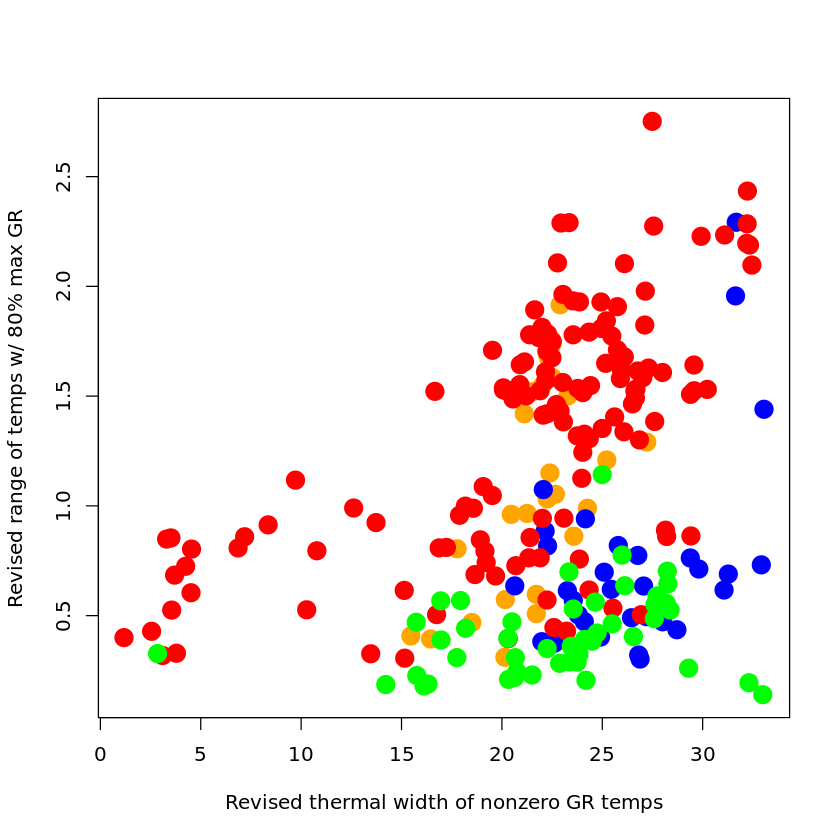

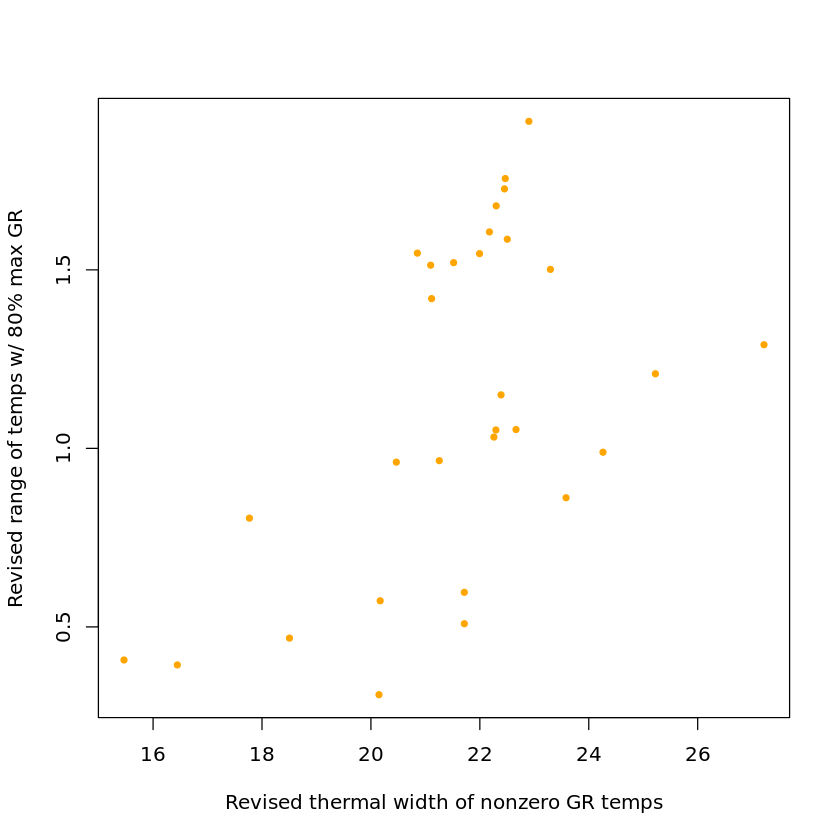

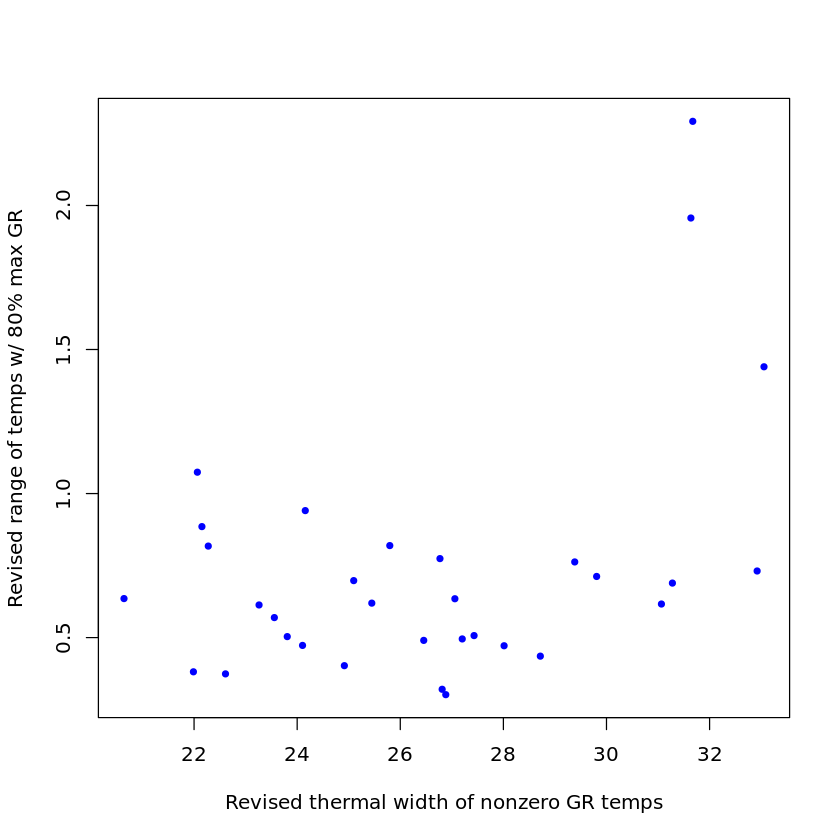

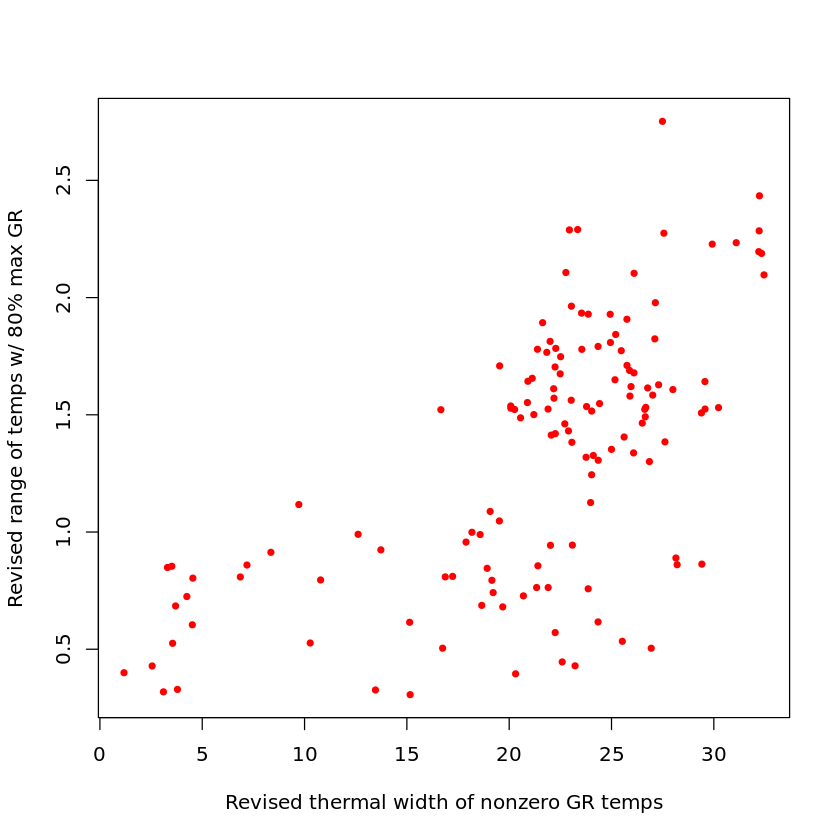

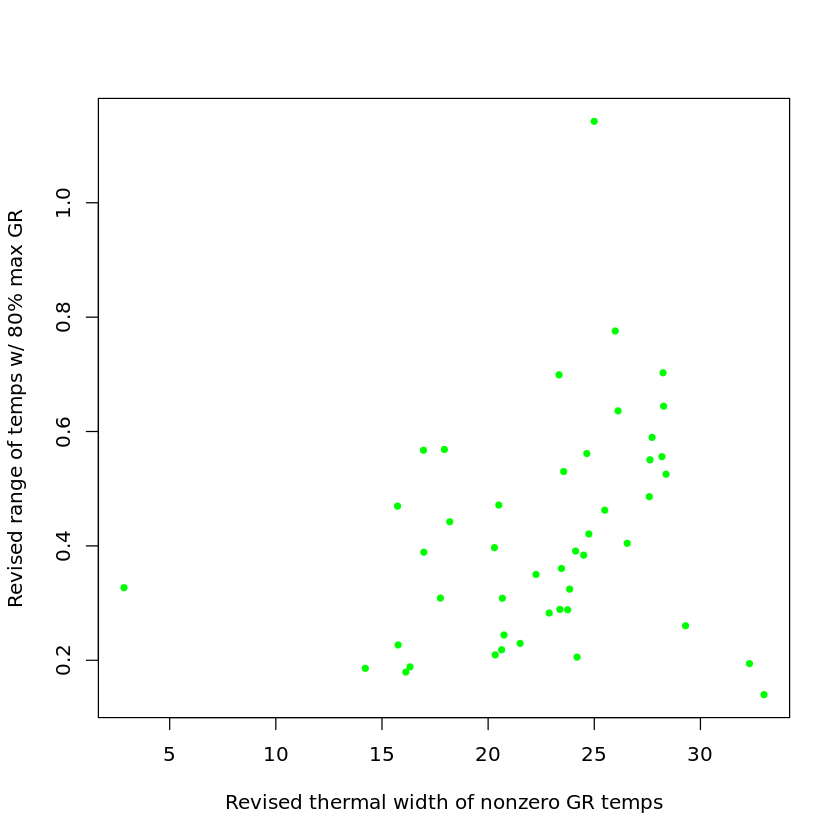

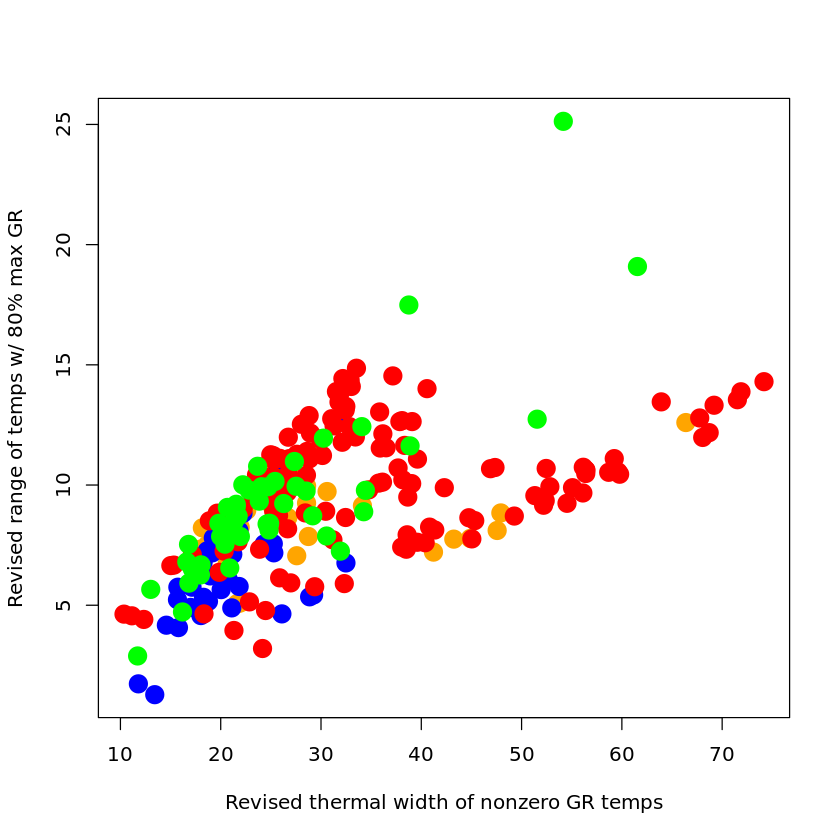

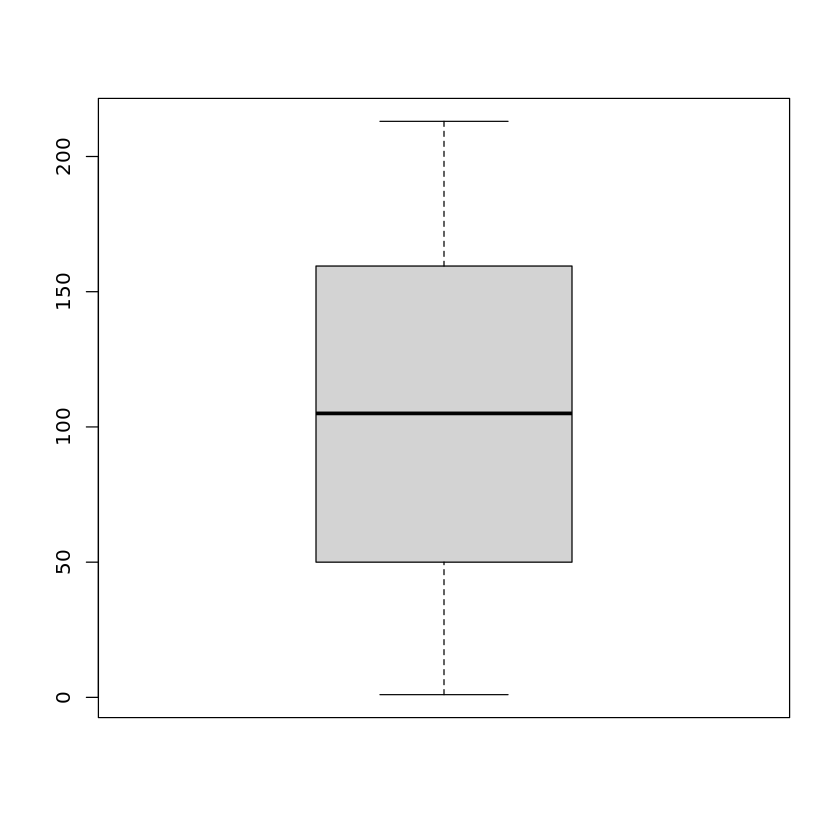

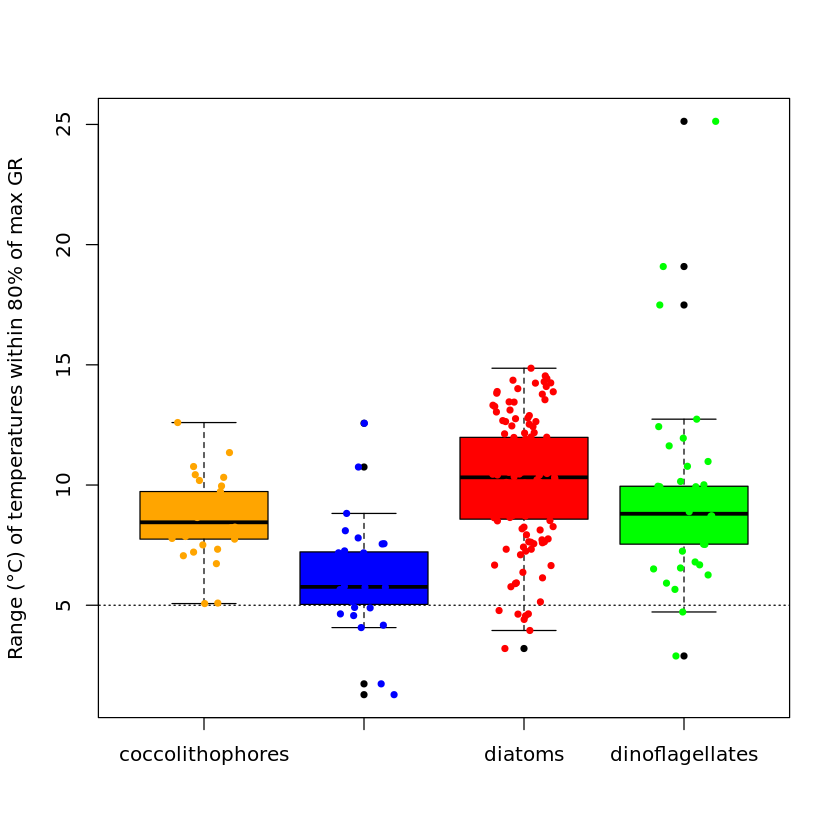

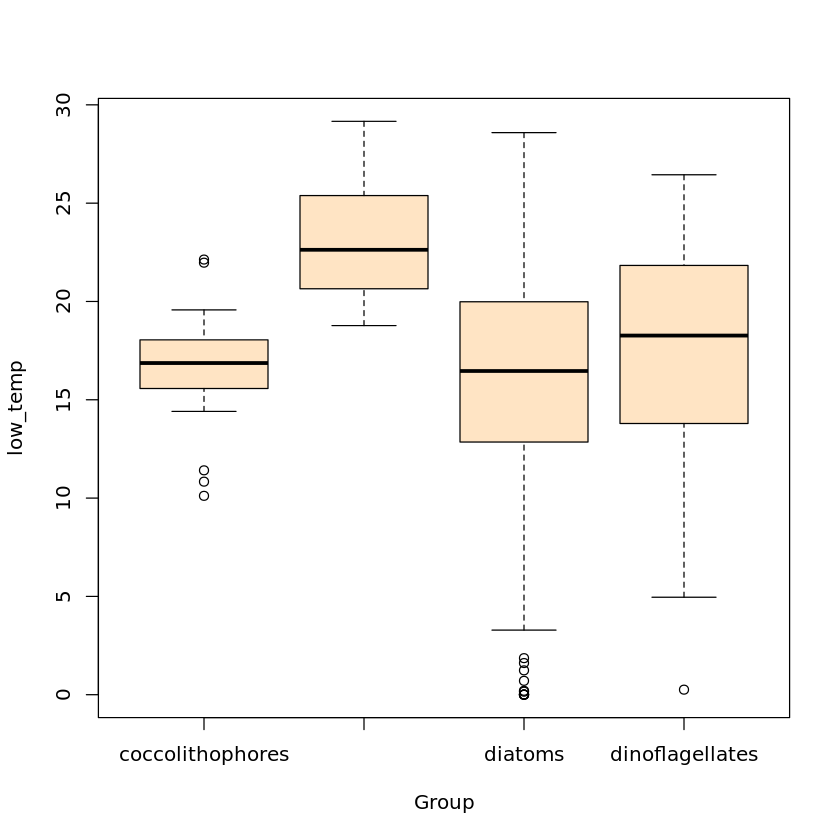

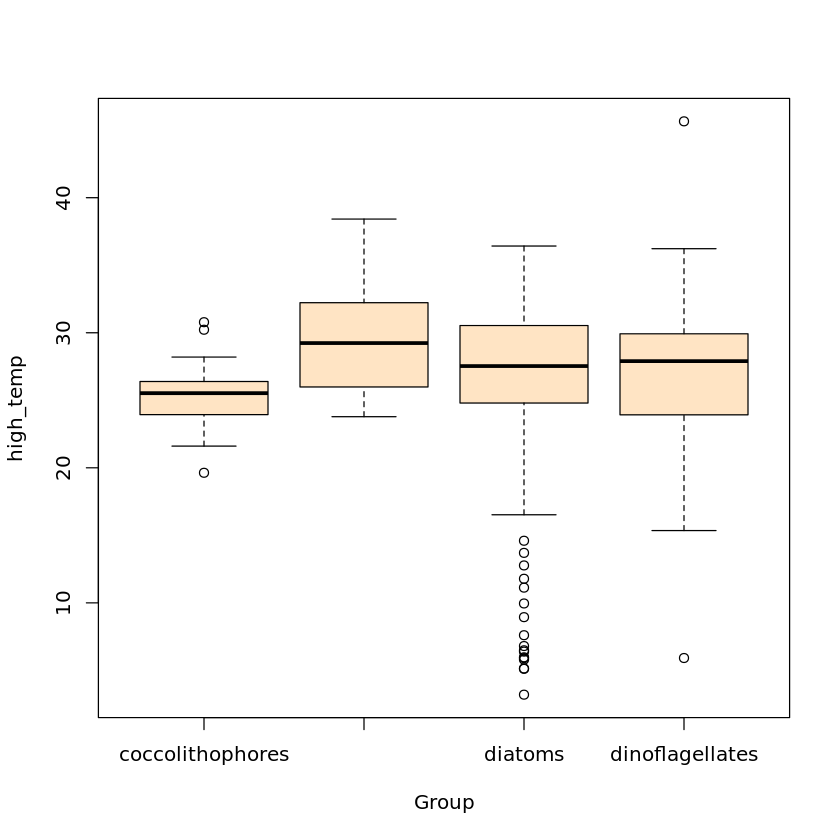

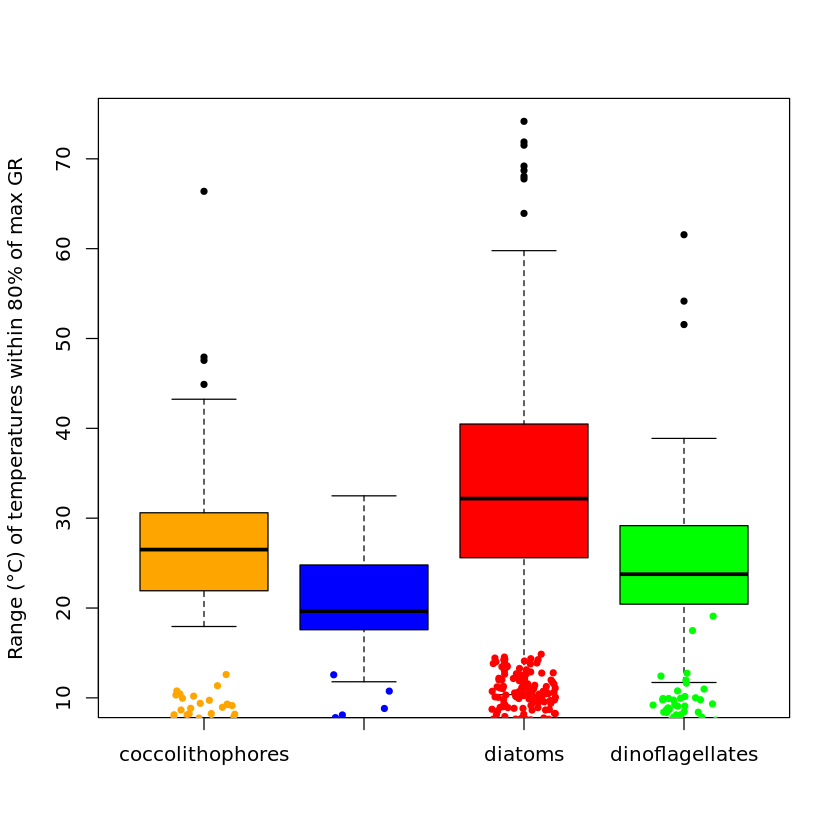

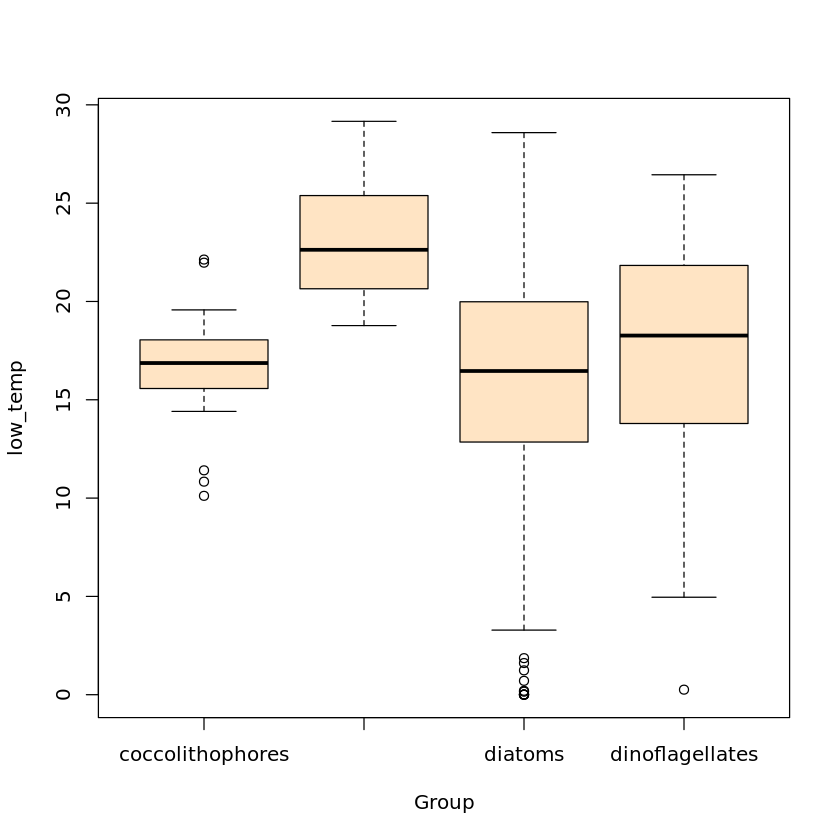


Call:
lm(formula = Revised_plateau ~ Revised_wid, data = revised_df[revised_df$Group == 
    "coccolithophores", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1732 -1.2798  0.0885  1.0149  2.7150 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.13647    0.83147   8.583 2.51e-09 ***
Revised_wid  0.05111    0.02652   1.928   0.0641 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.593 on 28 degrees of freedom
Multiple R-squared:  0.1172,	Adjusted R-squared:  0.08562 
F-statistic: 3.715 on 1 and 28 DF,  p-value: 0.06411



Call:
lm(formula = Revised_plateau ~ Revised_wid, data = revised_df[revised_df$Group == 
    "diatoms", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.0550 -1.7141 -0.0884  1.7113  4.8932 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.41803    0.55855  13.281  < 2e-16 ***
Revised_wid  0.07600    0.01468   5.177 8.13e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.371 on 133 degrees of freedom
Multiple R-squared:  0.1677,	Adjusted R-squared:  0.1615 
F-statistic:  26.8 on 1 and 133 DF,  p-value: 8.13e-07



Call:
lm(formula = Revised_plateau ~ Revised_wid, data = revised_df[revised_df$Group == 
    "dinoflagellates", ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5064 -0.8348  0.1806  0.9675  7.0813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.38957    0.80292   1.731   0.0905 .  
Revised_wid  0.30759    0.02884  10.665 8.83e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.956 on 44 degrees of freedom
Multiple R-squared:  0.7211,	Adjusted R-squared:  0.7147 
F-statistic: 113.7 on 1 and 44 DF,  p-value: 8.834e-14


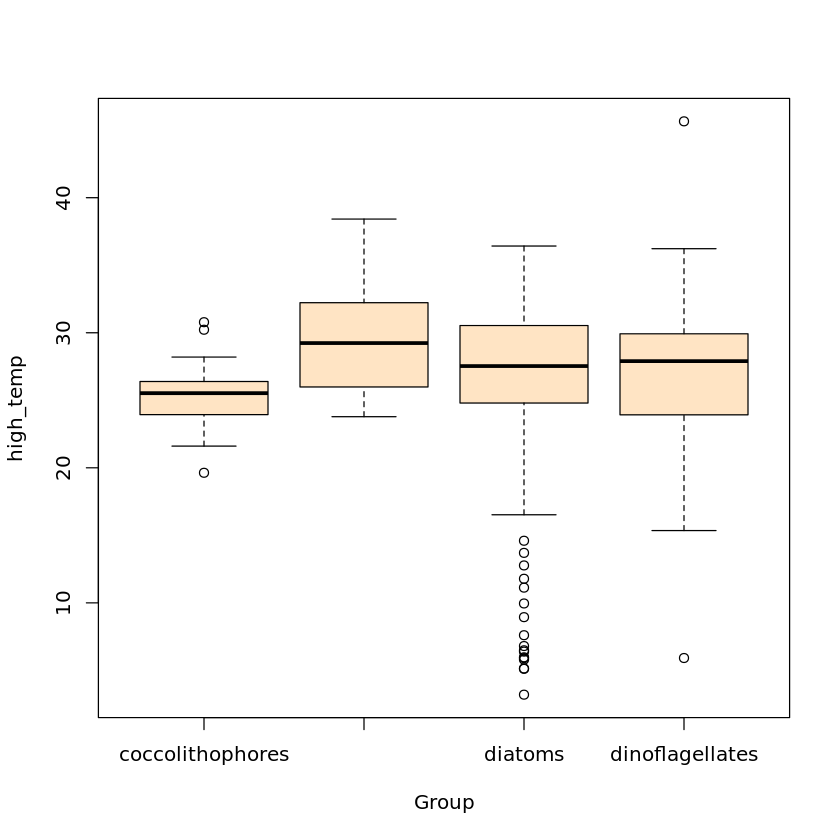

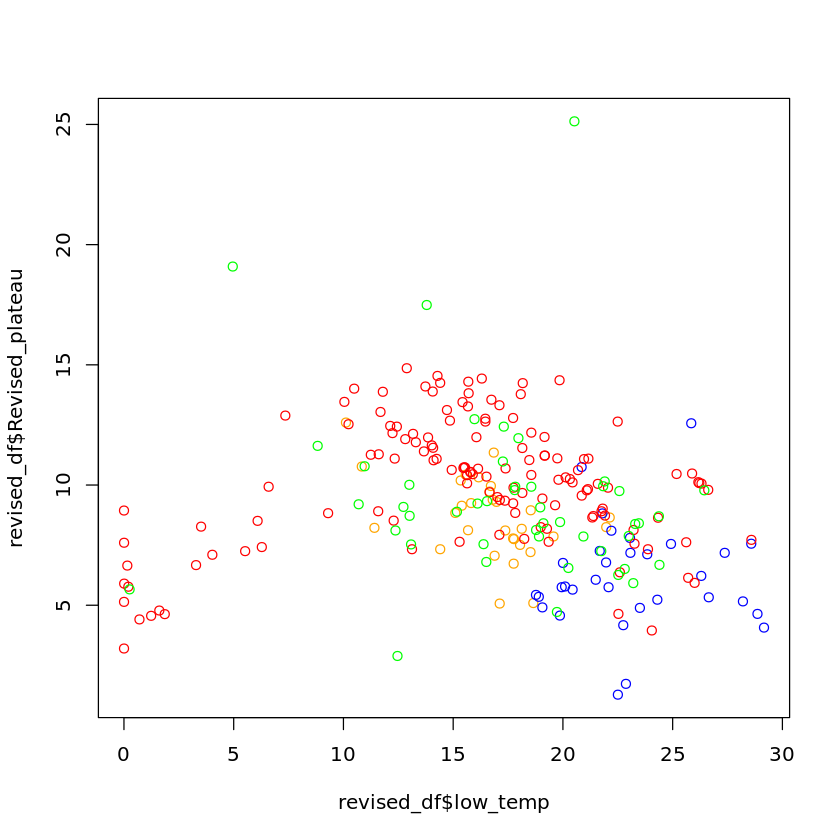

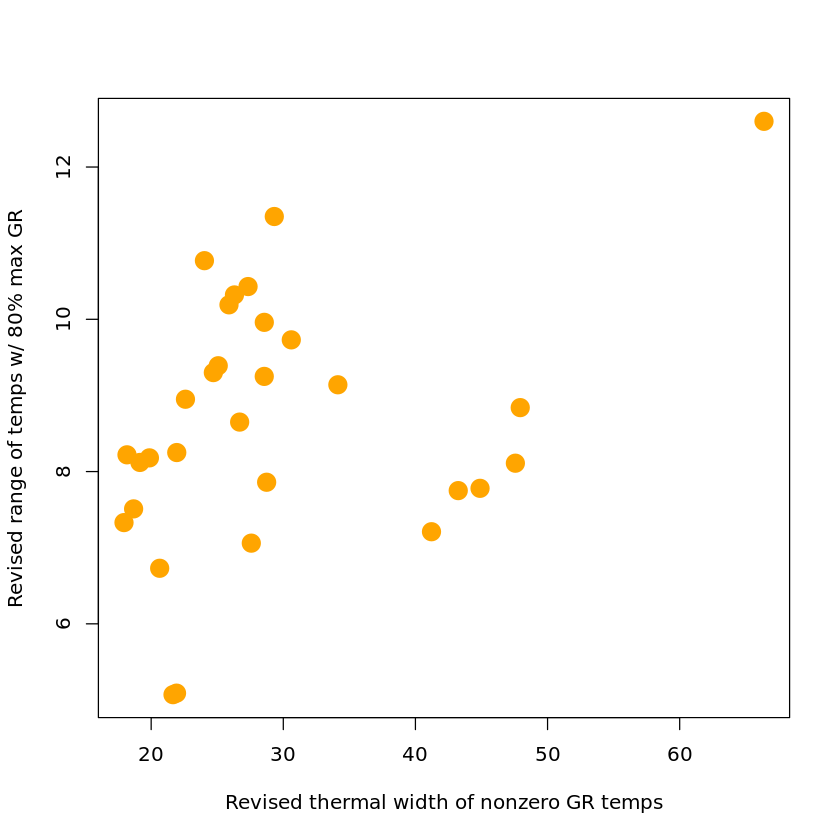

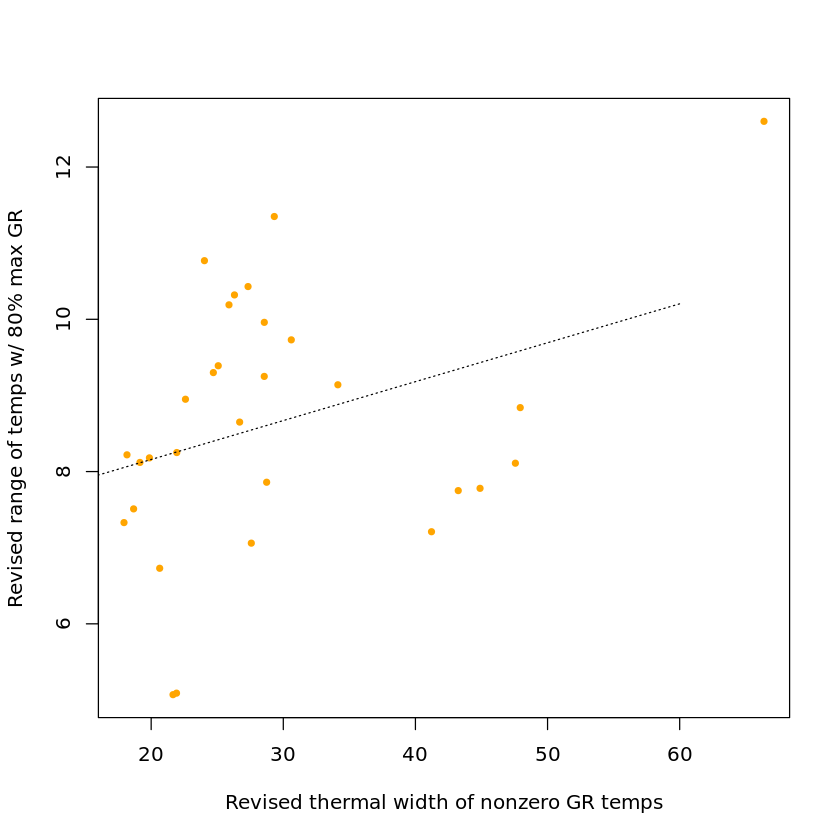

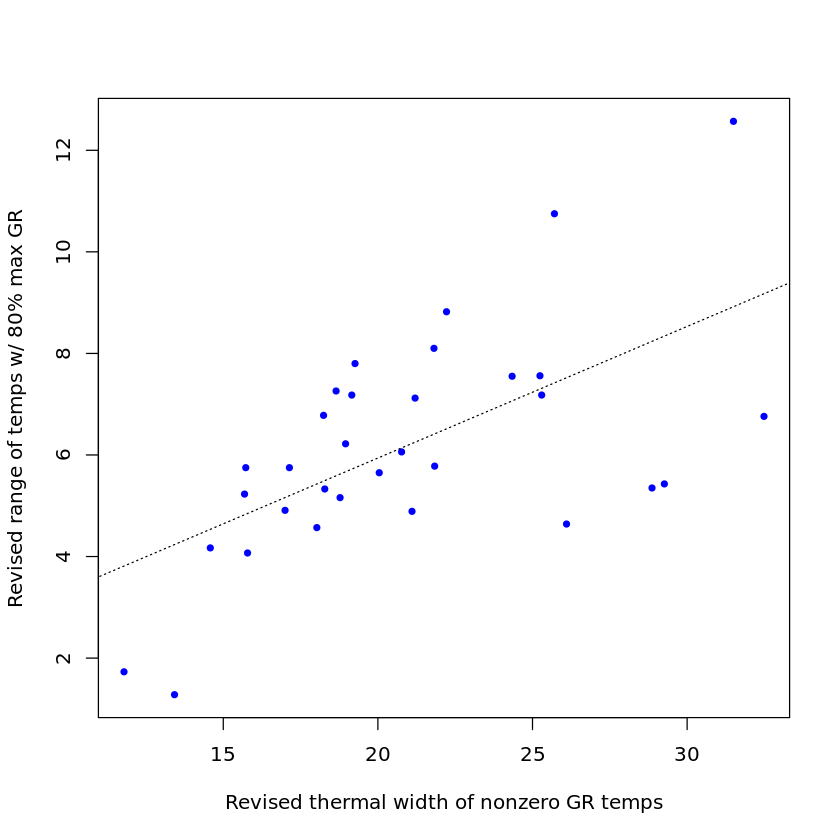

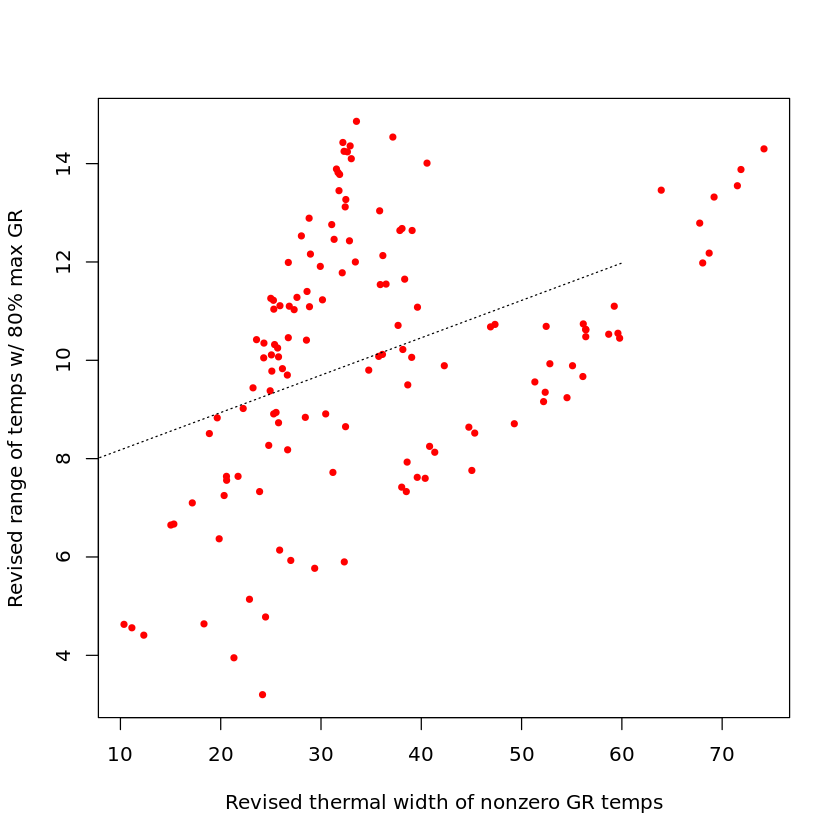

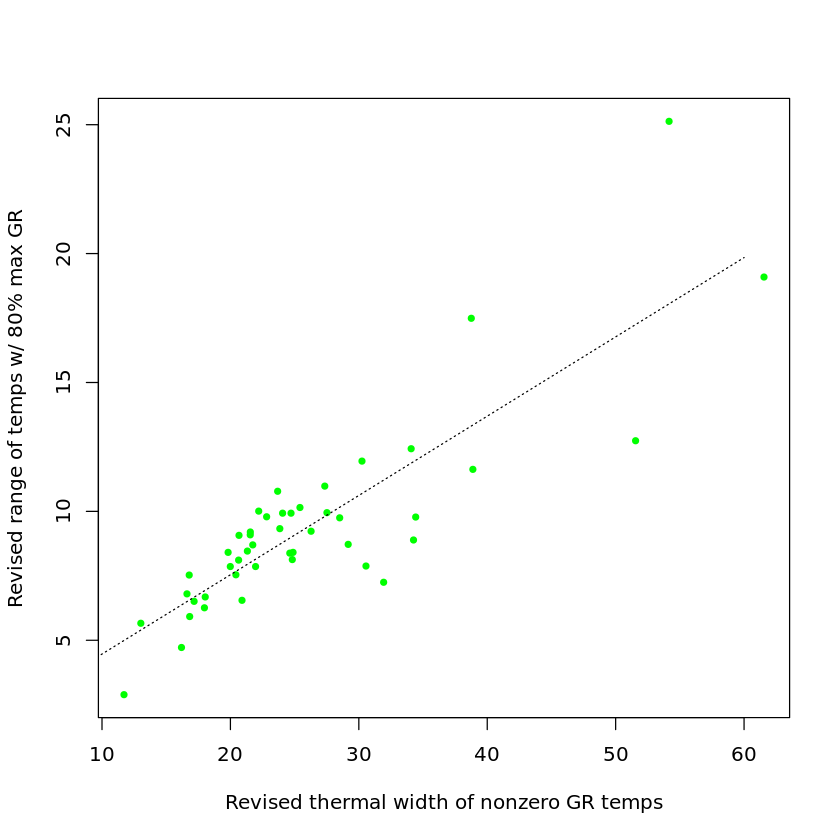

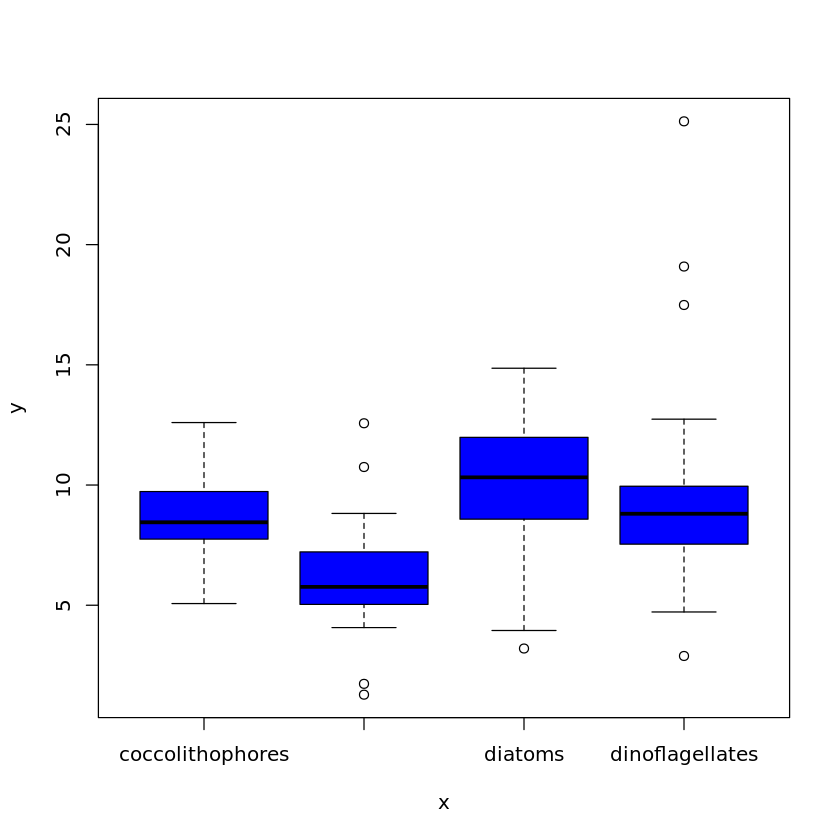

ERROR: Error in mfrow(c(2, 2)): could not find function "mfrow"


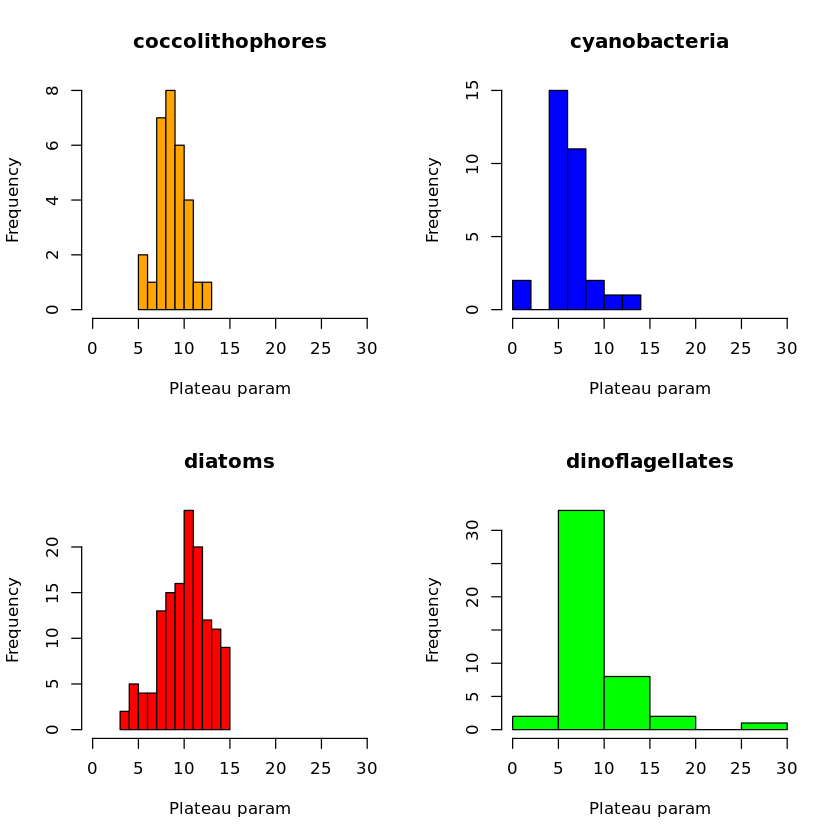

In [4]:

color_frame=data.frame("Group"=c("diatoms","coccolithophores",
                                 "dinoflagellates","cyanobacteria"),
                       "Color"=c("red","orange","green","blue"))
revised_df=merge(revised_df,color_frame)
plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"t_opt"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"max_GR"],
     pch=20,cex=3,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain),"Color"],
     ylab="Revised range of temps w/ 80% max GR",
     xlab="Revised thermal width of nonzero GR temps")
for (group in unique(revised_df$Group)) {
  plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"t_opt"],
       y=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"max_GR"],
       pch=20,
       col=revised_df[!is.na(revised_df$Revised_plateau)&
                        !is.na(revised_df$Strain)&
                        revised_df$Group==group,"Color"],
       ylab="Revised range of temps w/ 80% max GR",
       xlab="Revised thermal width of nonzero GR temps")
  cocco_model=summary(lm(formula = max_GR~t_opt+t_opt*t_opt,
                         data = revised_df[revised_df$Group==group,]))
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["Revised_wid","Estimate"]
  lines(seq(0,60,by=1),seq(0,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted")
}

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Revised_wid"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Revised_plateau"],
     pch=20,cex=3,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"Color"],
     ylab="Revised range of temps w/ 80% max GR",
     xlab="Revised thermal width of nonzero GR temps")
boxplot(x=factor(revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Strain"]),
        y=revised_df[!is.na(revised_df$Revised_plateau)&
                       !is.na(revised_df$Strain),"Revised_plateau"])
boxplot(Revised_plateau ~ Group, data = revised_df, 
        col = unique(revised_df$Color),pch=20,
        xlab="",ylab="Range (°C) of temperatures within 80% of max GR")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,col=revised_df$Color,pch=20)
boxplot(low_temp ~ Group, data = revised_df, col = "bisque")
boxplot(high_temp ~ Group, data = revised_df, col = "bisque")

boxplot(Revised_wid ~ Group, data = revised_df, 
        col = unique(revised_df$Color),pch=20,
        xlab="",ylab="Range (°C) of temperatures within 80% of max GR")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,col=revised_df$Color,pch=20)
boxplot(low_temp ~ Group, data = revised_df, col = "bisque")
boxplot(high_temp ~ Group, data = revised_df, col = "bisque")

summary(lm(formula = Revised_plateau~Revised_wid,
   data = revised_df[revised_df$Group=="coccolithophores",]))
summary(lm(formula = Revised_plateau~Revised_wid,
           data = revised_df[revised_df$Group=="diatoms",]))
summary(lm(formula = Revised_plateau~Revised_wid,
           data = revised_df[revised_df$Group=="dinoflagellates",]))
plot(x=revised_df$low_temp,y=revised_df$Revised_plateau,
     col=revised_df$Color)

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain)&
                    (revised_df$Group=="coccolithophores"),"Revised_wid"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain)&
                    (revised_df$Group=="coccolithophores"),"Revised_plateau"],
     pch=20,cex=3,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain)&
                    (revised_df$Group=="coccolithophores"),"Color"],
     ylab="Revised range of temps w/ 80% max GR",
     xlab="Revised thermal width of nonzero GR temps")


for (group in unique(revised_df$Group)) {
  plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"Revised_wid"],
       y=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"Revised_plateau"],
       pch=20,
       col=revised_df[!is.na(revised_df$Revised_plateau)&
                        !is.na(revised_df$Strain)&
                        revised_df$Group==group,"Color"],
       ylab="Revised range of temps w/ 80% max GR",
       xlab="Revised thermal width of nonzero GR temps")
  cocco_model=summary(lm(formula = Revised_plateau~Revised_wid,
                         data = revised_df[revised_df$Group==group,]))
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["Revised_wid","Estimate"]
  lines(seq(0,60,by=1),seq(0,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted")
}

plot(y=as.numeric(revised_df$Revised_plateau),x=factor(revised_df$Group),
        col="blue")
par(mfrow=c(2,2))
for (group in unique(revised_df$Group)) {
  hist(x=revised_df[revised_df$Group==group,"Revised_plateau"],
       col =revised_df[revised_df$Group==group,"Color"],xlab="Plateau param",
       main=group,xlim=c(0,30))

}

par(mfrow(c(2,2)))
for (group in unique(revised_df$Group)) {
  plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"t_opt"],
       y=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain)&
                      revised_df$Group==group,"Revised_plateau"],
       pch=20,
       col=revised_df[!is.na(revised_df$Revised_plateau)&
                        !is.na(revised_df$Strain)&
                        revised_df$Group==group,"Color"],
       ylab="thermal width of 80% of max growth rate",
       xlab="Thermal optimum (°C)",ylim=c(0,26),xlim=c(0,35))
  dev.hold()
  cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                         data = revised_df[revised_df$Group==group,]))
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["t_opt","Estimate"]
  lines(seq(0,60,by=1),seq(0,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted")
}
par(mfrow=c(1,2))

boxplot(Revised_plateau ~ Group, data = revised_df, 
        col = unique(revised_df$Color),pch=20,
        xlab="",ylab="thermal width (°C) of 80% of max growth rate")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,col=revised_df$Color,pch=20)

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"t_opt"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"Revised_plateau"],
     pch=20,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain),"Color"],
     ylab="thermal width (°C) of 80% of max growth rate",
     xlab="Thermal optimum (°C)",ylim=c(0,26),xlim=c(0,35))
for (group in c("diatoms","cyanobacteria")) {#unique(revised_df$Group)) {
  dev.hold()
  cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                         data = revised_df[revised_df$Group==group,]))
  print(group)
  print(cocco_model)
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["t_opt","Estimate"]
  lines(seq(-10,60,by=1),seq(-10,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted",col=unique(revised_df[revised_df$Group==group,"Color"]),
        lwd=2)
}
cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                       data = revised_df))


[1] "diatoms"

Call:
lm(formula = Revised_plateau ~ t_opt, data = revised_df[revised_df$Group == 
    group, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4344 -1.5458 -0.0578  1.7630  4.8299 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.12529    0.63979  11.137  < 2e-16 ***
t_opt        0.14037    0.02849   4.926 2.44e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.39 on 133 degrees of freedom
Multiple R-squared:  0.1543,	Adjusted R-squared:  0.148 
F-statistic: 24.27 on 1 and 133 DF,  p-value: 2.444e-06

[1] "cyanobacteria"

Call:
lm(formula = Revised_plateau ~ t_opt, data = revised_df[revised_df$Group == 
    group, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4540 -1.1446  0.2947  0.8730  4.4948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1.7000     2.6901  -0.632  0.53222   
t_opt         0.2969     0.1007   2.950  0.00612 **

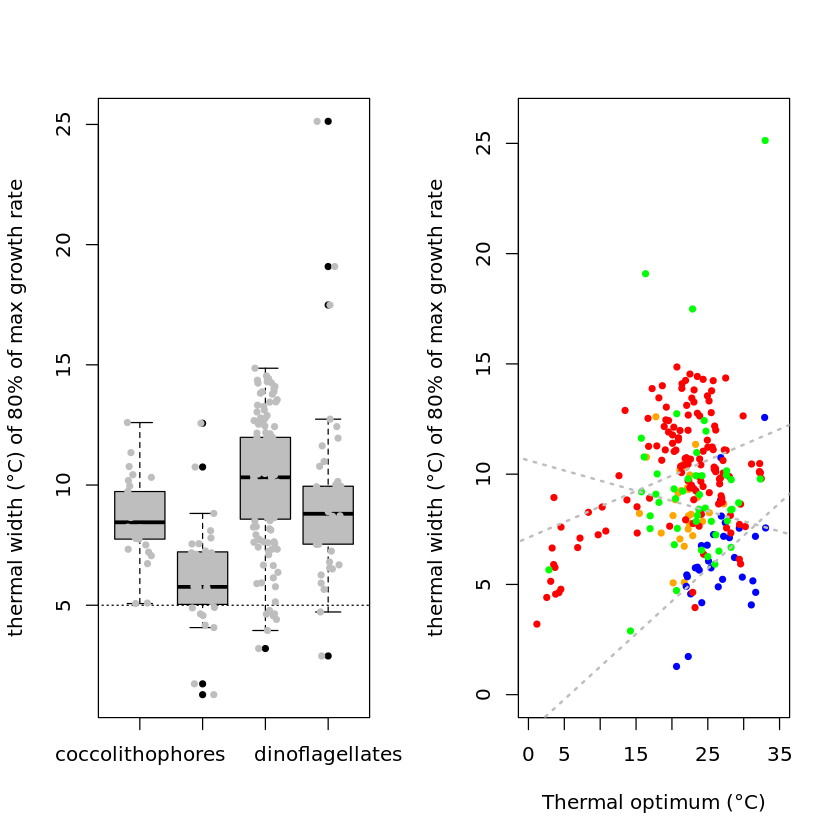

In [5]:
par(mfrow=c(1,2))

boxplot(Revised_plateau ~ Group, data = revised_df, 
        col="gray",
        #col = unique(revised_df$Color),
        pch=20,
        xlab="",ylab="thermal width (°C) of 80% of max growth rate")
lines(y=rep(5,9),x=c(0:8),lty="dotted")
points(x=jitter(as.numeric(factor(revised_df$Group))),
       y=revised_df$Revised_plateau,
       col="gray",#revised_df$Color,
       pch=20)

plot(x=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"t_opt"],
     y=revised_df[!is.na(revised_df$Revised_plateau)&
                    !is.na(revised_df$Strain),"Revised_plateau"],
     pch=20,
     col=revised_df[!is.na(revised_df$Revised_plateau)&
                      !is.na(revised_df$Strain),"Color"],
     ylab="thermal width (°C) of 80% of max growth rate",
     xlab="Thermal optimum (°C)",ylim=c(0,26),xlim=c(0,35))
for (group in c("diatoms","cyanobacteria","coccolithophores")) {#unique(revised_df$Group)) {
  dev.hold()
  cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                         data = revised_df[revised_df$Group==group,]))
  print(group)
  print(cocco_model)
  cocco_intercept=data.frame(cocco_model$coefficients)["(Intercept)","Estimate"]
  cocco_slope=data.frame(cocco_model$coefficients)["t_opt","Estimate"]
  lines(seq(-10,60,by=1),seq(-10,60,by=1)*cocco_slope+cocco_intercept,
        lty="dotted",col="gray",#col=unique(revised_df[revised_df$Group==group,"Color"]),
        lwd=2)
}
cocco_model=summary(lm(formula = Revised_plateau~t_opt,
                       data = revised_df))

In [43]:
revised_df

Group            Color  Strain                              Revised_opt
1   coccolithophores orange Coccolithus_pelagicus_N476-2        16.44532   
2   coccolithophores orange Emiliania_huxleyi_63                22.30022   
3   coccolithophores orange Calcidiscus_leptoporus_NS10-2       15.46602   
4   coccolithophores orange Gephyrocapsa_oceanica_AB1, CAWPOT   22.29485   
5   coccolithophores orange Emiliania_huxleyi_R strain TQ26     21.11383   
6   coccolithophores orange Emiliania_huxleyi_                  22.66429   
7   coccolithophores orange Emiliania_huxleyi_M19               21.09692   
8   coccolithophores orange Emiliania_huxleyi_                  21.71482   
9   coccolithophores orange Emiliania_huxleyi_S. Africa         23.58307   
10  coccolithophores orange Gephyrocapsa_oceanica_A4727         27.21764   
11  coccolithophores orange Emiliania_huxleyi_M181, Bigelow 1A1 24.26138   
12  coccolithophores orange Emiliania_huxleyi_CCMP373, BT-6     21.25536   
13  coccolithophores orange Calcidiscus_leptoporus_N482-1       18.50486   
14  coccolithophores orange Emiliania_huxleyi_85                22.45221   
15  coccolithophores orange Gephyrocapsa_oceanica_A4725         25.22439   
16  coccolithophores orange Emiliania_huxleyi_                  20.17016   
17  coccolithophores orange Emiliania_huxleyi_41                22.90041   
18  coccolithophores orange Emiliania_huxleyi_M21               22.50389   
19  coccolithophores orange Emiliania_huxleyi_Van556            17.76862   
20  coccolithophores orange Emiliania_huxleyi_                  22.25798   
21  coccolithophores orange Emiliania_huxleyi_M13               23.29614   
22  coccolithophores orange Emiliania_huxleyi_                  21.71510   
23  coccolithophores orange Emiliania_huxleyi_M10               21.51814   
24  coccolithophores orange Pleurochrysis_carterae_             20.14814   
25  coccolithophores orange Emiliania_huxleyi_62                22.46721   
26  coccolithophores orange Emiliania_huxleyi_17                20.85287   
27  coccolithophores orange Emiliania_huxleyi_B92/21            20.46669   
28  coccolithophores orange Emiliania_huxleyi_M22               21.99456   
29  coccolithophores orange Emiliania_huxleyi_M23               22.17611   
30  coccolithophores orange Emiliania_huxleyi_G1779Ga           22.38979   
⋮   ⋮                ⋮      ⋮                                   ⋮          
214 dinoflagellates  green  Pernambugia_tuberosa_GeoB*74        23.837697  
215 dinoflagellates  green  Prorocentrum_donghaiense_           28.264850  
216 dinoflagellates  green  Alexandrium_monilatum_              28.239821  
217 dinoflagellates  green  Akashiwo_sanguinea_RMB              22.254901  
218 dinoflagellates  green  Gymnodinium_corollarium_GCTV-B4      2.849039  
219 dinoflagellates  green  Neoceratium_lineatum_               21.507508  
220 dinoflagellates  green  Gyrodinium_uncatenum_GYRO           27.591625  
221 dinoflagellates  green  Biceratium_furca_                   20.746724  
222 dinoflagellates  green  Akashiwo_sanguinea_                 23.381618  
223 dinoflagellates  green  Alexandrium_catenella_ACC02         14.215719  
224 dinoflagellates  green  Gymnodinium__isolate 581            25.987764  
225 dinoflagellates  green  Akashiwo_sanguinea_GBB              24.743929  
226 dinoflagellates  green  Alexandrium_minutum_                20.671322  
227 dinoflagellates  green  Akashiwo_sanguinea_YRB              24.501789  
228 dinoflagellates  green  Gymnodinium_catenatum_GCCV-10       24.188970  
229 dinoflagellates  green  Amphidinium_massartii_CS-259        22.873830  
230 dinoflagellates  green  Alexandrium_tamarense_              18.191380  
231 dinoflagellates  green  Neoceratium_fusus_                  16.121806  
232 dinoflagellates  green  Karenia_mikimotoi_                  26.119473  
233 dinoflagellates  green  Scripsiella_trochoidea_ScrpMxB      15.733913  
234 dinoflagellates  green  Cochlodinium_polykrikoid

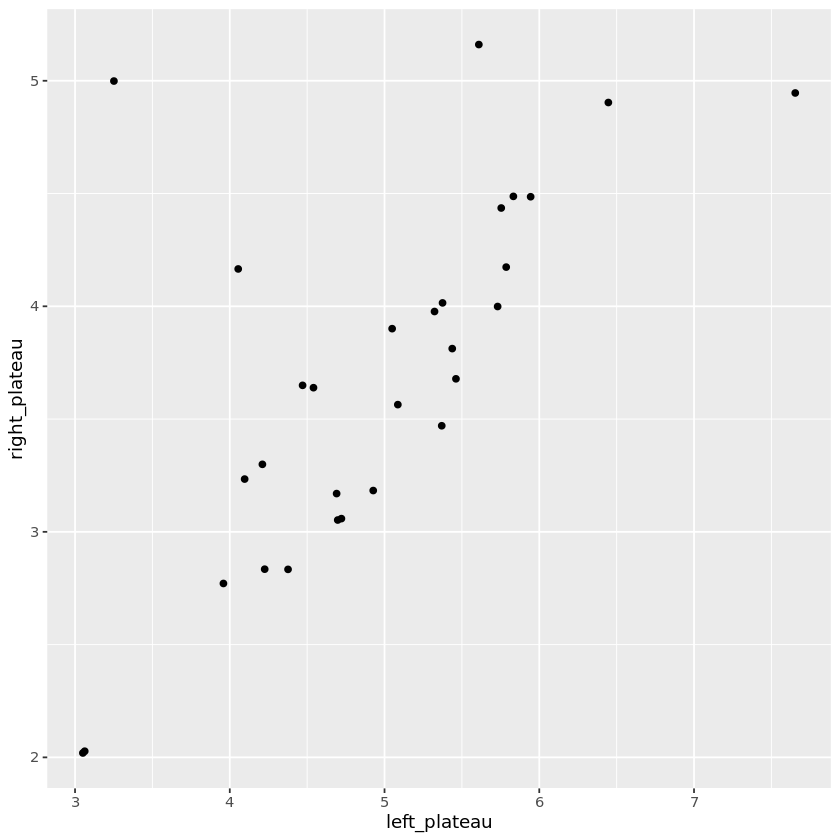

In [6]:
ggplot(revised_df%>%dplyr::filter(Group=="coccolithophores")) + 
    geom_point(aes(x=left_plateau,y=right_plateau))

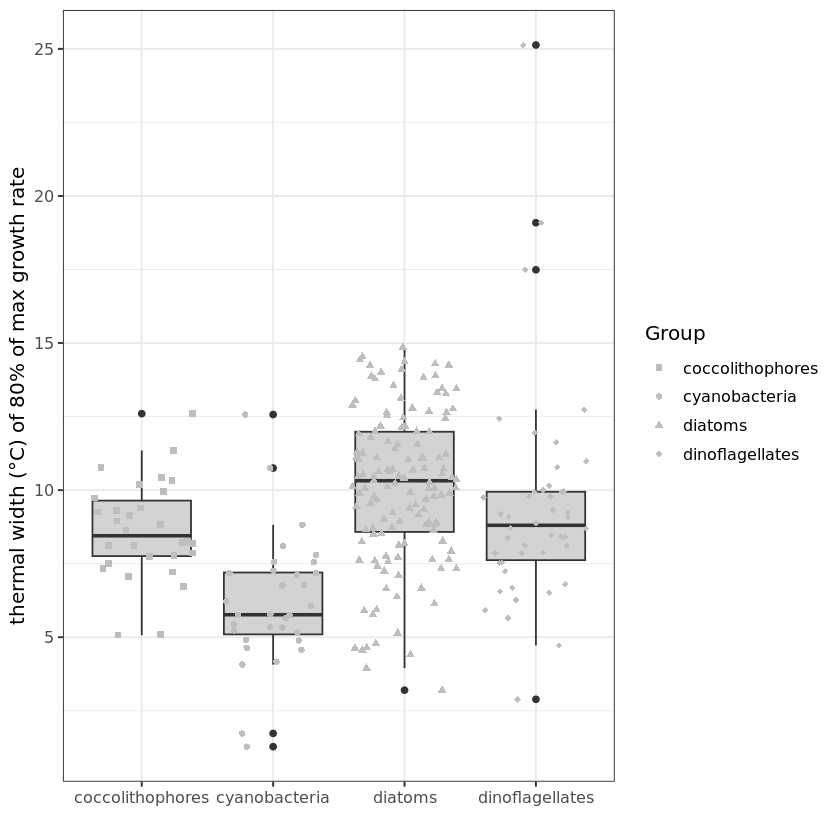

In [138]:
ggplot(revised_df) + 
    geom_boxplot(aes(x=Group,y=Revised_plateau),fill="light gray") +
    geom_jitter(aes(x=Group,y=Revised_plateau,shape=Group),col="gray")+
    theme_bw(base_size=12)+
    scale_shape_manual(values=c(15,16,17,18))+
    xlab("") + ylab("thermal width (°C) of 80% of max growth rate")

`geom_smooth()` using
formula = 'y ~ x'


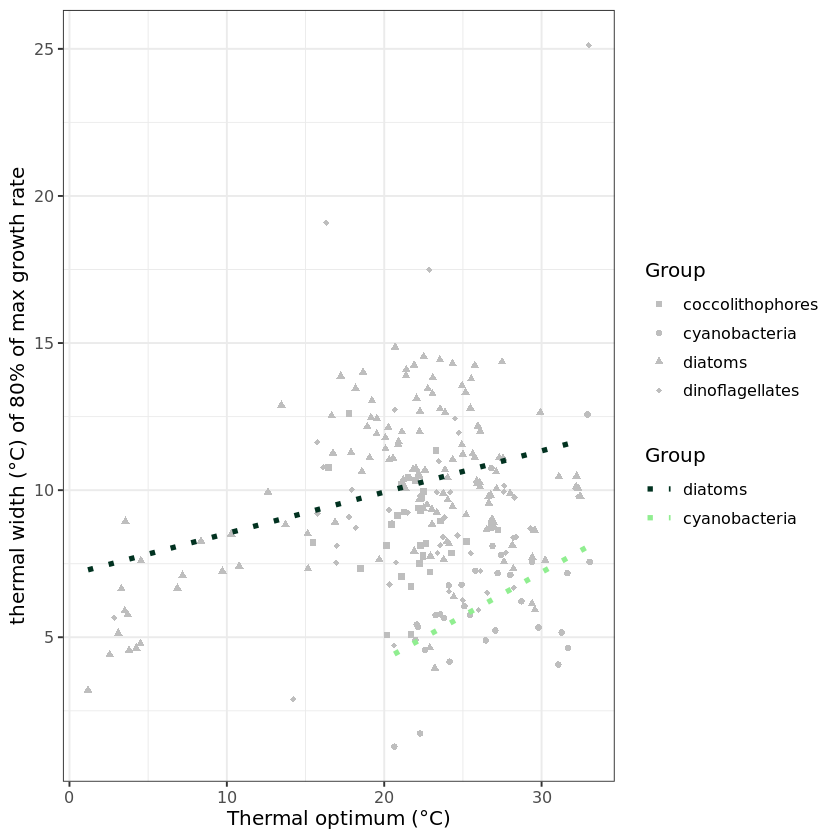

In [139]:
compare_gr=ggplot(revised_df) + 
    geom_jitter(aes(x=t_opt,y=Revised_plateau,shape=Group),col="gray")+
    geom_smooth(data=revised_df%>%dplyr::filter(Group%in%c("diatoms","cyanobacteria")),
                aes(x=t_opt,y=Revised_plateau,group=Group,color=Group),method="lm",
                se=F,linetype="dotted",lwd=1.5)+
    scale_shape_manual(values=c(15,16,17,18))+
    scale_color_manual(values=c("#013220","#90EE90"),limits=c("diatoms","cyanobacteria")) + 
    theme_bw(base_size=12) + ylab("thermal width (°C) of 80% of max growth rate") +
    xlab("Thermal optimum (°C)")
compare_gr

In [140]:
print("hello")

[1] "hello"


In [7]:
final_data = data.frame(fread("../../data/new_consol_2.csv"))

Warning message:
“There was 1 warning in
`dplyr::mutate()`.
ℹ In argument:
  `Position =
  as.numeric(Position)`.
Caused by warning:
! NAs introduced by coercion”
Warning message:
“There was 1 warning in
`dplyr::mutate()`.
ℹ In argument:
  `Position =
  as.numeric(Position)`.
Caused by warning:
! NAs introduced by coercion”
Warning message in dplyr::left_join(., final_conc, by = c(Date = "FirstLogDate", :
“Detected an unexpected
many-to-many
relationship between
`x` and `y`.
ℹ Row 1 of `x` matches
  multiple rows in `y`.
ℹ Row 2 of `y` matches
  multiple rows in `x`.
ℹ If a many-to-many
  relationship is
  expected, set
  `relationship =
  "many-to-many"` to
  silence this warning.”
Joining with `by =
join_by(Position)`
Warning message in dplyr::left_join(., final_conc_post, by = c(Date = "FirstLogDate", :
“Detected an unexpected
many-to-many
relationship between
`x` and `y`.
ℹ Row 1 of `x` matches
  multiple rows in `y`.
ℹ Row 49 of `y` matches
  multiple rows in `x`.
ℹ If a many-to-m

[1] 21.5
[1] 15
[1] 374
[1] "^guesses"
[1] "10000Best guess"
[1] 0.07130089
[1] "^b"
  [1]  -0.19914442  -0.18116770  -0.16457724  -0.16449303  -0.14789385
  [6]  -0.13904696  -0.10657265  -0.03248073   0.01916580   0.03183173
 [11]   0.05176884   0.07080413   0.10109591   0.10978385   0.13630692
 [16]   0.14726792   0.17761786   0.20621516   0.20990633   0.23469006
 [21]   0.28233900   0.28521932   0.32676225   0.33473534   0.36213619
 [26]   0.36280653   0.36648856   0.37610279   0.40748229   0.43137950
 [31]   0.45178188   0.47089641   0.47532785   0.48657291   0.49366392
 [36]   0.54412565   0.54964064   0.55331225   0.55859935   0.55892735
 [41]   0.56157524   0.59512486   0.59892960   0.61493359   0.62140489
 [46]   0.62209392   0.62504593   0.62584978   0.62183747   0.61923721
 [51]   0.61902904   0.57724409   0.42532420   0.40976949   0.31957992
 [56]   0.29935052   0.24919445   0.18318597   0.16409759   0.15252518
 [61]   0.11821638  -0.08223257  -0.13767529  -0.16070432  -0.2

Warning message in rnorm(10000, mean = gr, sd = sd_gr * sqrt((nrow(growth_rates) - :
“NAs produced”


[1] "10000Best guess"
[1] 0.008870916
[1] "^b"
  [1] -0.80844925 -0.69936620 -0.69646245 -0.62671537 -0.58747805 -0.51184919
  [7] -0.44705431 -0.41221695 -0.40211673 -0.38546961 -0.33333901 -0.32127904
 [13] -0.27330673 -0.24961632 -0.21352477 -0.17240260 -0.13899272 -0.10122826
 [19]  0.10961348  0.13929811  0.18350090  0.20969229  0.24495080  0.28137234
 [25]  0.33995299  0.37373687  0.42814237  0.55180316  0.58494754  0.58869807
 [31]  0.63858147  0.68359890  0.73327297  0.74376770  0.74721166  0.75647298
 [37]  0.76568811  0.76670102  0.77837271  0.78108448  0.78261554  0.81295587
 [43]  0.82950262  0.84442817  0.84658744  0.84768660  0.84777649  0.85185454
 [49]  0.85506400  0.85610193  0.85989126  0.86017246  0.85914657  0.85581590
 [55]  0.85397425  0.85299202  0.84808697  0.84462511  0.83325610  0.80830506
 [61]  0.80130638  0.79534911  0.78751873  0.77970773  0.77494346  0.73643618
 [67]  0.70648930  0.67739593  0.64039600  0.59325475  0.56602481  0.56449980
 [73]  0.51895524

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.03305574
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1] -1.54286256 -1.54049713 -1.42847490 -1.41763818 -1.39594719 -1.38536744
  [7] -1.33678260 -1.29923526 -1.24370434 -1.23052253 -1.15433027 -1.13239302
 [13] -1.09488707 -1.04727978 -1.04517061 -1.01671107 -1.00767166 -0.96186111
 [19] -0.93611817 -0.88868898 -0.81704732 -0.80046514 -0.79349146 -0.76707248
 [25] -0.73494074 -0.61723231 -0.52627180 -0.52220195 -0.44364985 -0.42433958
 [31] -0.41673892 -0.40760397 -0.33211601 -0.31748051 -0.30903832 -0.26568269
 [37] -0.24477959 -0.20841338 -0.19621871 -0.09508509  0.05464535  0.06758292
 [43]  0.14308668  0.15078762  0.20344871  0.28537861  0.28961040  0.36818016
 [49]  0.49740004  0.51970025  0.52164118  0.55188623  0.58837301  0.59701509
 [55]  0.60424948  0.70794392  0.71048018  0.76573177  0.77812813  0.84342112
 [61]  0.85208995  0.87061477  0.87501233  0.88318782  0.88967316  0.91667205
 [67]  0.92625561  0.92757148  0.93186776  0.93655718  0.93873458  0.94515011
 [73]  0.93631472  0.92590230  0.92435616  0.91525745  0.8994155

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 1516
[1] 25.4
[1] 15
[1] 1516
[1] "^guesses"
[1] "10000Best guess"
[1] 0.06617108
[1] "^b"
  [1] -0.24215977 -0.23476248 -0.22699025 -0.22484864 -0.18033528 -0.16946876
  [7] -0.16357013 -0.14103511 -0.13941643 -0.05194146 -0.03924651 -0.02232105
 [13]  0.03829393  0.04358540  0.05425841  0.08483130  0.09096719  0.10591615
 [19]  0.15914048  0.16455168  0.18140657  0.18212569  0.19448679  0.19789488
 [25]  0.24978664  0.27969647  0.27989319  0.31710835  0.32857756  0.36332716
 [31]  0.38202575  0.40306080  0.42252726  0.44421178  0.48150542  0.48450766
 [37]  0.51138414  0.54829116  0.56760082  0.62721703  0.63765951  0.64807151
 [43]  0.76521222  0.77143026  0.80585112  0.81660374  0.86416796  0.88985019
 [49]  0.92370664  0.93057096  0.95289616  0.95549889  0.96310991  0.97275666
 [55]  0.97525098  1.01143514  1.01508722  1.03473684  1.06200890  1.06816734
 [61]  1.06917094  1.07115423  1.06275885  1.05308803  1.05239807  1.05181620
 [67]  1.04527312  1.03173891  1.02752126  1.01

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.06370809
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1]  -1.20309936  -1.14381145  -1.12336812  -1.07559284  -1.03766385
  [6]  -0.98842887  -0.95890535  -0.95506245  -0.92304703  -0.86306369
 [11]  -0.80026036  -0.75669310  -0.73862427  -0.68497509  -0.60861814
 [16]  -0.60835962  -0.55115490  -0.54650107  -0.49734643  -0.49598164
 [21]  -0.48270594  -0.46488110  -0.40659288  -0.40294133  -0.39340472
 [26]  -0.36081698  -0.35728265  -0.34527143  -0.30940287  -0.25903466
 [31]  -0.18997305  -0.12266309  -0.10026124   0.04667544   0.10283085
 [36]   0.15466478   0.33650727   0.35086508   0.36856136   0.37898892
 [41]   0.39176115   0.41782903   0.42494079   0.58502552   0.58556655
 [46]   0.58806727   0.58893436   0.66795753   0.69415894   0.71722164
 [51]   0.74146832   0.76401725   0.79700871   0.86426659   0.87734905
 [56]   0.91546780   0.93813274   0.94170932   0.95531168   0.96245431
 [61]   0.96765379   0.95547873   0.92673091   0.92079147   0.80672299
 [66]   0.29894691   0.08015014  -0.08133707  -0.32599583  -0.48310883
 [71] 

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 371


Warning message:
“Values from `concpivot`
are not uniquely
identified; output will
contain list-cols.
• Use `values_fn =
  list` to suppress
  this warning.
• Use `values_fn =
  {summary_fun}` to
  summarise duplicates.
• Use the following
  dplyr code to
  identify duplicates.
  {data} %>%
  dplyr::group_by(Strain,
  Position,
  Temperature, Rep,
  Transfer,
  GR_Calc_placeholder)
  %>%
  dplyr::summarise(n =
  dplyr::n(), .groups =
  "drop") %>%
  dplyr::filter(n > 1L)”
Warning message:
“Expected 2 pieces.
Additional pieces
discarded in 1 rows
[14].”
Warning message:
“Expected 2 pieces.
Missing pieces filled
with `NA` in 6 rows [1,
2, 3, 4, 5, 6].”
Warning message:
“Expected 2 pieces.
Additional pieces
discarded in 1 rows
[8].”
Warning message:
“There were 2 warnings
in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `TF =
  as.numeric(TF)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run
  `dplyr::last_dplyr_warnings()`
  to see the 1
  remaining warning.”


[1] 23.8
[1] 15
[1] 371
[1] "^guesses"
[1] "10000Best guess"
[1] 0.03217273
[1] "^b"
  [1] -1.45819363 -1.27043233 -1.23379884 -1.16651837 -1.15466943 -0.94465566
  [7] -0.77999193 -0.69703218 -0.65491851 -0.60012851 -0.57903742 -0.56338792
 [13] -0.51048685 -0.49942116 -0.45678062 -0.35882120 -0.35787964 -0.34407196
 [19] -0.30741767 -0.29393767 -0.17374216 -0.01505796  0.03481181  0.05344599
 [25]  0.08187765  0.13005937  0.14811490  0.18583451  0.35408321  0.37043171
 [31]  0.40852205  0.42364099  0.46698658  0.48071350  0.49449125  0.55659783
 [37]  0.61464691  0.61953369  0.63200680  0.68259499  0.69405189  0.69477540
 [43]  0.72123450  0.72160657  0.72647339  0.76944140  0.79552320  0.86859567
 [49]  0.89483852  0.89511375  0.90679685  0.94141584  1.02307207  1.04894889
 [55]  1.06472343  1.06145541  1.06137146  1.06069456  1.05731576  1.05429311
 [61]  1.04543004  1.04522505  0.98971549  0.88906060  0.86888249  0.83882608
 [67]  0.82718231  0.81900715  0.80558708  0.78695344  0.

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.05185815
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


  [1]   0.049055365   0.081736809   0.106044633   0.136755828   0.218932629
  [6]   0.258202936   0.259086453   0.269492647   0.370686325   0.395318371
 [11]   0.398855645   0.402818610   0.434952477   0.459208456   0.473216113
 [16]   0.483042832   0.524490015   0.534036758   0.537405979   0.566107925
 [21]   0.575212579   0.590908363   0.596203646   0.598455837   0.611597068
 [26]   0.624142499   0.638004416   0.639815526   0.648063552   0.657336007
 [31]   0.658772011   0.663873799   0.661886855   0.650833554   0.640905209
 [36]   0.518724353   0.503860608   0.490461272   0.480690462   0.432552132
 [41]   0.345389393   0.248040691   0.099477308   0.066253179   0.051998931
 [46]   0.023709694  -0.001529474  -0.154316865  -0.278659724  -0.410215948
 [51]  -0.470537374  -0.474599769  -0.714955316  -0.740243551  -0.804539247
 [56]  -0.806549188  -0.933976827  -1.526682671  -1.716084031  -2.074432628
 [61]  -2.237238634  -2.306935951  -2.334469449  -2.764830735  -2.908037899
 [66]  -3.05

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


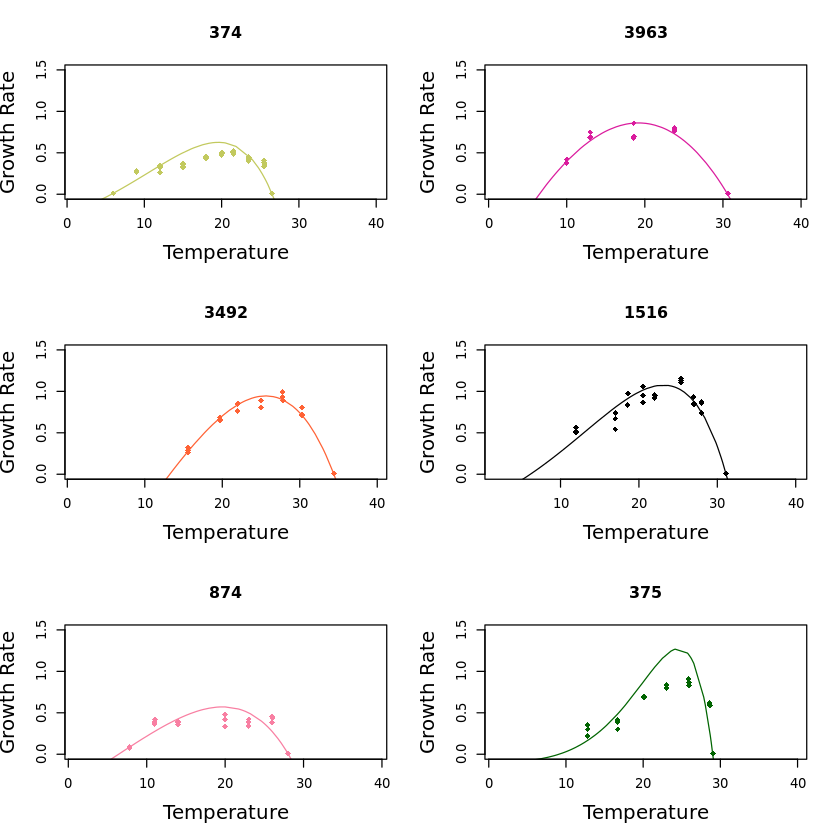

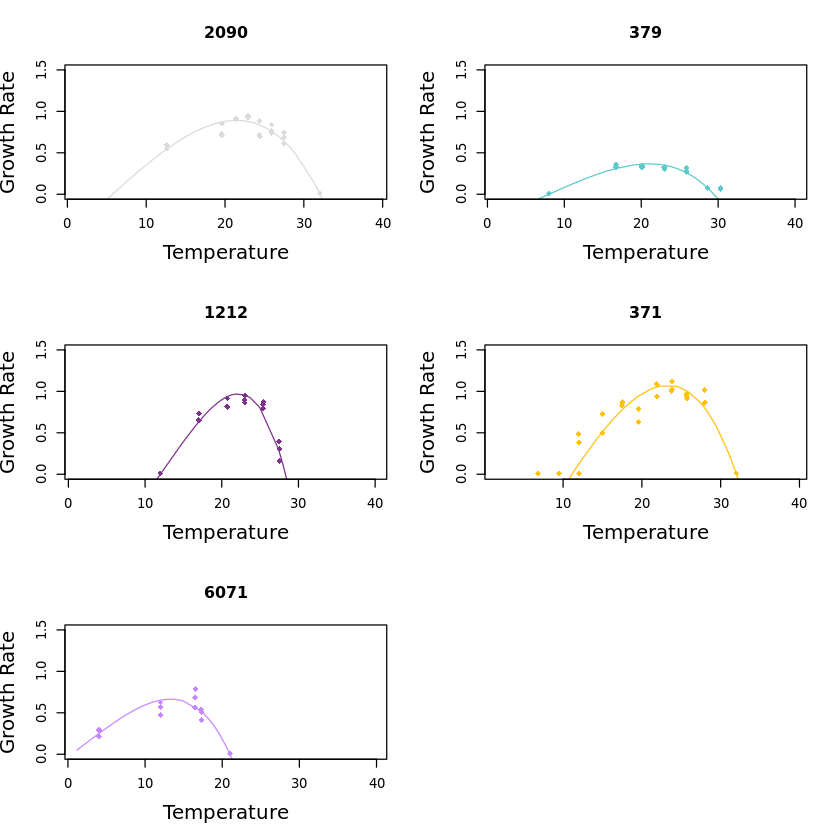

In [8]:
#### FUNCTIONS ####

nbcurve <- function(x,opt,w,a,b){
  res<-a*exp(b*x)*(1-((x-opt)/(w/2))^2)
  res
}

LL1 <- function (y, x, a, b, w, o){
    N = nbcurve(x=x,a=a,b=b,w=w,opt=o)
    N[N<=0]=0.01
    N=log(N) # eliminate missing data from loglikelihood
    y=log(y)
    return(-sum(dnorm(y,N,log = TRUE))) # the negative log likelihoods: the order of N and y don't matter)
}

strain_color_frame_harriet = data.frame("Strains_full"=c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP74","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"),
                                        "Strains"=c("6856","6071","1212","3963",
                                                   "874","1280","4567","914","3492",
                                                   "371","1215","377","1239",
                                                   "1222","1256","374","379","1516",
                                                   "2090","375"),
                                        "Colors"=c("#4443c6","#c688ff","#7d328b","#da1b9d",
                                                  "#f87fa2","#b90033","#ff5755","#c31d0b",
                                                  "#ff6235","#ffc10c","#e4e366","#5a9f00",
                                                  "#60b574","#00b9bf","#0194e3","#C2C95E",
                                                  "#5EC9C9","#000000","#DBDBDB","dark green"))

return_params <- function(fcm_frame,strain,return_gr_frame=FALSE) {
    if (strain=="6071_old") {
        growth_rates=fcm_frame %>% 
             dplyr::filter(Strain==strain) %>%
             dplyr::mutate(Date=case_when(grepl("/",Date) ~ as.Date(Date,format="%m/%d/%y"),
                                          TRUE ~ as.Date(Date,format="%Y-%m-%d"))) %>%
             dplyr::select(Date,Strain,Position,Temperature,Rep,Transfer,ConcCellmL,GR_Calc_placeholder) %>%
             separate_rows(Position,Rep,Temperature,sep=",") %>%
             dplyr::mutate(Position=case_when((as.numeric(Position)==4)&(Strain==6071)~0,
                                              (as.numeric(Position)==10)&(as.numeric(Strain)==3963)~0,
                                                 TRUE ~ Position),
                          Temperature=case_when((as.numeric(Position)==10)&(as.numeric(Strain)==3963)~10,
                                                 TRUE ~ Temperature)) %>%
             dplyr::filter(GR_Calc_placeholder %in% c("TF","T0")) %>% dplyr::filter((Transfer=="C")|(Position==0)) %>%
             dplyr::mutate(concpivot = paste(ConcCellmL,Date,sep="_")) %>%
             tidyr::pivot_wider(id_cols=c("Strain","Position","Temperature","Rep","Transfer"),
                                names_from = GR_Calc_placeholder, values_from = concpivot) %>%
             tidyr::separate(TF,sep="_",into=c("TF","Date_F"))%>%
             tidyr::separate(T0,sep="_",into=c("T0","Date_0")) %>%
             dplyr::mutate(Date_F = as.Date(Date_F,format="%Y-%m-%d"),
                           Date_0 = as.Date(Date_0,format="%Y-%m-%d"),
                           TF = as.numeric(TF),T0=as.numeric(T0)) %>%
             dplyr::mutate(Duration = lubridate::as.duration(lubridate::interval(as.Date(Date_0,format="%Y-%m-%d"),
                            as.Date(Date_F,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
             dplyr::mutate(GrowthRate = (log(TF,base=2)-log(T0,base=2))/Duration) %>%
             dplyr::mutate(GrowthRate=case_when(GrowthRate>0 ~ GrowthRate,
                                                TRUE ~ 0.01)) %>%
             dplyr::mutate(ln.r=log(GrowthRate)) %>% dplyr::filter(!((Position==11)&(GrowthRate==0.01)))
    } else if (strain == 374) {
        temperature_correspond_jan20 = data.frame(Position = c(1:20),
                                    Temperature = c(7,8.5,9,11,12,14,15,17,18,19,20,21,21.5,23,23.5,25,
                                                   25.5,26,26.5,28))

        jan2020_data=read.csv("../../concentration_csvs/CombinedTimeSeries_Jan2020_Transfers.csv") %>%
            dplyr::mutate(Date=as.Date(Date,format="%m/%d/%Y"))
        conc_accl=read.csv("../../concentration_csvs/Conc_Oct2020_374_379.csv") %>%
            dplyr::mutate(Date=as.Date(Date,format="%m/%d/%Y"))
        growthrate_379_374=read.csv("../../growth_rate_start_end/GrowthRateStartEnd_374_379.csv") %>%
            dplyr::mutate(FirstLogDate=as.Date(FirstLogDate,format="%Y-%m-%d"),
                          FinalLogDate=as.Date(FinalLogDate,format="%Y-%m-%d"))
        first_conc=jan2020_data %>% dplyr::mutate(Transfer=as.character(Transfer)) %>%
            dplyr::right_join(growthrate_379_374,by=c("Date"="FirstLogDate",
                                                                              "Strain","Position","Transfer")) %>%
            dplyr::rename(c("FirstConc"="Conc"))
        final_conc=jan2020_data %>% dplyr::mutate(Transfer=as.character(Transfer)) %>%
            dplyr::right_join(growthrate_379_374,by=c("Date"="FinalLogDate",
                                                                                    "Strain","Position","Transfer")) %>%
            dplyr::rename(c("FinalConc"="Conc"))

        first_conc_post=conc_accl %>% dplyr::mutate(Position=as.numeric(Position),Transfer="F") %>% 
            dplyr::right_join(growthrate_379_374,by=c("Date"="FirstLogDate","Strain","Transfer","Position")) %>%
            dplyr::rename(c("FirstConc"="Conc"))
        final_conc_post=conc_accl %>% dplyr::mutate(Position=as.numeric(Position),Transfer="F") %>%
            dplyr::right_join(growthrate_379_374,by=c("Date"="FinalLogDate","Transfer","Strain","Position")) %>%
            dplyr::rename(c("FinalConc"="Conc"))


        t1_grs = first_conc %>%
               dplyr::left_join(final_conc,by=c("Date"="FirstLogDate",
                                                "FinalLogDate"="Date",
                                                "Transfer","Strain",
                                                "Position")) %>%
               dplyr::filter(Transfer==1)%>%
            dplyr::mutate(Duration=lubridate::as.duration(lubridate::interval(as.Date(Date,format="%Y-%m-%d"),
                            as.Date(FinalLogDate,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
            dplyr::mutate(GrowthRate=(log(FinalConc,base=2)-log(FirstConc,base=2))/Duration) %>%
            dplyr::left_join(temperature_correspond_jan20) %>%
            dplyr::rename(GR_Transfer1=GrowthRate)%>%dplyr::select(Position,Temperature,GR_Transfer1)
        tf_grs = first_conc_post %>%
               dplyr::left_join(final_conc_post, by=c("Date"="FirstLogDate",
                                                "FinalLogDate"="Date",
                                                "Transfer","Strain","Rep",
                                                "Position")) %>%
            dplyr::mutate(Duration=lubridate::as.duration(lubridate::interval(as.Date(Date,format="%Y-%m-%d"),
                            as.Date(FinalLogDate,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
            dplyr::mutate(GrowthRate=(log(FinalConc,base=2)-log(FirstConc,base=2))/Duration) %>%
            dplyr::left_join(temperature_correspond_jan20) %>%
            dplyr::rename(GR_TransferF=GrowthRate) %>% dplyr::select(Position,Temperature,GR_TransferF)

        growth_rates=t1_grs %>% dplyr::left_join(tf_grs) %>% 
               dplyr::mutate(GrowthRate = dplyr::case_when((Temperature<10)|(Temperature>25) ~ GR_Transfer1,
                                                           TRUE ~ GR_TransferF)) %>%
            dplyr::filter(!is.na(GrowthRate)) %>% dplyr::mutate(Transfer="F") %>%
            dplyr::mutate(GrowthRate=case_when(Temperature==26.5 ~ 0.01,
                                               TRUE ~ GrowthRate))
    } else {
        print(strain)
        growth_rates=fcm_frame %>% 
             dplyr::filter(Strain==strain) %>%
             dplyr::mutate(Date=case_when(grepl("/",Date) ~ as.Date(Date,format="%m/%d/%y"),
                                          TRUE ~ as.Date(Date,format="%Y-%m-%d"))) %>%
             dplyr::select(Date,Strain,Position,Temperature,Rep,Transfer,ConcCellmL,GR_Calc_placeholder) %>%
             separate_rows(Position,Rep,Temperature,sep=",") %>%
             dplyr::mutate(Position=case_when((as.numeric(Position)==4)&(Strain==6071)~0,
                                              (as.numeric(Position)==10)&(as.numeric(Strain)==3963)~0,
                                                 TRUE ~ Position),
                          Temperature=case_when((as.numeric(Position)==10)&(as.numeric(Strain)==3963)~10,
                                                 TRUE ~ Temperature)) %>%
             dplyr::filter(GR_Calc_placeholder %in% c("TF","T0")) %>% dplyr::filter(Transfer=="F") %>%
             dplyr::mutate(concpivot = paste(ConcCellmL,Date,sep="_")) %>%
             tidyr::pivot_wider(id_cols=c("Strain","Position","Temperature","Rep","Transfer"),
                                names_from = GR_Calc_placeholder, values_from = concpivot) %>%
             tidyr::separate(TF,sep="_",into=c("TF","Date_F"))%>%
             tidyr::separate(T0,sep="_",into=c("T0","Date_0")) %>%
             dplyr::mutate(Date_F = as.Date(Date_F,format="%Y-%m-%d"),
                           Date_0 = as.Date(Date_0,format="%Y-%m-%d"),
                           TF = as.numeric(TF),T0=as.numeric(T0)) %>%
             dplyr::mutate(Duration = lubridate::as.duration(lubridate::interval(as.Date(Date_0,format="%Y-%m-%d"),
                            as.Date(Date_F,format="%Y-%m-%d"))) / lubridate::as.duration(86400) + 1) %>%
             dplyr::mutate(GrowthRate = (log(TF,base=2)-log(T0,base=2))/Duration) %>%
             dplyr::mutate(GrowthRate=case_when(GrowthRate>0 ~ GrowthRate,
                                                TRUE ~ 0.01)) %>%
             dplyr::mutate(ln.r=log(GrowthRate)) %>% dplyr::filter(!((Position==11)&(GrowthRate==0.01)))
    }

    color_frame=strain_color_frame_harriet %>% dplyr::filter(Strains==as.character(strain))
    if (strain==1516) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("31.1",3),rep("6",3)),"Transfer"=c("F")))
    }
    if (strain==2090) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("32",3),rep("9",3)),"Transfer"=c("F")))
    }
    
    if (strain==3492) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("34.4",3)),"Transfer"=c("F")))
    }
    
    if (strain==3963) {
        growth_rates = growth_rates %>% dplyr::filter(Temperature < 27) %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(0.01),
                                        "Temperature"=as.numeric("30.6"),"Transfer"=c("F")))
    }
    
    
    if (strain==375) {
        growth_rates = growth_rates %>%
            #dplyr::bind_rows(data.frame("GrowthRate"=as.numeric(rep(0.01,6),rep(0.01,6),
            #                                          rep((growth_rates%>%
            #                                               dplyr::filter(GrowthRate==max(GrowthRate)))$GrowthRate,
            #                                              16)),
            #                            "Temperature"=as.numeric(rep("29",6),
            #                                            rep("9",6),
            #                                          rep((growth_rates%>%
            #                                               dplyr::filter(GrowthRate==max(GrowthRate)))$Temperature,
            #                                              16)),
            dplyr::bind_rows(data.frame("GrowthRate"=as.numeric(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(29,3),rep(9,3)),
                                        "Transfer"=c("F")))
    }
    if (strain==1212) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep("12",3)),"Transfer"=c("F")))
    }
    
    
    if (strain==6071) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,9)),
                                        "Temperature"=as.numeric(rep(21,3),
                                                                 rep(2,9)),"Transfer"=c("F")))
    }
    
    
    if (strain==374) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,9)),
                                        "Temperature"=as.numeric(rep(6,9)),"Transfer"=c("F")))
    }
    
    
    if (strain==371) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(32,3)),"Transfer"=c("F")))
    }
    
    if (strain==914) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3),rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(32,3),rep(9,3)),"Transfer"=c("F")))
    }

    
    if (strain==379) {
        growth_rates = growth_rates %>%
            dplyr::bind_rows(data.frame("GrowthRate"=c(rep(0.01,3)),
                                        "Temperature"=as.numeric(rep(8,9)),"Transfer"=c("F")))
    }
    growth_rates = growth_rates %>% dplyr::mutate(Temperature=as.numeric(Temperature))
    
    if (return_gr_frame) {
        return(growth_rates)
    }
    
    guess_opt = as.numeric(unique((growth_rates %>% 
                            dplyr::filter(GrowthRate==max(GrowthRate,na.rm=T)))$Temperature))
    
    guess_wid = as.numeric(unique((growth_rates %>% dplyr::filter(GrowthRate>0.05) %>%
                            dplyr::filter(Temperature==max(Temperature,na.rm=T)))$Temperature) - 
                           unique((growth_rates %>% dplyr::filter(GrowthRate>0.05) %>%
                            dplyr::filter(Temperature==min(Temperature,na.rm=T)))$Temperature))
    x = sort(runif(100,1,40))
    a = 0.01 # scale param 1
    b = 0.01 # scale param 2
    o_guess = guess_opt # optimum temperature
    guess_wid=15
    if (guess_wid!=0) {
        w_guess = guess_wid # thermal niche width
    }
    print(o_guess)
    print(w_guess)
    print(strain)
    print("^guesses")
    #We want the indepdendet variable to have global scope--
    # i.e. to be available to all functions.
    bootstrapped_points = data.frame()
    for (temp in unique(growth_rates$Temperature)) {
        gr <- mean(as.numeric((growth_rates %>% dplyr::filter(Temperature==temp))$GrowthRate),na.rm=T)
        sd_gr <- sd(as.numeric((growth_rates %>% dplyr::filter(Temperature==temp))$GrowthRate),na.rm=T)
        chisq <- rchisq(1,df=(nrow(growth_rates)-1))
        n <- rnorm(10000, mean = gr, sd = sd_gr*sqrt((nrow(growth_rates)-1)/chisq))
        bootstrapped_points = bootstrapped_points %>%
            dplyr::bind_rows(data.frame("Temperature"=rep(temp,10000),
                                        "GrowthRate"=n)) %>% dplyr::filter(!is.na(GrowthRate)&
                                                                           (GrowthRate>=0))
    }
    
    bootstrapped_points=growth_rates %>% dplyr::arrange(Temperature)
    #bootstrapped_points %>% dplyr::bind_rows(growth_rates) %>%
    #    dplyr::arrange(Temperature)
    
    bestguess=10000
    best_m=NA
    #for (a in seq(0,1,by=0.1)){
    #    for (b in seq(0,1,by=0.1)){
    #        m1 = suppressWarnings(
    #             mle2(minuslogl = LL1, start = list(a = a, b=b,
    #                                        o = o_guess,w = w_guess),
    #              data = list(y=growth_rates$GrowthRate,
    #                          x=as.numeric(growth_rates$Temperature)),
    #              control=list(maxit=500000))
    #        )
    #        log_like=summary(m1)@m2logL
    #        if (log_like < bestguess) {
    #            best_m=m1
    #            bestguess=log_like
    #        }
            #print(paste0(log_like,"a:",a,"b:",b))
    #    }
    #}
    print(paste0(bestguess,"Best guess"))
    m1=best_m
    
    #print(LL1(bootstrapped_points$GrowthRate, as.numeric(bootstrapped_points$Temperature), 
    #            a=summary(m1)@coef["a","Estimate"],
    #            b=summary(m1)@coef["b","Estimate"],
    #            w=summary(m1)@coef["w","Estimate"],
    #            o=summary(m1)@coef["o","Estimate"]))
    m1 = mle2(minuslogl = LL1, start = list(a = a, b = b,
                                            o = o_guess,w = w_guess),
              data = list(y=as.numeric(bootstrapped_points$GrowthRate),
                          x=as.numeric(bootstrapped_points$Temperature)))
              #upper=c(w=40))
              #control=list(maxit=5000))
              #lower=c(a = 0.01,o = 0,w = 15),
              #upper=c(o=35,b=1,w=30))
    print(summary(m1)@coef["b","Estimate"])
    print("^b")

    y = nbcurve(x=x,
            a=summary(m1)@coef["a","Estimate"],
            b=summary(m1)@coef["b","Estimate"],
            w=summary(m1)@coef["w","Estimate"],
            opt=summary(m1)@coef["o","Estimate"])
    plot_frame=data.frame(x=x,
                          y=y,
                          type="Modeled") %>% 
            dplyr::bind_rows(data.frame(x=bootstrapped_points$Temperature,
                             y=bootstrapped_points$GrowthRate,
                             type="Measured")) %>%
            dplyr::mutate(x=as.numeric(x)) %>%
            dplyr::arrange(x)
    print(y)
    print("^y")
    plot(x,y, typ='l', col=color_frame$Colors[1], cex.lab = 1.5, cex = 1.5,
    xlab="Temperature", ylab="Growth Rate",
    ylim=c(0,1.5))
    points(growth_rates$Temperature,growth_rates$GrowthRate,col=color_frame$Colors[1],pch=18)
    title(as.character(strain))
    coef_list = data.frame("a"=summary(m1)@coef["a","Estimate"],
            "b"=summary(m1)@coef["b","Estimate"],
            "w"=summary(m1)@coef["w","Estimate"],
            "opt"=summary(m1)@coef["o","Estimate"],"a_err"=summary(m1)@coef["a","Std. Error"],
            "b_err"=b,
            "w_err"=summary(m1)@coef["w","Std. Error"],
            "opt_err"=summary(m1)@coef["o","Std. Error"],"Strain"=strain)
    return(list(data.frame("Temperature"=x,
                      "ModeledPoints"=y,"Type"="Model",
                      "Strain"=strain) %>% 
           dplyr::bind_rows(data.frame("MeasuredPoints"=growth_rates$GrowthRate,
                                       "Temperature"=as.numeric(growth_rates$Temperature),"Type"="Measure",
                                       "Strain"=strain)),coef_list))
}

par(mfrow = c(3, 2))
all_params=data.frame()
all_params_coef=data.frame()
for (strain in c(374,3963,3492,1516,874,375,2090,379,1212,371,6071)) { #4567,374
    paramslist=return_params(final_data,strain=strain)
    all_params=all_params%>%dplyr::bind_rows(paramslist[[1]])
    all_params_coef=all_params_coef%>%dplyr::bind_rows(paramslist[[2]])
}

In [9]:
revised_df_2 =data.frame()
for (strain_curr in all_params_coef$Strain) {
    opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
         a=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$a,
         b=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$b,
         w=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$w,
         opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt)$maximum
    revised_df_2 = revised_df_2 %>%
        dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_opt=opt_val))
}

In [10]:
revised_df_plateau =data.frame() ## range of temperatures within 10% of max GR. 
# we set res to be 10% of opt on either side.
recalculate=TRUE # if this is true, we use optimized Topt rather than the one the eqn spits out.

nbcurve <- function(x,opt,w,a,b){
  res<-a*exp(b*x)*(1-((x-opt)/(w/2))^2)
  res
}

for (strain_curr in all_params_coef$Strain) {
    a=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$a
    b=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$b
    w=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$w
    opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
    opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
         a=a,
         b=b,
         w=w,
         opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt)$maximum
    wid_eq_1 = ((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        opt_val
    wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        opt_val
    tolerance_val=nbcurve(opt_val,opt,w,a,b)*0.8
    temps_test=seq(from = wid_eq_2+sign(wid_eq_2)*wid_eq_2*0.5, 
                   to = wid_eq_1+sign(wid_eq_2)*wid_eq_2*0.5, by = 0.01)
    window_1 = -100
    window_2 = -100
    print(paste0(tolerance_val,"; window",window_1," to ",window_2,"; strain:",strain_curr))
    for (temp in temps_test) {
        if ((window_1<0)&(window_2<0)&(nbcurve(temp,opt,w,a,b) >= tolerance_val)) {
            window_1 = temp
        }else if ((window_2<0)&(window_1>0)&(nbcurve(temp,opt,w,a,b) <= tolerance_val)){
            window_2=temp
        }
    }
    revised_df_plateau = revised_df_plateau %>%
        dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_plateau=abs(window_1-window_2),
                                    low_temp=window_1,high_temp=window_2,topt=opt_val,
                                    gr_opt=nbcurve(opt_val,opt,w,a,b)))
}

[1] "0.500814680947836; window-100 to -100; strain:374"
[1] "0.688256092086373; window-100 to -100; strain:3963"
[1] "0.756140087860998; window-100 to -100; strain:3492"
[1] "0.860070185520293; window-100 to -100; strain:1516"
[1] "0.457022286204471; window-100 to -100; strain:874"
[1] "1.01973506082134; window-100 to -100; strain:375"
[1] "0.712668474718413; window-100 to -100; strain:2090"
[1] "0.293444086796404; window-100 to -100; strain:379"
[1] "0.775681304764546; window-100 to -100; strain:1212"
[1] "0.858074558402502; window-100 to -100; strain:371"
[1] "0.531462956305416; window-100 to -100; strain:6071"


In [11]:
revised_df_plateau$left_plateau=revised_df_plateau$topt-revised_df_plateau$low_temp
revised_df_plateau$right_plateau=revised_df_plateau$high_temp-revised_df_plateau$topt

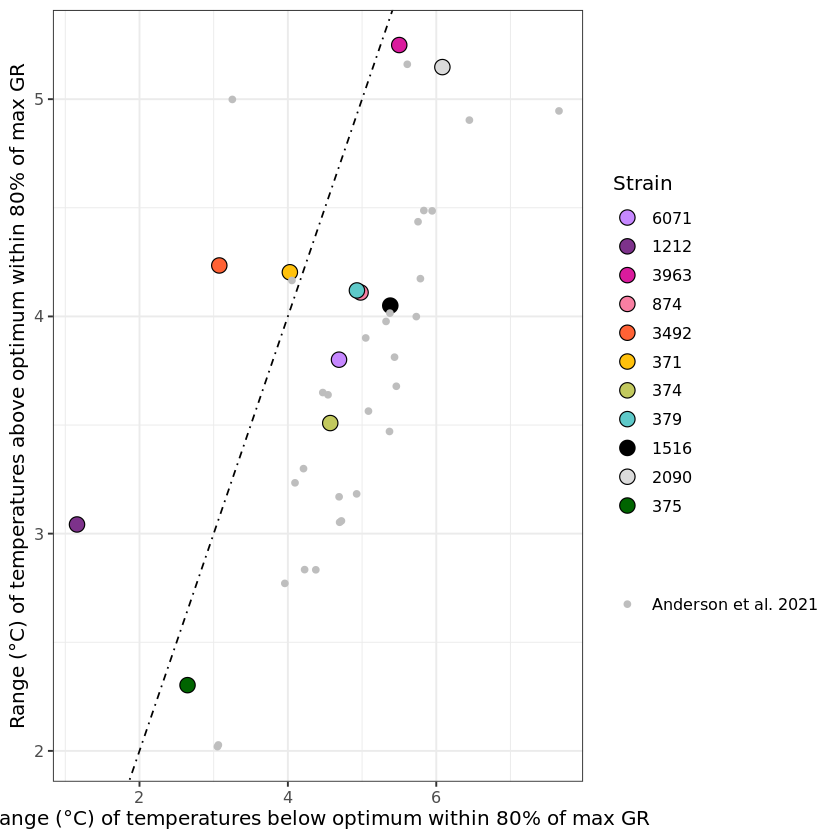

In [12]:
ggplot(revised_df_plateau) + geom_point(aes(x=left_plateau,y=right_plateau,fill=factor(Strain)),pch=21,size=4) + 
    geom_abline(aes(intercept=0,slope=1),linetype="dotdash")+ theme_bw(base_size=12)+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Strains),
                                        values=(strain_color_frame_harriet%>%
                                            dplyr::filter(Strains%in%all_params_coef$Strain))$Colors,
                       name="Strain") +
    geom_point(data=revised_df%>%dplyr::filter(Group=="coccolithophores"),
               aes(x=left_plateau,y=right_plateau,color="Anderson et al. 2021")) + 
    scale_color_manual(limits=c("Anderson et al. 2021"),values="gray",name="") + 
    xlab("Range (°C) of temperatures below optimum within 80% of max GR")+ 
    ylab("Range (°C) of temperatures above optimum within 80% of max GR")

In [151]:
revised_df_2

Strain Revised_opt
1   374   19.58152   
2  3963   19.18172   
3  3492   25.61106   
4  1516   23.13286   
5   874   19.68094   
6   375   24.59385   
7  2090   21.46341   
8   379   20.98970   
9  1212   22.14586   
10  371   23.26621   
11 6071   13.29617

In [154]:
head(revised_df)

Group            Color  Strain                            Revised_opt
1 coccolithophores orange Coccolithus_pelagicus_N476-2      16.44532   
2 coccolithophores orange Emiliania_huxleyi_63              22.30022   
3 coccolithophores orange Calcidiscus_leptoporus_NS10-2     15.46602   
4 coccolithophores orange Gephyrocapsa_oceanica_AB1, CAWPOT 22.29485   
5 coccolithophores orange Emiliania_huxleyi_R strain TQ26   21.11383   
6 coccolithophores orange Emiliania_huxleyi_                22.66429   
  Revised_wid Revised_plateau low_temp high_temp max_GR    t_opt    a        
1 24.03158    10.77           10.83585 21.60585  0.3934441 16.44532 0.3060564
2 47.56464     8.11           17.37326 25.48326  1.6792214 22.30022 0.1970399
3 18.17021     8.22           11.41158 19.63158  0.4072930 15.46602 0.4493987
4 24.70612     9.30           16.97171 26.27171  1.0515003 22.29485 0.2622730
5 27.57939     7.06           16.88821 23.94821  1.4194354 21.11383 0.1170112
6 19.86828     8.18           18.12338 26.30338  1.0527312 22.66429 0.3093176
  b           w        left_plateau right_plateau
1  0.01583011 24.35258 5.609471     5.160529     
2  0.15192402 77.18364 4.926958     3.183042     
3 -0.00630656 18.39921 4.054430     4.165570     
4  0.06889087 24.90112 5.323143     3.976857     
5  0.14093529 28.31639 4.225629     2.834371     
6  0.05727726 19.98928 4.540908     3.639092

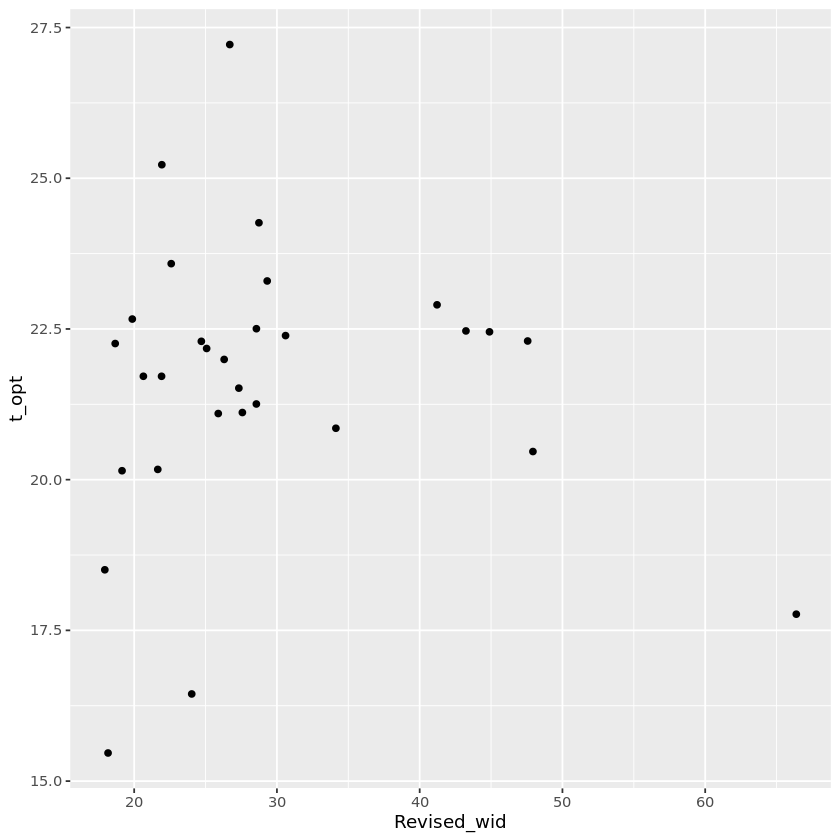

In [156]:
ggplot(revised_df%>%dplyr::filter(Group=="coccolithophores")) + 
    geom_point(aes(x=Revised_wid,y=t_opt))

In [13]:
eppley_comp = ggplot(all_params_coef%>%dplyr::left_join(revised_df_2 %>% 
                                                        dplyr::mutate(Strain=as.numeric(as.character(Strain)))) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(data=revised_df%>%dplyr::filter(Group=="coccolithophores"),
               aes(x=t_opt,y=max_GR),color="light gray",pch=18)+
    geom_point(data=revised_df_vanDassow,
               aes(x=t_opt,y=max_GR),color="brown",pch=18)+
    geom_point(aes(x = Revised_opt, y =MeasuredPoints,fill=Strain),size=5,color="black",
               pch=21) +
    #geom_smooth(aes(x = Revised_opt, y =MeasuredPoints), method="lm") +
    geom_line(data=data.frame(x=c(0:30),y=0.741*exp(0.035*c(0:30))),
              mapping=aes(x=x,y=y),linetype="dotdash") + 
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal optimum (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_size(name="Thermal width")
eppley_comp

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`


ERROR: Error in fortify(data): object 'revised_df_vanDassow' not found


Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`


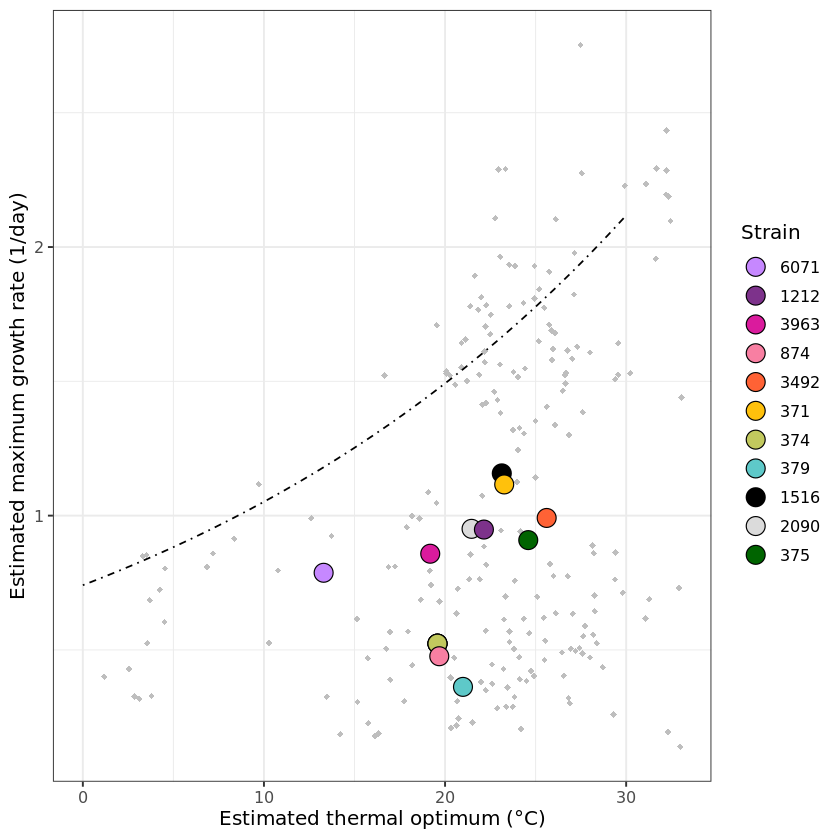

In [125]:
eppley_comp = ggplot(all_params_coef%>%dplyr::left_join(revised_df_2 %>% 
                                                        dplyr::mutate(Strain=as.numeric(as.character(Strain)))) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(data=revised_df%>%dplyr::filter(Group!="coccolithophores"),
               aes(x=t_opt,y=max_GR),color="gray",pch=18)+
    geom_point(aes(x = Revised_opt, y =MeasuredPoints,fill=Strain),size=5,color="black",
               pch=21) +
    #geom_smooth(aes(x = Revised_opt, y =MeasuredPoints), method="lm") +
    geom_line(data=data.frame(x=c(0:30),y=0.741*exp(0.035*c(0:30))),
              mapping=aes(x=x,y=y),linetype="dotdash") + 
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal optimum (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_size(name="Thermal width")
eppley_comp

In [14]:
revised_df_width =data.frame()
recalculate=TRUE # if this is true, we use optimized Topt rather than the one the eqn spits out.

for (strain_curr in all_params_coef$Strain) {
    opt_val = optimize(nbcurve,interval=c(0,40),maximum=TRUE,
         a=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$a,
         b=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$b,
         w=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$w,
         opt=(all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt)$maximum
    wid_eq_1 = ((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        (all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
    wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
        (all_params_coef%>%dplyr::filter(Strain==strain_curr))$opt
    if (recalculate) {
        wid_eq_1 = ((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
            opt_val
        wid_eq_2 = -((all_params_coef%>%dplyr::filter(Strain==strain_curr))$w)/2+
            opt_val
    }
    revised_df_width = revised_df_width %>%
        dplyr::bind_rows(data.frame(Strain=strain_curr,Revised_wid=abs(wid_eq_2-wid_eq_1)))
}

In [15]:
vandassow=read.csv("../../data/Table4_vanDassow.csv")
vandassow=vandassow%>%dplyr::select(Experiment,Strain,Species,
                                    Haplogroup,Growth_Rate_8_deg,Growth_Rate_12_deg,
                                    Growth_Rate_15_deg,Growth_Rate_18_deg,Growth_Rate_21_deg,
                                    Growth_Rate_24_deg,Growth_Rate_27_deg) %>%
    dplyr::mutate_at(colnames(.)[grepl("Growth_Rate",colnames(.))],as.character) %>%
    tidyr::pivot_longer(cols=starts_with("Growth_Rate"),names_to="Temp",values_to="GrowthRate") %>%
    tidyr::separate(Temp,sep="_",into=c("Sep1","Sep2","Temperature","deg")) %>%
    dplyr::mutate(Temperature=as.numeric(Temperature),
                  GrowthRate=as.numeric(trimws(as.character(GrowthRate))))


Warning message:
“There was 1 warning in
`dplyr::mutate()`.
ℹ In argument:
  `GrowthRate =
  as.numeric(trimws(as.character(GrowthRate)))`.
Caused by warning:
! NAs introduced by coercion”


In [16]:
unique(vandassow$Strain)

[1] "SEPA92"  "SEPA100" "SEPA127" "SEPA340" "SEPA342" "SEPA350" "SEPA118"
 [8] "SEPA81"  "SEPA341" "SEPA365" "SEPA373" "SEPA527" "SEPA528" "SEPA529"
[15] "SEPA530" "SEPA516" "SEPA184" "SEPA194" "SEPA565" "RCC1318" "RCC1319"
[22] "RCC1562" "RCC1796" "RCC1803" "RCC3729" "SEPA551" "SEPA552" "SEPA559"
[29] "SEPA561" "SEPA562" "SEPA564" "SEPA571" "SEPA590" "SEPA547" "SEPA555"
[36] "SEPA563" "SEPA566" "SEPA567" "SEPA568" "SEPA569" "SEPA570" "SEPA572"
[43] "SEPA583" "SEPA536" "SEPA539" "SEPA543" "SEPA545" "SEPA546" "SEPA560"
[50] "SEPA574" "SEPA607" "SEPA609"

In [201]:
vandassow

Experiment Strain  Species    Haplogroup Sep1   Sep2 Temperature deg
1   1          SEPA92  E. huxleyi I          Growth Rate  8          deg
2   1          SEPA92  E. huxleyi I          Growth Rate 12          deg
3   1          SEPA92  E. huxleyi I          Growth Rate 15          deg
4   1          SEPA92  E. huxleyi I          Growth Rate 18          deg
5   1          SEPA92  E. huxleyi I          Growth Rate 21          deg
6   1          SEPA92  E. huxleyi I          Growth Rate 24          deg
7   1          SEPA92  E. huxleyi I          Growth Rate 27          deg
8   1          SEPA100 E. huxleyi I          Growth Rate  8          deg
9   1          SEPA100 E. huxleyi I          Growth Rate 12          deg
10  1          SEPA100 E. huxleyi I          Growth Rate 15          deg
11  1          SEPA100 E. huxleyi I          Growth Rate 18          deg
12  1          SEPA100 E. huxleyi I          Growth Rate 21          deg
13  1          SEPA100 E. huxleyi I          Growth Rate 24          deg
14  1          SEPA100 E. huxleyi I          Growth Rate 27          deg
15  1          SEPA127 E. huxleyi I          Growth Rate  8          deg
16  1          SEPA127 E. huxleyi I          Growth Rate 12          deg
17  1          SEPA127 E. huxleyi I          Growth Rate 15          deg
18  1          SEPA127 E. huxleyi I          Growth Rate 18          deg
19  1          SEPA127 E. huxleyi I          Growth Rate 21          deg
20  1          SEPA127 E. huxleyi I          Growth Rate 24          deg
21  1          SEPA127 E. huxleyi I          Growth Rate 27          deg
22  1          SEPA340 E. huxleyi I          Growth Rate  8          deg
23  1          SEPA340 E. huxleyi I          Growth Rate 12          deg
24  1          SEPA340 E. huxleyi I          Growth Rate 15          deg
25  1          SEPA340 E. huxleyi I          Growth Rate 18          deg
26  1          SEPA340 E. huxleyi I          Growth Rate 21          deg
27  1          SEPA340 E. huxleyi I          Growth Rate 24          deg
28  1          SEPA340 E. huxleyi I          Growth Rate 27          deg
29  1          SEPA342 E. huxleyi I          Growth Rate  8          deg
30  1          SEPA342 E. huxleyi I          Growth Rate 12          deg
⋮   ⋮          ⋮       ⋮          ⋮          ⋮      ⋮    ⋮           ⋮  
335 2          SEPA546 E. huxleyi II         Growth Rate 24          deg
336 2          SEPA546 E. huxleyi II         Growth Rate 27          deg
337 2          SEPA560 E. huxleyi II         Growth Rate  8          deg
338 2          SEPA560 E. huxleyi II         Growth Rate 12          deg
339 2          SEPA560 E. huxleyi II         Growth Rate 15          deg
340 2          SEPA560 E. huxleyi II         Growth Rate 18          deg
341 2          SEPA560 E. huxleyi II         Growth Rate 21          deg
342 2          SEPA560 E. huxleyi II         Growth Rate 24          deg
343 2          SEPA560 E. huxleyi II         Growth Rate 27          deg
344 2          SEPA574 E. huxleyi II         Growth Rate  8          deg
345 2          SEPA574 E. huxleyi II         Growth Rate 12          deg
346 2          SEPA574 E. huxleyi II         Growth Rate 15          deg
347 2          SEPA574 E. huxleyi II         Growth Rate 18          deg
348 2          SEPA574 E. huxleyi II         Growth Rate 21          deg
349 2          SEPA574 E. huxleyi II         Growth Rate 24          deg
350 2          SEPA574 E. huxleyi II         Growth Rate 27          deg
351 2          SEPA607 E. huxleyi II         Growth Rate  8          deg
352 2          SEPA607 E. huxleyi II         Growth Rate 12          deg
353 2          SEPA607 E. huxleyi II         Growth Rate 15          deg
354 2          SEPA607 E. huxleyi II         Growth Rate 18          deg
355 2          SEPA607 E. huxleyi II         Growth Rate 21          deg
356 2          SEPA607 E. huxleyi II         Growth Rate 24          deg
357 2          SEPA607 E. huxleyi II         Growth Rate 27   

# A tibble: 7 × 9
  Experiment Strain Species  Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>  <chr>    <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA92 E. huxl… I          Grow… Rate            8 deg        0.159
2          1 SEPA92 E. huxl… I          Grow… Rate           12 deg        0.454
3          1 SEPA92 E. huxl… I          Grow… Rate           15 deg        0.5  
4          1 SEPA92 E. huxl… I          Grow… Rate           18 deg        0.835
5          1 SEPA92 E. huxl… I          Grow… Rate           21 deg        1.01 
6          1 SEPA92 E. huxl… I          Grow… Rate           24 deg        0.946
7          1 SEPA92 E. huxl… I          Grow… Rate           27 deg        0.491


Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1050318
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


 [1] -1.495000e-01 -1.431357e-01 -1.347564e-01 -1.241299e-01 -1.110123e-01
 [6] -9.514999e-02 -7.628227e-02 -5.414508e-02 -2.847565e-02  9.814498e-04
[11]  3.446660e-02  7.219555e-02  1.143475e-01  1.610506e-01  2.123641e-01
[16]  2.682565e-01  3.285799e-01  3.930384e-01  4.611507e-01  5.322052e-01
[21]  6.052072e-01  6.788158e-01  7.512693e-01  8.202977e-01  8.830190e-01
[26]  9.358186e-01  9.742063e-01  9.926508e-01  9.843847e-01  9.411784e-01
[31]  8.530759e-01  7.080876e-01  4.918341e-01  1.871317e-01 -2.264871e-01
[36] -7.733291e-01 -1.482183e+00 -2.387063e+00 -3.528065e+00 -4.952357e+00
[41] -6.715317e+00 -8.881853e+00 -1.152791e+01 -1.474220e+01 -1.862822e+01
[46] -2.330654e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA100 E. hux… I          Grow… Rate            8 deg        0.21 
2          1 SEPA100 E. hux… I          Grow… Rate           12 deg        0.431
3          1 SEPA100 E. hux… I          Grow… Rate           15 deg        0.427
4          1 SEPA100 E. hux… I          Grow… Rate           18 deg        0.91 
5          1 SEPA100 E. hux… I          Grow… Rate           21 deg        1.28 
6          1 SEPA100 E. hux… I          Grow… Rate           24 deg        0.557
7          1 SEPA100 E. hux… I          Grow… Rate           27 deg        0.01 


Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1706845
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


 [1] -1.518543e-02 -1.297552e-02 -9.776920e-03 -5.365166e-03  5.210676e-04
 [6]  8.183563e-03  1.796782e-02  3.026561e-02  4.551637e-02  6.420675e-02
[11]  8.686756e-02  1.140669e-01  1.463978e-01  1.844591e-01  2.288260e-01
[16]  2.800078e-01  3.383882e-01  4.041432e-01  4.771285e-01  5.567299e-01
[21]  6.416624e-01  7.297066e-01  8.173631e-01  8.994029e-01  9.682850e-01
[26]  1.013407e+00  1.020143e+00  9.686141e-01  8.321202e-01  5.751537e-01
[31]  1.508773e-01 -5.020582e-01 -1.463527e+00 -2.836972e+00 -4.755746e+00
[36] -7.391040e+00 -1.096182e+01 -1.574721e+01 -2.210199e+01 -3.047578e+01
[41] -4.143707e+01 -5.570286e+01 -7.417564e+01 -9.798904e+01 -1.285645e+02
[46] -1.676810e+02
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA127 E. hux… I          Grow… Rate            8 deg        0.141
2          1 SEPA127 E. hux… I          Grow… Rate           12 deg        0.392
3          1 SEPA127 E. hux… I          Grow… Rate           15 deg        0.359
4          1 SEPA127 E. hux… I          Grow… Rate           18 deg        0.699
5          1 SEPA127 E. hux… I          Grow… Rate           21 deg        1.05 
6          1 SEPA127 E. hux… I          Grow… Rate           24 deg        1.10 
7          1 SEPA127 E. hux… I          Grow… Rate           27 deg        0.307


Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1694932
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


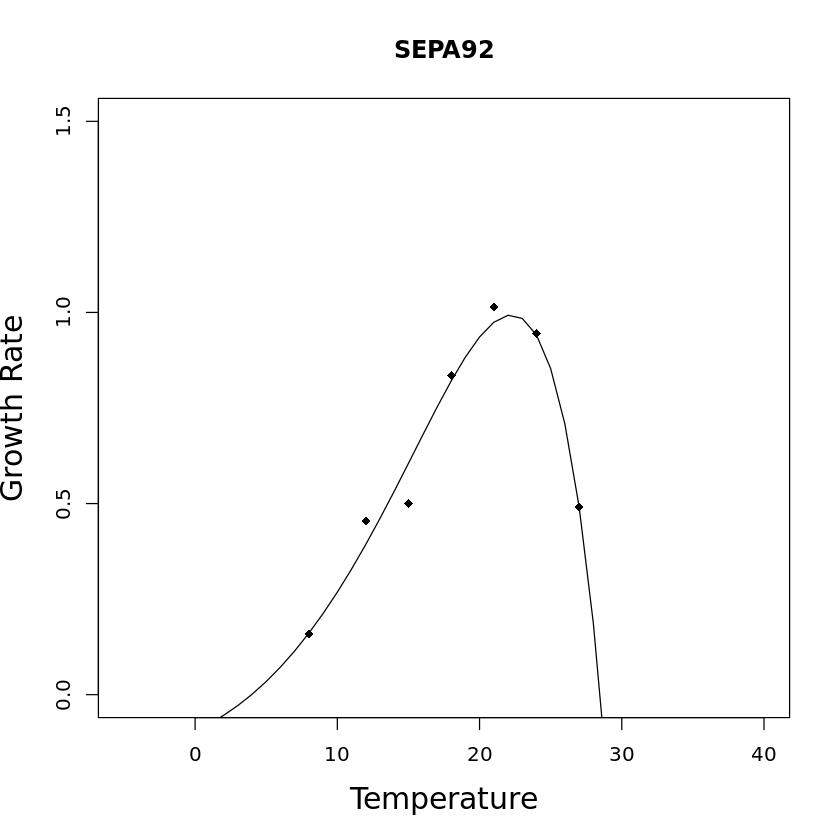

 [1] -8.462794e-03 -6.720512e-03 -4.270729e-03 -9.530544e-04  3.420346e-03
 [6]  9.067997e-03  1.624237e-02  2.523297e-02  3.636905e-02  5.002166e-02
[11]  6.660447e-02  8.657302e-02  1.104214e-01  1.386754e-01  1.718811e-01
[16]  2.105862e-01  2.553133e-01  3.065212e-01  3.645501e-01  4.295476e-01
[21]  5.013673e-01  5.794344e-01  6.625669e-01  7.487408e-01  8.347843e-01
[26]  9.159806e-01  9.855555e-01  1.034019e+00  1.048326e+00  1.010797e+00
[31]  8.977627e-01  6.778309e-01  3.097063e-01 -2.605602e-01 -1.103030e+00
[36] -2.308219e+00 -3.992531e+00 -6.305057e+00 -9.436060e+00 -1.362755e+01
[41] -1.918642e+01 -2.650086e+01 -3.606056e+01 -4.848194e+01 -6.453930e+01
[46] -8.520330e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


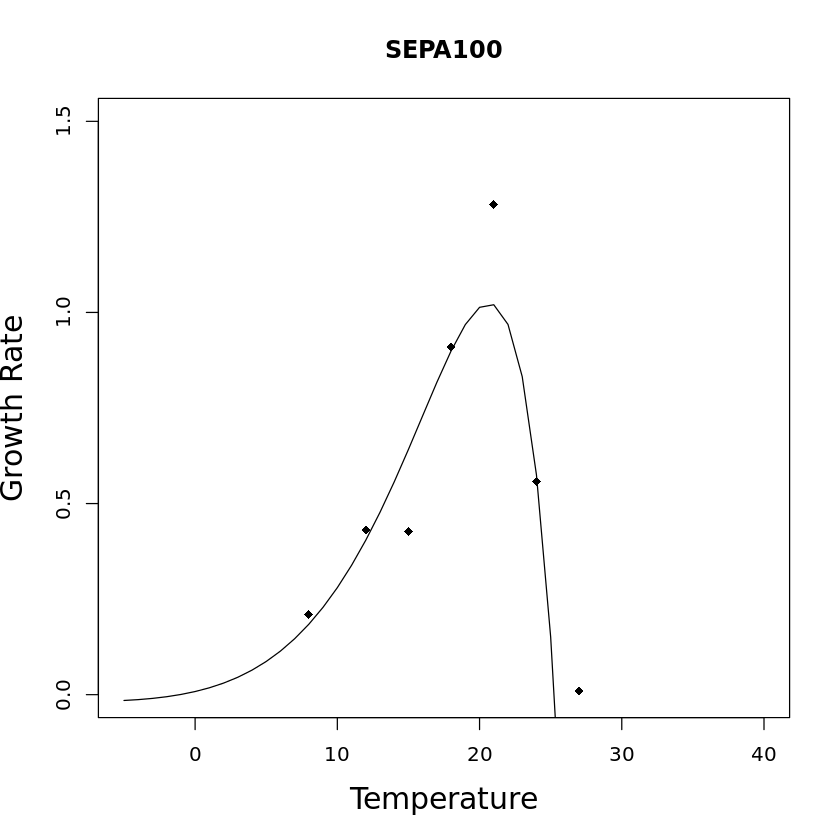

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA340 E. hux… I          Grow… Rate            8 deg        0.093
2          1 SEPA340 E. hux… I          Grow… Rate           12 deg        0.239
3          1 SEPA340 E. hux… I          Grow… Rate           15 deg        0.627
4          1 SEPA340 E. hux… I          Grow… Rate           18 deg        0.781
5          1 SEPA340 E. hux… I          Grow… Rate           21 deg        0.874
6          1 SEPA340 E. hux… I          Grow… Rate           24 deg        0.961
7          1 SEPA340 E. hux… I          Grow… Rate           27 deg        0.333
[1] 0.06540662
[1] "^b"
 [1]  -1.09494104  -1.05688309  -1.01378513  -0.96548493  -0.91184468
 [6]  -0.85275665  -0.78814951  -0.71799559  -0.64231900  -0.56120481
[11]  -0.47480939  -0.38337195  -0.28722758  -0.18682172  -0.08272641
[16]   0.02434156  

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.09119758
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


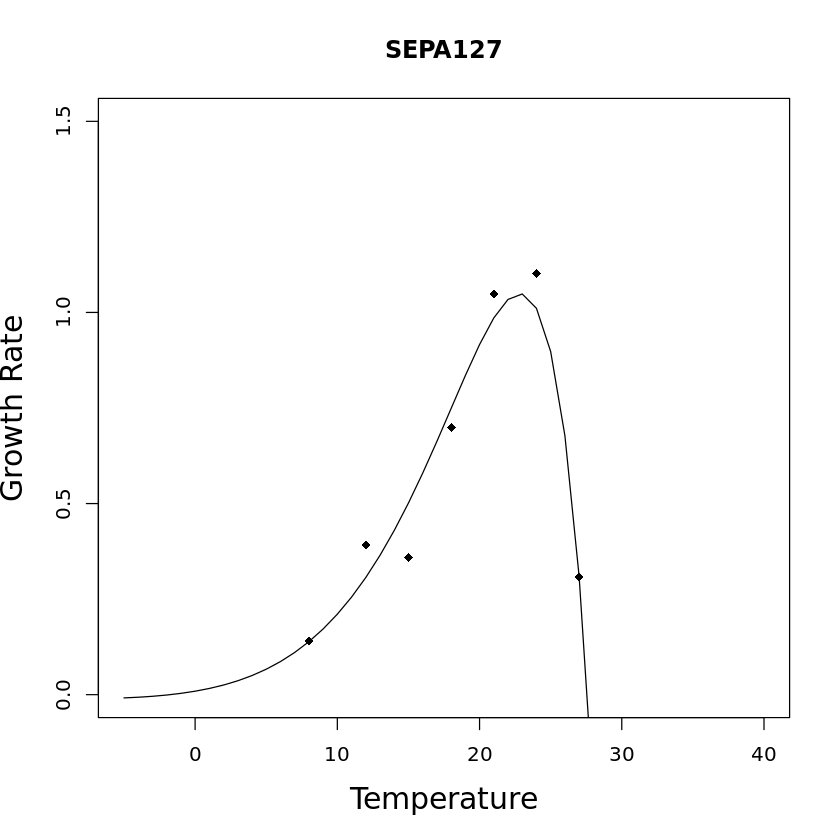

 [1]  -0.186644727  -0.178659805  -0.168775941  -0.156830066  -0.142657390
 [6]  -0.126093716  -0.106978317  -0.085157486  -0.060488865  -0.032846670
[11]  -0.002127986   0.031739725   0.068789697   0.109005293   0.152307551
[16]   0.198540559   0.247454328   0.298684791   0.351730516   0.405925652
[21]   0.460408556   0.514085506   0.565588785   0.613228364   0.654936279
[26]   0.688202703   0.710002573   0.716711486   0.704009401   0.666770530
[31]   0.598937546   0.493378046   0.341720908   0.134169906  -0.140708393
[36]  -0.496225803  -0.947846516  -1.513498170  -2.213924741  -3.073086603
[41]  -4.118613756  -5.382318981  -6.900778464  -8.715988394 -10.876107058
[46] -13.436293096
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA350 E. hux… I          Grow… Rate            8 deg        0.075
2          1 SEPA350 E. hux… I          Grow… Rate           12 deg        0.269
3          1 SEPA350 E. hux… I          Grow… Rate           15 deg        0.316
4          1 SEPA350 E. hux… I          Grow… Rate           18 deg        0.747
5          1 SEPA350 E. hux… I          Grow… Rate           21 deg        0.969
6          1 SEPA350 E. hux… I          Grow… Rate           24 deg        0.691
7          1 SEPA350 E. hux… I          Grow… Rate           27 deg        0.527


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] -0.04284719
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


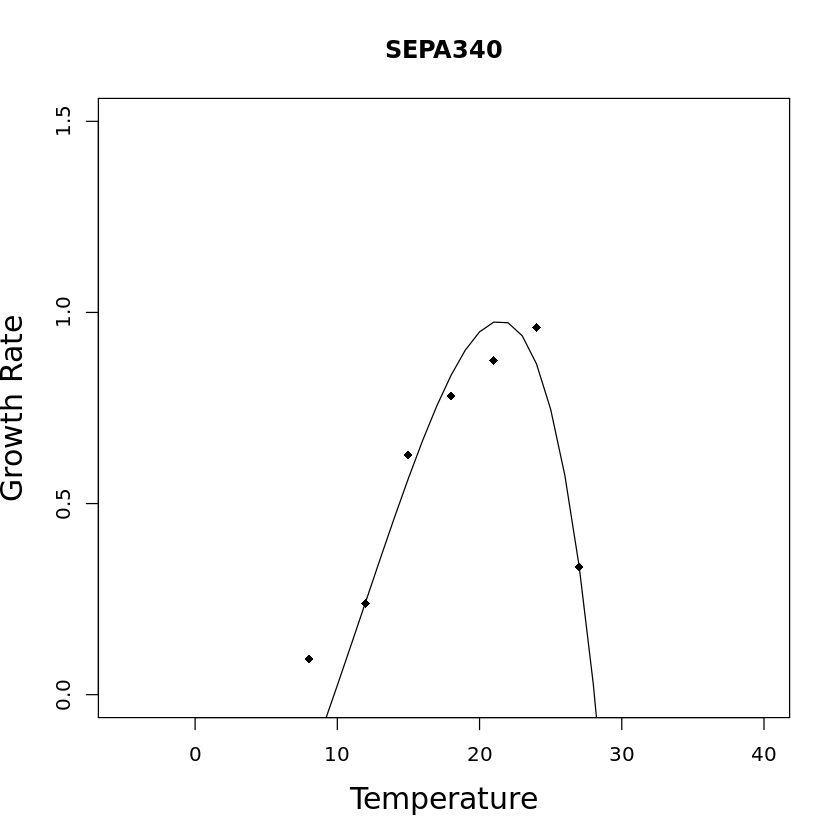

 [1] -25.026793802 -22.068886128 -19.383030851 -16.948760192 -14.746964260
 [6] -12.759808147 -10.970653782  -9.363986312  -7.925344738  -6.641256586
[11]  -5.499176371  -4.487427667  -3.595148554  -2.812240283  -2.129318947
[16]  -1.537670024  -1.029205599  -0.596424133  -0.232372635   0.069388914
[21]   0.314820993   0.509435965   0.658327601   0.766198819   0.837387725
[26]   0.875892074   0.885392227   0.869272697   0.830642360   0.772353419
[31]   0.697019185   0.607030739   0.504572559   0.391637151   0.270038761
[36]   0.141426203   0.007294882  -0.131001973  -0.272242790  -0.415327824
[41]  -0.559269965  -0.703186156  -0.846289370  -0.987881127  -1.127344505
[46]  -1.264137625
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA118 E. hux… Ib         Grow… Rate            8 deg        0.216
2          1 SEPA118 E. hux… Ib         Grow… Rate           12 deg        0.359
3          1 SEPA118 E. hux… Ib         Grow… Rate           15 deg        0.549
4          1 SEPA118 E. hux… Ib         Grow… Rate           18 deg        0.95 
5          1 SEPA118 E. hux… Ib         Grow… Rate           21 deg        1.23 
6          1 SEPA118 E. hux… Ib         Grow… Rate           24 deg        0.01 
7          1 SEPA118 E. hux… Ib         Grow… Rate           27 deg        0.01 


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1698043
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


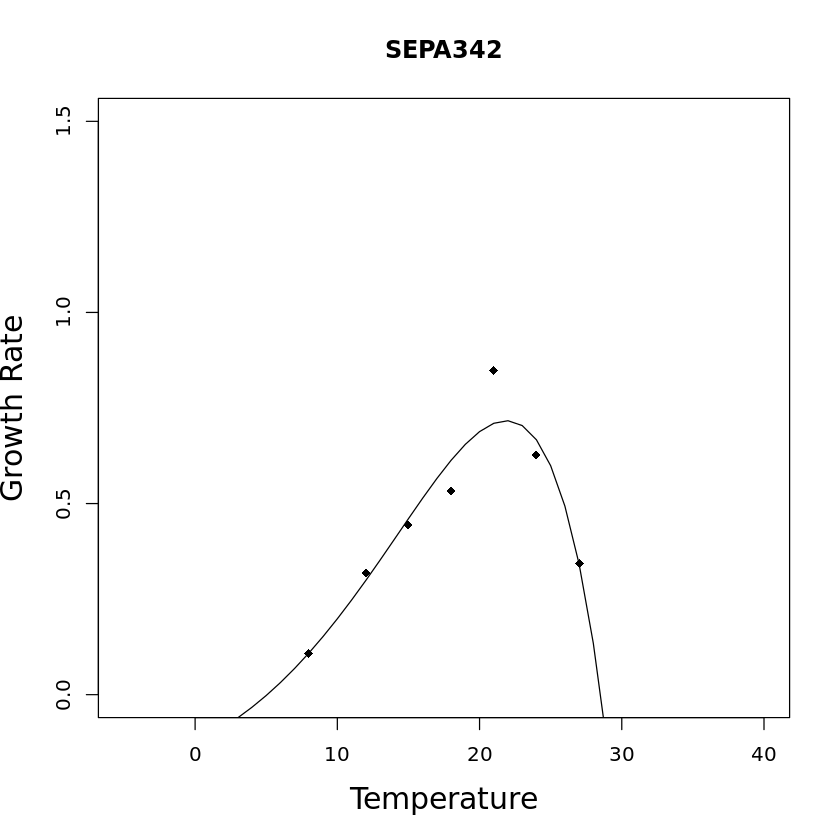

 [1] -4.752825e-02 -4.726179e-02 -4.587150e-02 -4.306208e-02 -3.848807e-02
 [6] -3.174920e-02 -2.238649e-02 -9.879558e-03  6.353982e-03  2.695614e-02
[11]  5.262174e-02  8.408537e-02  1.220998e-01  1.674027e-01  2.206674e-01
[16]  2.824336e-01  3.530092e-01  4.323374e-01  5.198160e-01  6.140568e-01
[21]  7.125659e-01  8.113244e-01  9.042411e-01  9.824415e-01  1.033350e+00
[26]  1.039511e+00  9.770745e-01  8.138733e-01  5.069656e-01 -4.733576e-04
[31] -7.830867e-01 -1.938300e+00 -3.592573e+00 -5.909252e+00 -9.098417e+00
[36] -1.342921e+01 -1.924524e+01 -2.698380e+01 -3.719981e+01 -5.059561e+01
[41] -6.805797e+01 -9.070405e+01 -1.199383e+02 -1.575231e+02 -2.056656e+02
[46] -2.671261e+02
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


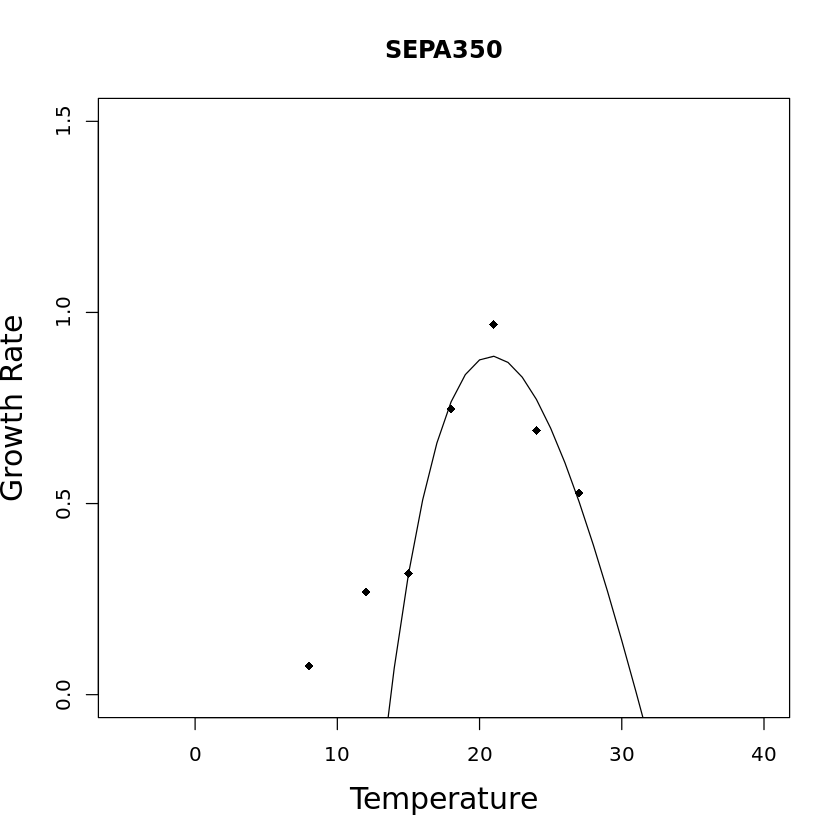

# A tibble: 7 × 9
  Experiment Strain Species  Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>  <chr>    <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA81 E. huxl… II         Grow… Rate            8 deg        0.149
2          1 SEPA81 E. huxl… II         Grow… Rate           12 deg        0.41 
3          1 SEPA81 E. huxl… II         Grow… Rate           15 deg        0.568
4          1 SEPA81 E. huxl… II         Grow… Rate           18 deg        0.619
5          1 SEPA81 E. huxl… II         Grow… Rate           21 deg        0.844
6          1 SEPA81 E. huxl… II         Grow… Rate           24 deg        1.05 
7          1 SEPA81 E. huxl… II         Grow… Rate           27 deg        0.579
[1] 0.0907198
[1] "^b"
 [1]  -0.19757482  -0.18787076  -0.17599629  -0.16176481  -0.14498696
 [6]  -0.12547304  -0.10303602  -0.07749521  -0.04868084  -0.01643951
[11]   0.01935917   0.05881473   0.10198640   0.14888203   0.19944494
[16]   0.25353853   

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.04852518
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


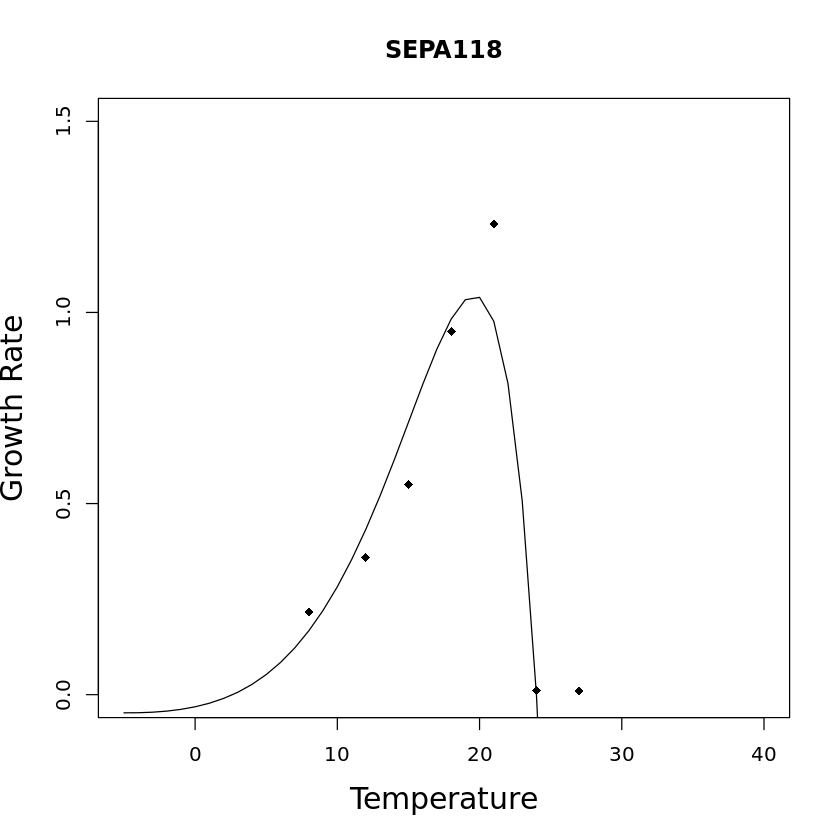

 [1]  -3.29479401  -3.17112923  -3.03905521  -2.89863979  -2.75000809
 [6]  -2.59334953  -2.42892548  -2.25707752  -2.07823656  -1.89293262
[11]  -1.70180551  -1.50561645  -1.30526060  -1.10178071  -0.89638184
[16]  -0.69044738  -0.48555626  -0.28350167  -0.08631122   0.10373124
[21]   0.28406212   0.45181266   0.60378161   0.73640563   0.84572755
[26]   0.92736209   0.97645896   0.98766314   0.95507223   0.87219043
[31]   0.73187922   0.52630423   0.24687823  -0.11580012  -0.57201206
[36]  -1.13298931  -1.81098986  -2.61937920  -3.57271754  -4.68685321
[41]  -5.97902292  -7.46795907  -9.17400481 -11.11923726 -13.32759944
[46] -15.82504157
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA365 E. hux… II         Grow… Rate            8 deg        0.03 
2          1 SEPA365 E. hux… II         Grow… Rate           12 deg        0.249
3          1 SEPA365 E. hux… II         Grow… Rate           15 deg        0.547
4          1 SEPA365 E. hux… II         Grow… Rate           18 deg        0.877
5          1 SEPA365 E. hux… II         Grow… Rate           21 deg        0.979
6          1 SEPA365 E. hux… II         Grow… Rate           24 deg        0.935
7          1 SEPA365 E. hux… II         Grow… Rate           27 deg        0.428


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.07298758
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


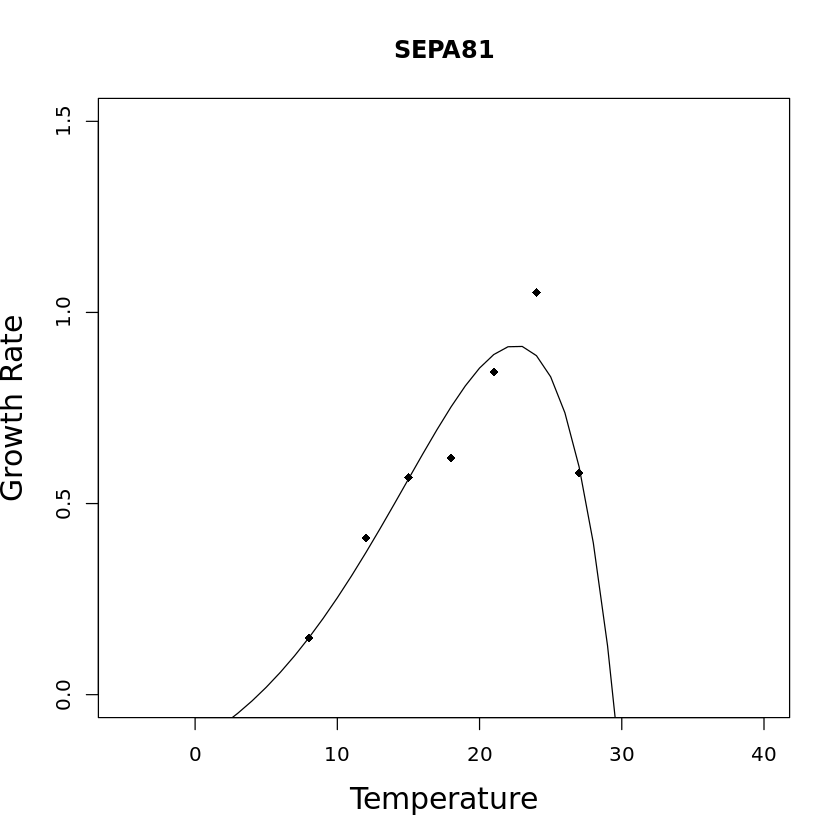

 [1]  -0.87171185  -0.84708021  -0.81788077  -0.78387801  -0.74485075
 [6]  -0.70059753  -0.65094280  -0.59574403  -0.53490006  -0.46836051
[11]  -0.39613669  -0.31831406  -0.23506633  -0.14667165  -0.05353086
[16]   0.04381178   0.14464509   0.24806452   0.35294227   0.45789366
[21]   0.56123927   0.66096248   0.75466173   0.83949716   0.91213069
[26]   0.96865912   1.00453933   1.01450476   0.99247219   0.93143790
[31]   0.82336191   0.65903922   0.42795645   0.11813260  -0.28405794
[36]  -0.79408191  -1.42946515  -2.21003449  -3.15818574  -4.29918068
[41]  -5.66147591  -7.27708679  -9.18199011 -11.41656938 -14.02610696
[46] -17.06132791
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


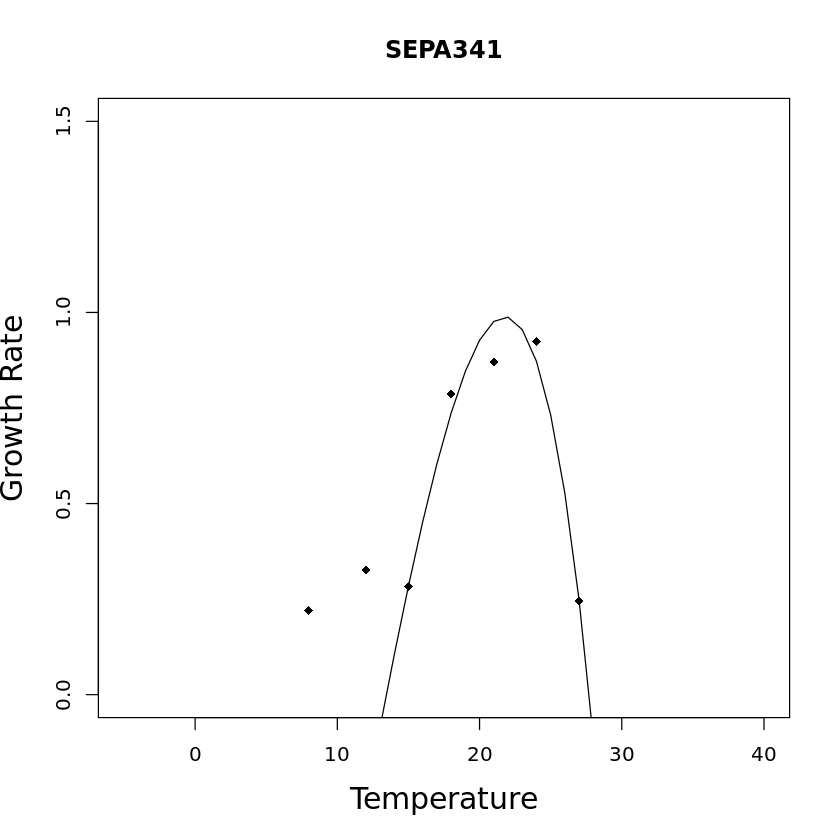

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA373 E. hux… II         Grow… Rate            8 deg        0.074
2          1 SEPA373 E. hux… II         Grow… Rate           12 deg        0.303
3          1 SEPA373 E. hux… II         Grow… Rate           15 deg        0.415
4          1 SEPA373 E. hux… II         Grow… Rate           18 deg        0.505
5          1 SEPA373 E. hux… II         Grow… Rate           21 deg        0.88 
6          1 SEPA373 E. hux… II         Grow… Rate           24 deg        0.82 
7          1 SEPA373 E. hux… II         Grow… Rate           27 deg        0.312
[1] 0.1198345
[1] "^b"
 [1]  -0.11360691  -0.11241857  -0.10991614  -0.10588992  -0.10011156
 [6]  -0.09233446  -0.08229469  -0.06971280  -0.05429655  -0.03574502
[11]  -0.01375419   0.01197544   0.04172880   0.07576323   0.11429178
[16]   0.15746212   

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1277667
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


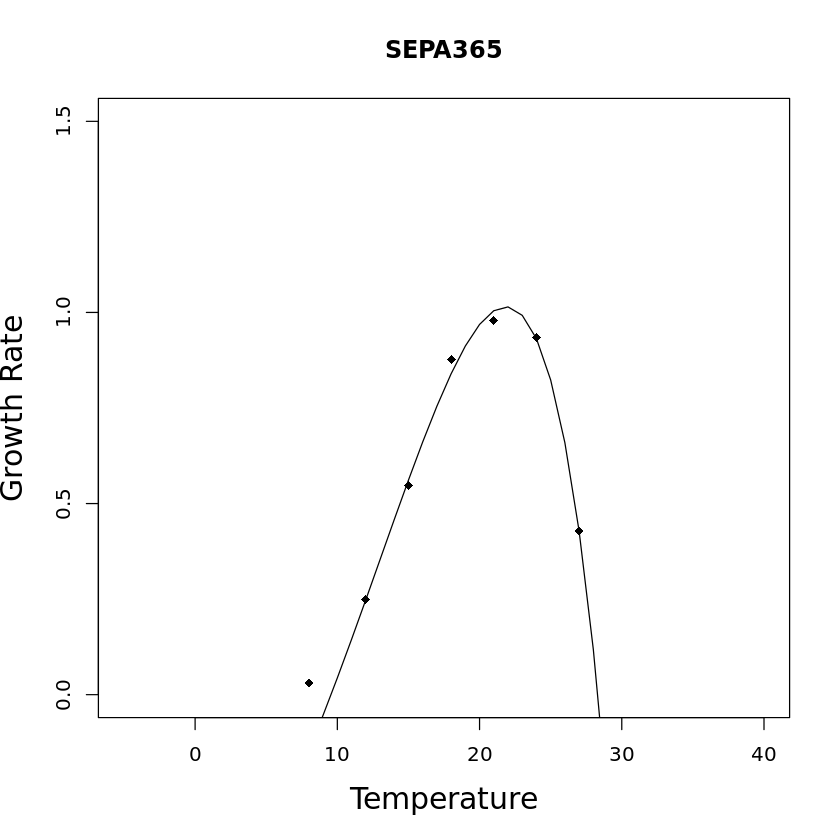

 [1] -1.593769e-01 -1.622146e-01 -1.638350e-01 -1.639855e-01 -1.623856e-01
 [6] -1.587261e-01 -1.526689e-01 -1.438489e-01 -1.318756e-01 -1.163380e-01
[11] -9.680984e-02 -7.285930e-02 -4.406089e-02 -1.001214e-02  2.964443e-02
[16]  7.519281e-02  1.268068e-01  1.845034e-01  2.480838e-01  3.170596e-01
[21]  3.905610e-01  4.672228e-01  5.450440e-01  6.212156e-01  6.919094e-01
[26]  7.520210e-01  7.948569e-01  8.117559e-01  7.916298e-01  7.204110e-01
[31]  5.803861e-01  3.493950e-01 -1.284134e-04 -5.023071e-01 -1.199195e+00
[36] -2.142420e+00 -3.395137e+00 -5.034365e+00 -7.153750e+00 -9.866863e+00
[41] -1.331110e+01 -1.765233e+01 -2.309034e+01 -2.986536e+01 -3.826571e+01
[46] -4.863685e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


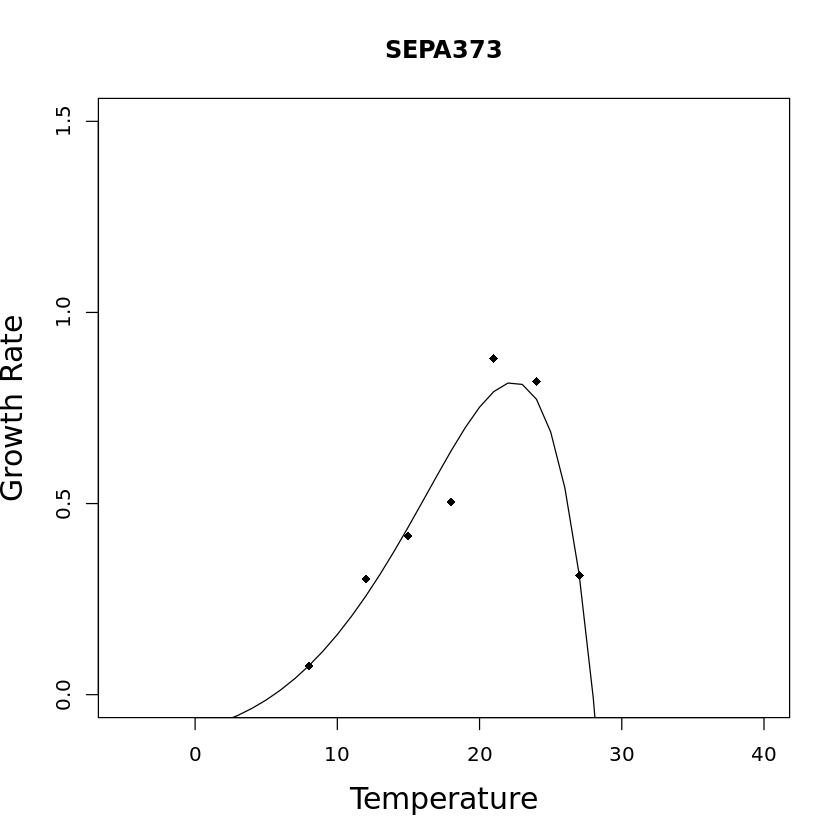

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA528 G. par… I          Grow… Rate            8 deg        0.01 
2          1 SEPA528 G. par… I          Grow… Rate           12 deg        0.099
3          1 SEPA528 G. par… I          Grow… Rate           15 deg        0.182
4          1 SEPA528 G. par… I          Grow… Rate           18 deg        0.515
5          1 SEPA528 G. par… I          Grow… Rate           21 deg        0.891
6          1 SEPA528 G. par… I          Grow… Rate           24 deg        0.934
7          1 SEPA528 G. par… I          Grow… Rate           27 deg        0.468
[1] 0.1082256
[1] "^b"
 [1]  -0.56629299  -0.57855961  -0.58854937  -0.59584641  -0.59999977
 [6]  -0.60052436  -0.59690285  -0.58858892  -0.57501222  -0.55558533
[11]  -0.52971323  -0.49680592  -0.45629465  -0.40765277  -0.35042191
[16]  -0.28424471  -

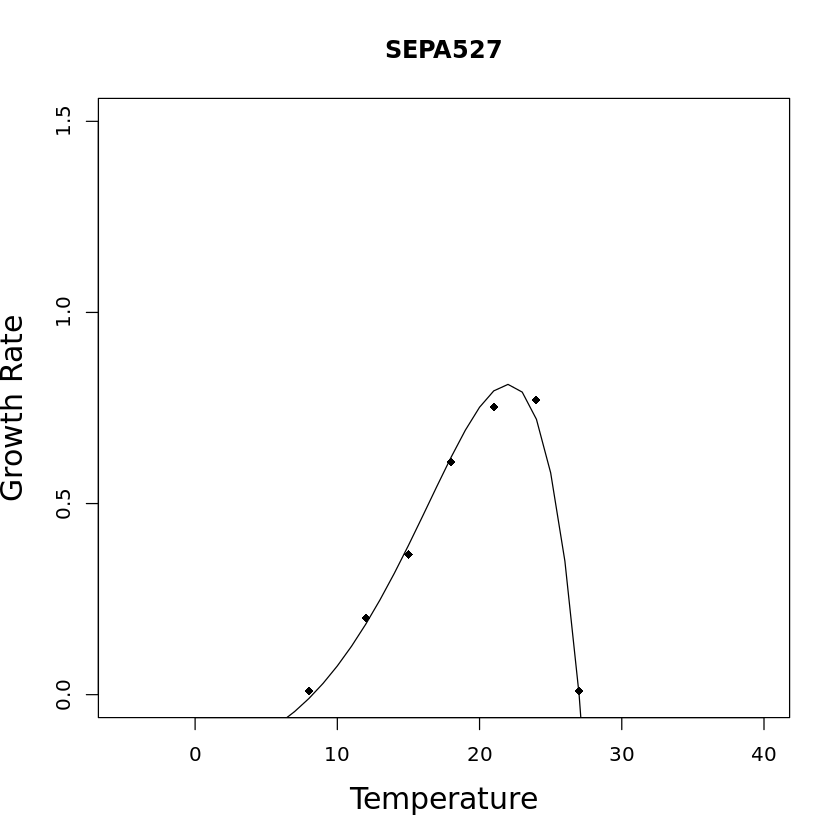

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA529 G. par… I          Grow… Rate            8 deg        0.01 
2          1 SEPA529 G. par… I          Grow… Rate           12 deg        0.197
3          1 SEPA529 G. par… I          Grow… Rate           15 deg        0.5  
4          1 SEPA529 G. par… I          Grow… Rate           18 deg        0.818
5          1 SEPA529 G. par… I          Grow… Rate           21 deg        0.652
6          1 SEPA529 G. par… I          Grow… Rate           24 deg        0.892
7          1 SEPA529 G. par… I          Grow… Rate           27 deg        0.48 
[1] 0.0305482
[1] "^b"
 [1] -2.10780291 -1.97307244 -1.83634958 -1.69790074 -1.55801888 -1.41702509
 [7] -1.27527038 -1.13313743 -0.99104254 -0.84943760 -0.70881219 -0.56969582
[13] -0.43266021 -0.29832173 -0.16734393 -0.04044028  0.08162312  0.19802451

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.0571055
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


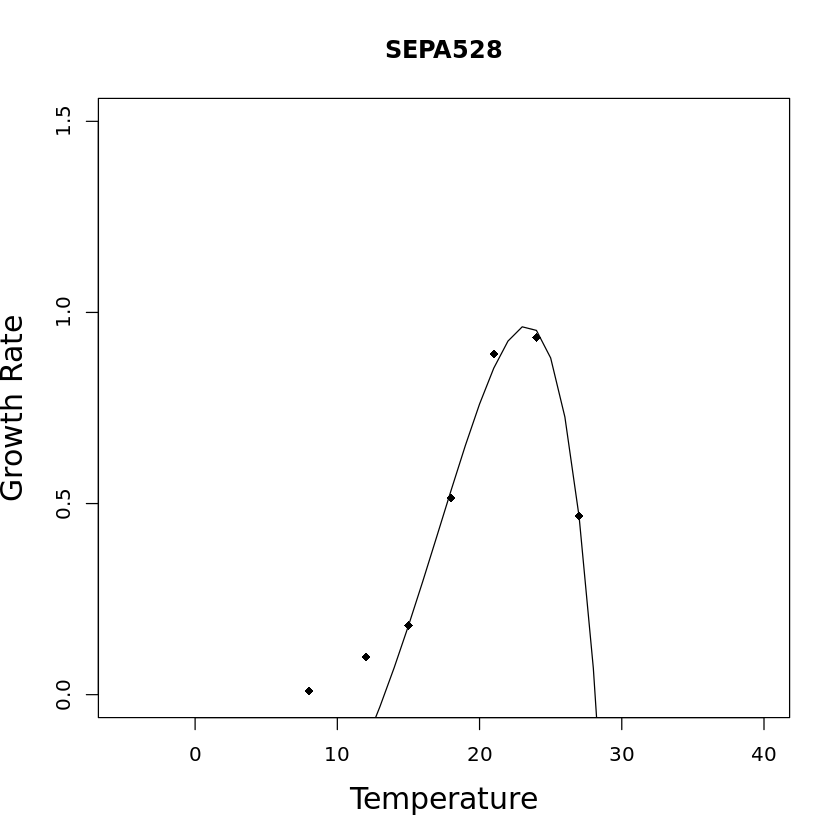

 [1]  -2.40639847  -2.33658566  -2.25907748  -2.17372896  -2.08043510
 [6]  -1.97913791  -1.86983417  -1.75258407  -1.62752082  -1.49486126
[11]  -1.35491760  -1.20811043  -1.05498304  -0.89621718  -0.73265053
[16]  -0.56529574  -0.39536157  -0.22427588  -0.05371107   0.11438819
[21]   0.27777452   0.43386444   0.57970199   0.71191879   0.82669052
[26]   0.91968936   0.98603204   1.02022326   1.01609392   0.96673389
[31]   0.86441873   0.70052996   0.46546829   0.14855921  -0.26204955
[36]  -0.77949956  -1.41834279  -2.19467314  -3.12626916  -4.23274900
[41]  -5.53573842  -7.05905299  -8.82889556 -10.87407035 -13.22621471
[46] -15.92005033
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


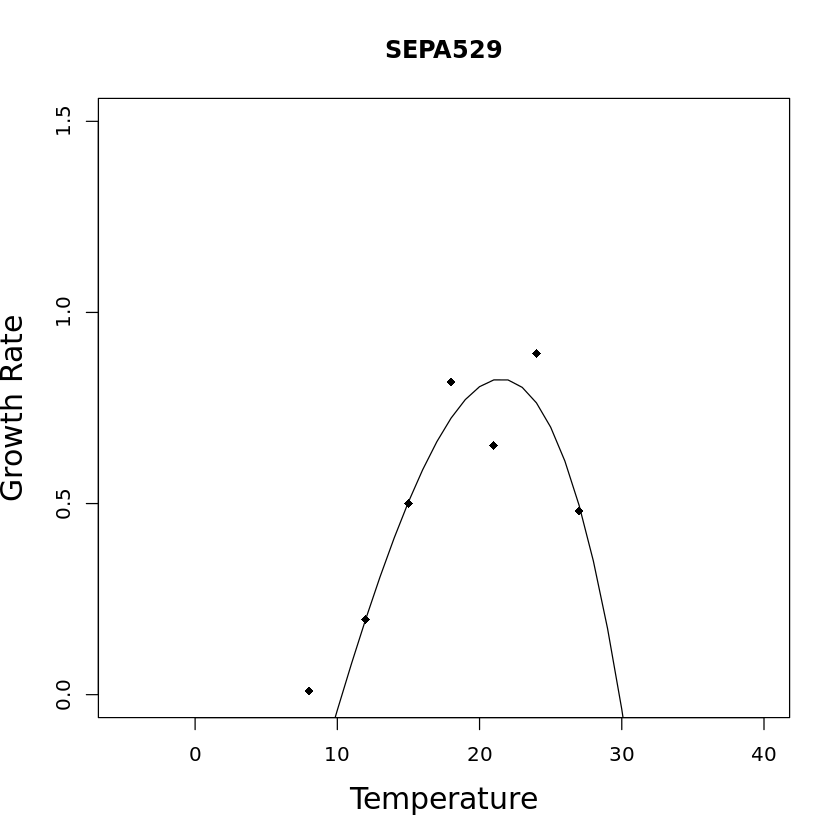

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA516 G. eri… I          Grow… Rate            8 deg        0.01 
2          1 SEPA516 G. eri… I          Grow… Rate           12 deg        0.274
3          1 SEPA516 G. eri… I          Grow… Rate           15 deg        0.387
4          1 SEPA516 G. eri… I          Grow… Rate           18 deg        0.516
5          1 SEPA516 G. eri… I          Grow… Rate           21 deg        0.486
6          1 SEPA516 G. eri… I          Grow… Rate           24 deg        0.632
7          1 SEPA516 G. eri… I          Grow… Rate           27 deg        0.01 
[1] 0.08275765
[1] "^b"
 [1]  -0.37302568  -0.36190018  -0.34822422  -0.33182568  -0.31253770
 [6]  -0.29020226  -0.26467441  -0.23582736  -0.20355848  -0.16779626
[11]  -0.12850858  -0.08571232  -0.03948446   0.01002495   0.06257789
[16]   0.11783113  

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.0645025
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


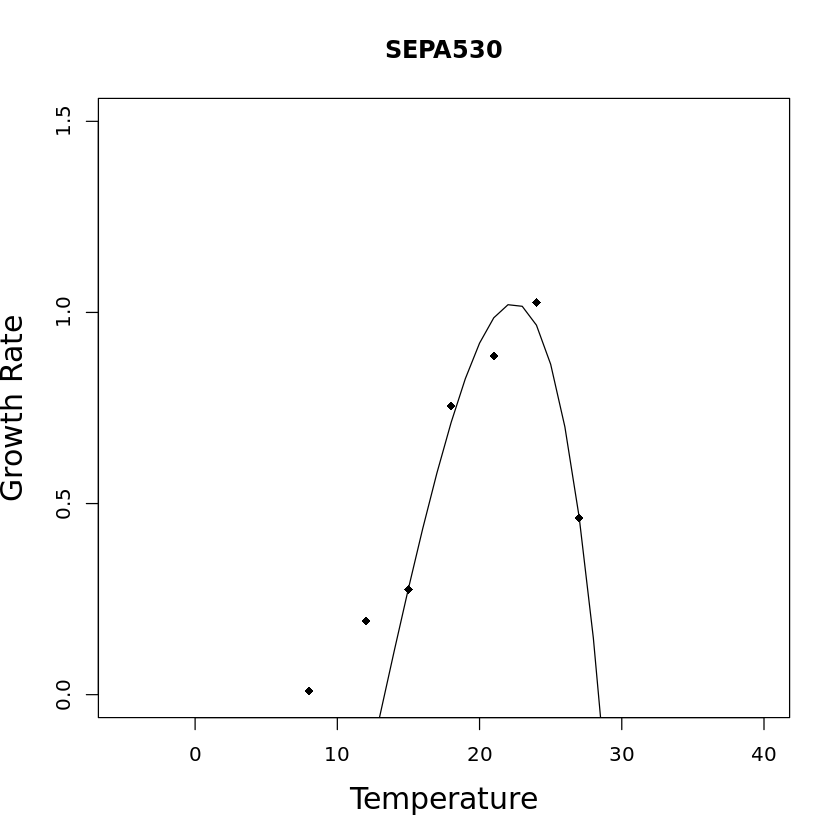

 [1] -1.665659e+00 -1.598774e+00 -1.524466e+00 -1.442633e+00 -1.353236e+00
 [6] -1.256301e+00 -1.151941e+00 -1.040362e+00 -9.218815e-01 -7.969482e-01
[11] -6.661574e-01 -5.302748e-01 -3.902603e-01 -2.472947e-01 -1.028096e-01
[16]  4.147923e-02  1.835351e-01  3.209598e-01  4.509478e-01  5.702369e-01
[21]  6.750521e-01  7.610451e-01  8.232263e-01  8.558906e-01  8.525350e-01
[26]  8.057680e-01  7.072103e-01  5.473848e-01  3.155958e-01 -2.034304e-04
[31] -4.135562e-01 -9.396630e-01 -1.595557e+00 -2.400295e+00 -3.375173e+00
[36] -4.543953e+00 -5.933120e+00 -7.572158e+00 -9.493856e+00 -1.173464e+01
[41] -1.433494e+01 -1.733957e+01 -2.079821e+01 -2.476582e+01 -2.930320e+01
[46] -3.447756e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA194 G. mue… II         Grow… Rate            8 deg        0.224
2          1 SEPA194 G. mue… II         Grow… Rate           12 deg        0.318
3          1 SEPA194 G. mue… II         Grow… Rate           15 deg        0.41 
4          1 SEPA194 G. mue… II         Grow… Rate           18 deg        0.624
5          1 SEPA194 G. mue… II         Grow… Rate           21 deg        0.659
6          1 SEPA194 G. mue… II         Grow… Rate           24 deg        0.01 
7          1 SEPA194 G. mue… II         Grow… Rate           27 deg        0.01 


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.09293224
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


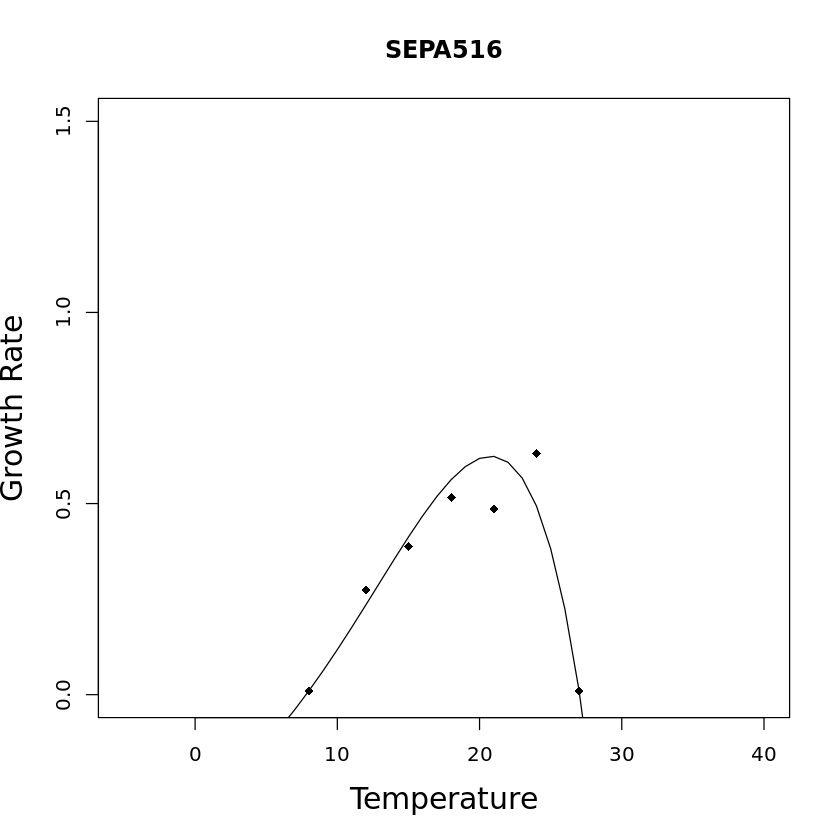

 [1] -2.760127e-01 -2.627812e-01 -2.466802e-01 -2.275028e-01 -2.050510e-01
 [6] -1.791417e-01 -1.496136e-01 -1.163361e-01 -7.921941e-02 -3.822678e-02
[11]  6.610586e-03  5.517646e-02  1.072491e-01  1.624773e-01  2.203524e-01
[16]  2.801753e-01  3.410185e-01  4.016815e-01  4.606392e-01  5.159823e-01
[21]  5.653483e-01  6.058418e-01  6.339424e-01  6.453995e-01  6.351106e-01
[26]  5.969817e-01  5.237681e-01  4.068907e-01  2.362272e-01 -1.273204e-04
[31] -3.161337e-01 -7.281199e-01 -1.255137e+00 -1.919361e+00 -2.746557e+00
[36] -3.766600e+00 -5.014068e+00 -6.528921e+00 -8.357262e+00 -1.055221e+01
[41] -1.317489e+01 -1.629552e+01 -1.999471e+01 -2.436489e+01 -2.951187e+01
[46] -3.555675e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


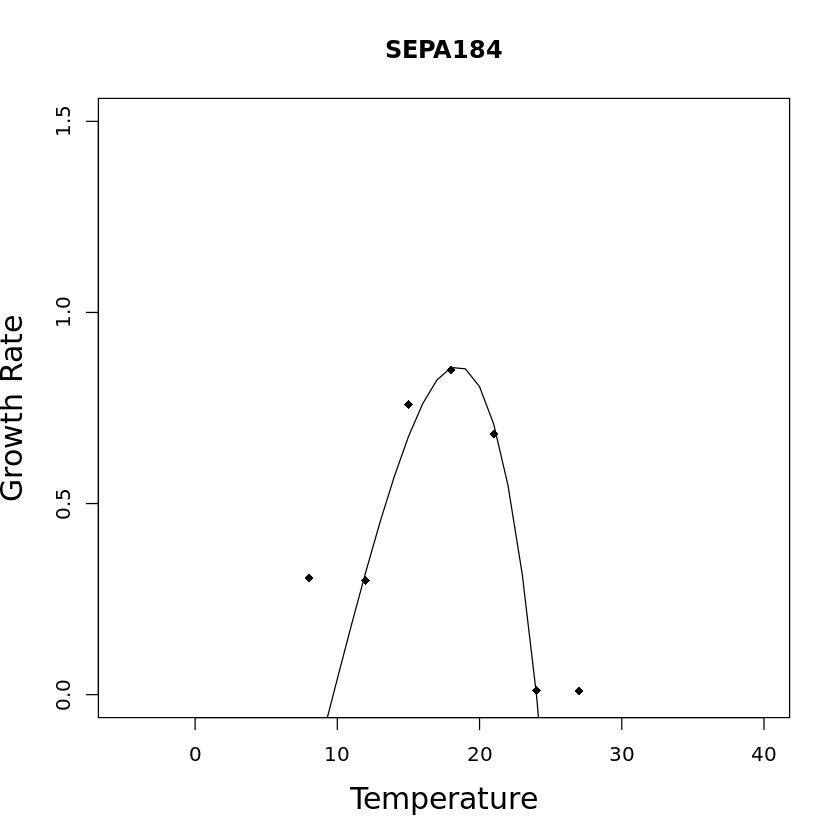

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 SEPA565 G. mue… II         Grow… Rate            8 deg        0.045
2          1 SEPA565 G. mue… II         Grow… Rate           12 deg        0.282
3          1 SEPA565 G. mue… II         Grow… Rate           15 deg        0.309
4          1 SEPA565 G. mue… II         Grow… Rate           18 deg        0.54 
5          1 SEPA565 G. mue… II         Grow… Rate           21 deg        0.281
6          1 SEPA565 G. mue… II         Grow… Rate           24 deg        0.01 
7          1 SEPA565 G. mue… II         Grow… Rate           27 deg        0.01 
[1] 0.1145598
[1] "^b"
 [1]  -0.217622766  -0.215486059  -0.211287496  -0.204759890  -0.195626069
 [6]  -0.183603366  -0.168409704  -0.149771642  -0.127434822  -0.101177332
[11]  -0.070826606  -0.036280585   0.002465992   0.045289150   0.091895888
[16] 

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.07317025
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


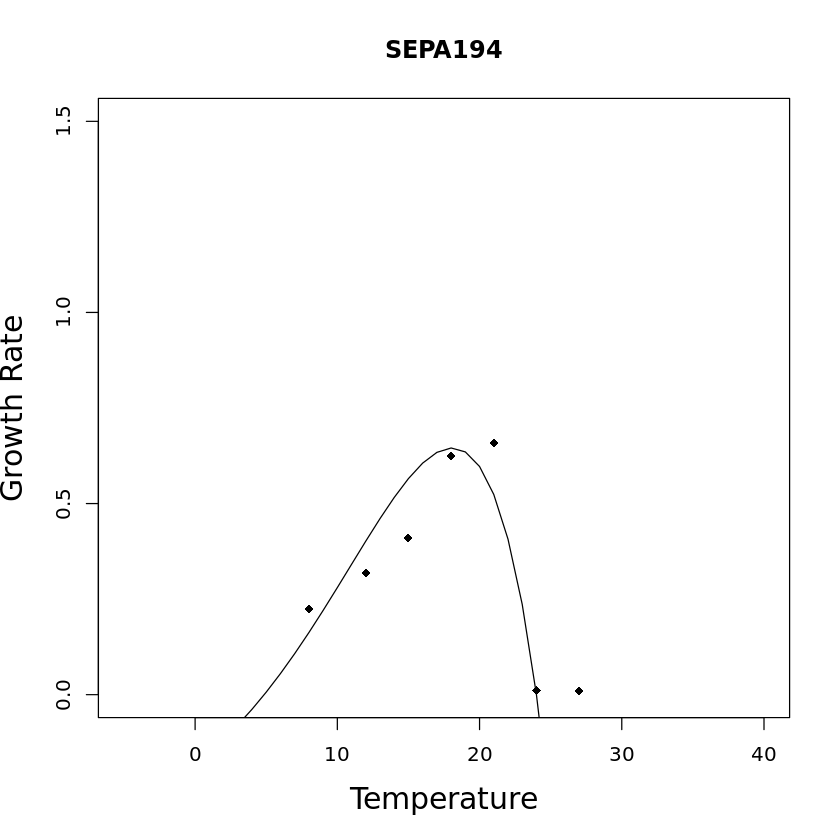

 [1] -4.933556e-01 -4.752114e-01 -4.541172e-01 -4.299308e-01 -4.025206e-01
 [6] -3.717691e-01 -3.375774e-01 -2.998698e-01 -2.585993e-01 -2.137541e-01
[11] -1.653647e-01 -1.135126e-01 -5.833920e-02 -5.683613e-05  6.103894e-02
[16]  1.245557e-01  1.899886e-01  2.567025e-01  3.239124e-01  3.906610e-01
[21]  4.557935e-01  5.179298e-01  5.754321e-01  6.263704e-01  6.684821e-01
[26]  6.991282e-01  7.152435e-01  7.132814e-01  6.891520e-01  6.381538e-01
[31]  5.548970e-01  4.332181e-01  2.660853e-01  4.549335e-02 -2.376535e-01
[36] -5.936715e-01 -1.034241e+00 -1.572567e+00 -2.223556e+00 -3.004011e+00
[41] -3.932850e+00 -5.031345e+00 -6.323391e+00 -7.835796e+00 -9.598607e+00
[46] -1.164547e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


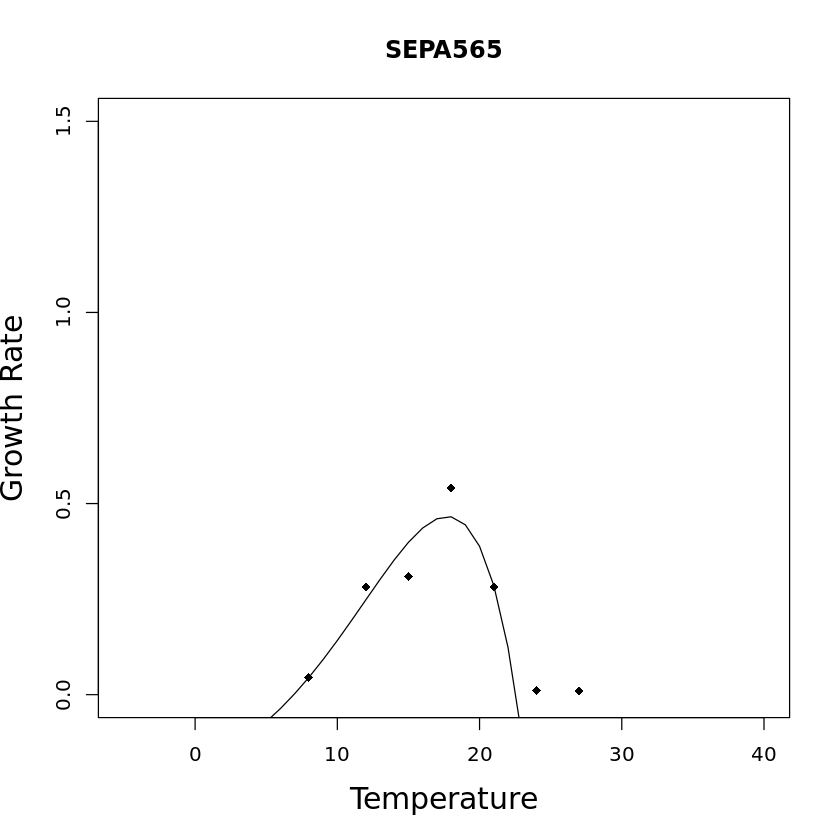

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 RCC1319 G. oce… III        Grow… Rate            8 deg        0.01 
2          1 RCC1319 G. oce… III        Grow… Rate           12 deg        0.381
3          1 RCC1319 G. oce… III        Grow… Rate           15 deg        0.34 
4          1 RCC1319 G. oce… III        Grow… Rate           18 deg        0.556
5          1 RCC1319 G. oce… III        Grow… Rate           21 deg        0.56 
6          1 RCC1319 G. oce… III        Grow… Rate           24 deg        0.721
7          1 RCC1319 G. oce… III        Grow… Rate           27 deg        0.01 
[1] 0.07492636
[1] "^b"
 [1] -5.199677e-01 -5.011683e-01 -4.791963e-01 -4.538976e-01 -4.251305e-01
 [6] -3.927708e-01 -3.567162e-01 -3.168919e-01 -2.732580e-01 -2.258165e-01
[11] -1.746203e-01 -1.197832e-01 -6.149162e-02 -1.727957e-05  6.426766e-02
[16]

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.03142251
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


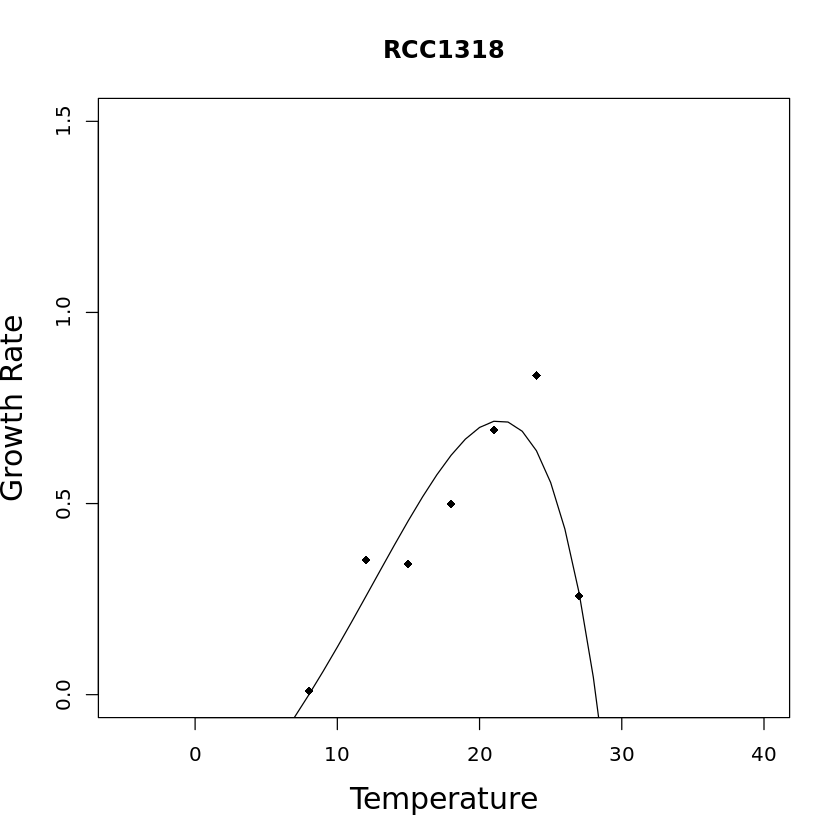

 [1] -2.43625500 -2.30701564 -2.17499994 -2.04041636 -1.90349759 -1.76450216
 [7] -1.62371612 -1.48145481 -1.33806472 -1.19392545 -1.04945177 -0.90509581
[13] -0.76134932 -0.61874609 -0.47786447 -0.33933000 -0.20381827 -0.07205778
[19]  0.05516697  0.17701218  0.29257144  0.40087210  0.50087154  0.59145325
[25]  0.67142270  0.73950301  0.79433040  0.83444943  0.85830802  0.86425221
[31]  0.85052063  0.81523881  0.75641308  0.67192431  0.55952124  0.41681355
[37]  0.24126461  0.03018386 -0.21928120 -0.51015328 -0.84563413 -1.22911363
[43] -1.66417938 -2.15462673 -2.70446928 -3.31794983
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


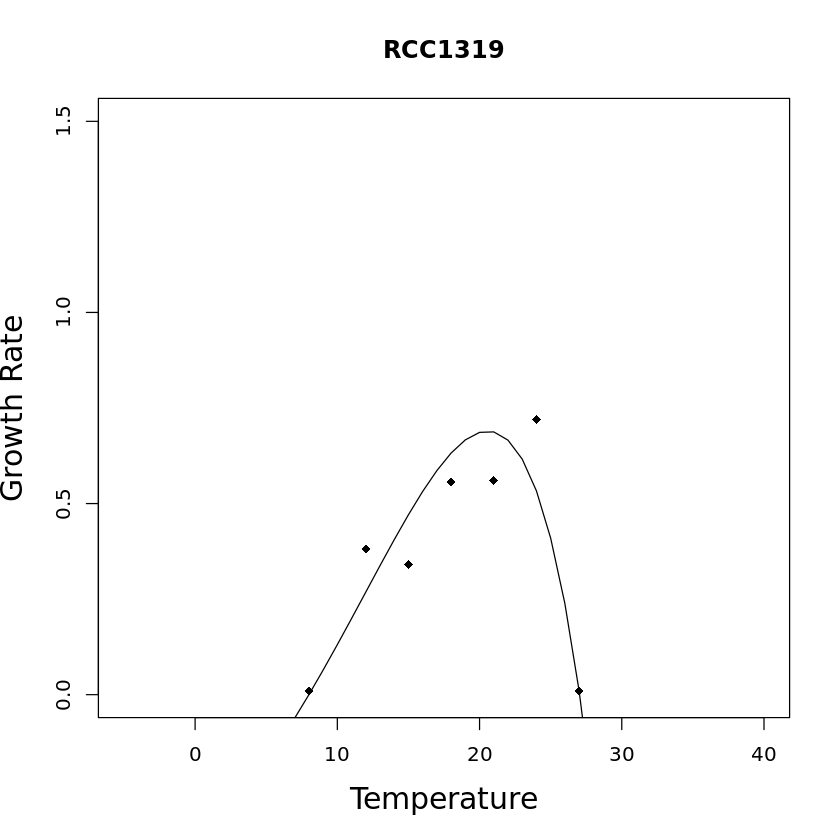

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 RCC1796 G. oce… III        Grow… Rate            8 deg        0.01 
2          1 RCC1796 G. oce… III        Grow… Rate           12 deg        0.075
3          1 RCC1796 G. oce… III        Grow… Rate           15 deg        0.125
4          1 RCC1796 G. oce… III        Grow… Rate           18 deg        0.427
5          1 RCC1796 G. oce… III        Grow… Rate           21 deg        0.924
6          1 RCC1796 G. oce… III        Grow… Rate           24 deg        0.882
7          1 RCC1796 G. oce… III        Grow… Rate           27 deg        0.73 
[1] 0.1009885
[1] "^b"
 [1]  -0.62166195  -0.63212745  -0.64016102  -0.64537881  -0.64736952
 [6]  -0.64569578  -0.63989638  -0.62948960  -0.61397788  -0.59285419
[11]  -0.56561030  -0.53174747  -0.49078994  -0.44230180  -0.38590791
[16]  -0.32131947  -

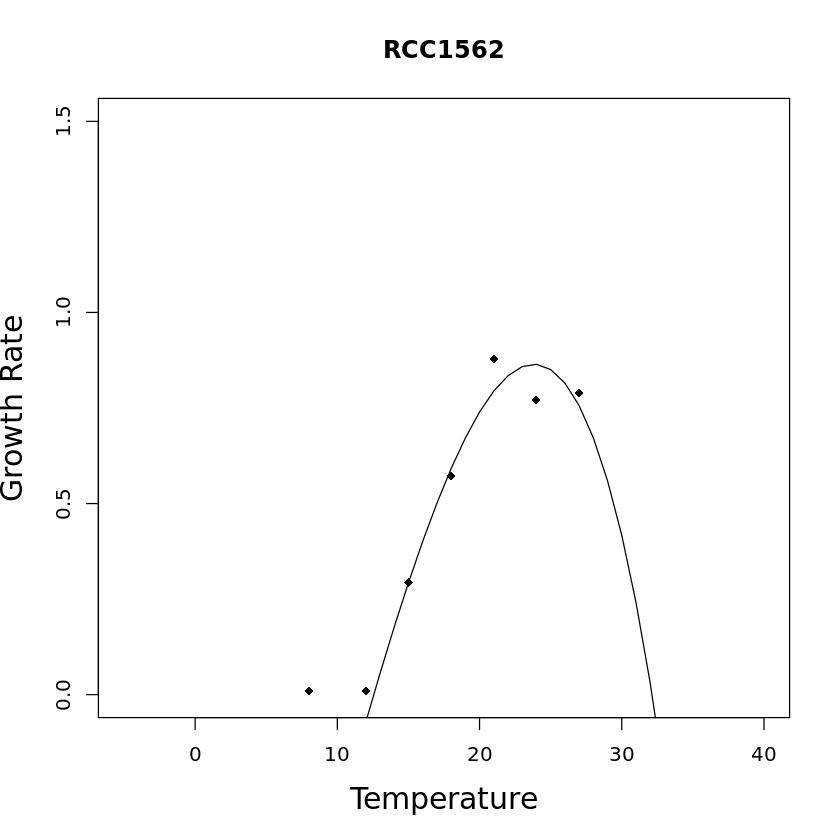

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 RCC1803 G. oce… n/a        Grow… Rate            8 deg        0.01 
2          1 RCC1803 G. oce… n/a        Grow… Rate           12 deg        0.01 
3          1 RCC1803 G. oce… n/a        Grow… Rate           15 deg        0.309
4          1 RCC1803 G. oce… n/a        Grow… Rate           18 deg        0.84 
5          1 RCC1803 G. oce… n/a        Grow… Rate           21 deg        0.757
6          1 RCC1803 G. oce… n/a        Grow… Rate           24 deg        0.815
7          1 RCC1803 G. oce… n/a        Grow… Rate           27 deg        0.294
[1] -0.00521792
[1] "^b"
 [1] -11.79942422 -10.77540259  -9.79925910  -8.87032777  -7.98794929
 [6]  -7.15147092  -6.36024647  -5.61363624  -4.91100693  -4.25173167
[11]  -3.63518984  -3.06076715  -2.52785547  -2.03585286  -1.58416348
[16]  -1.17219754 

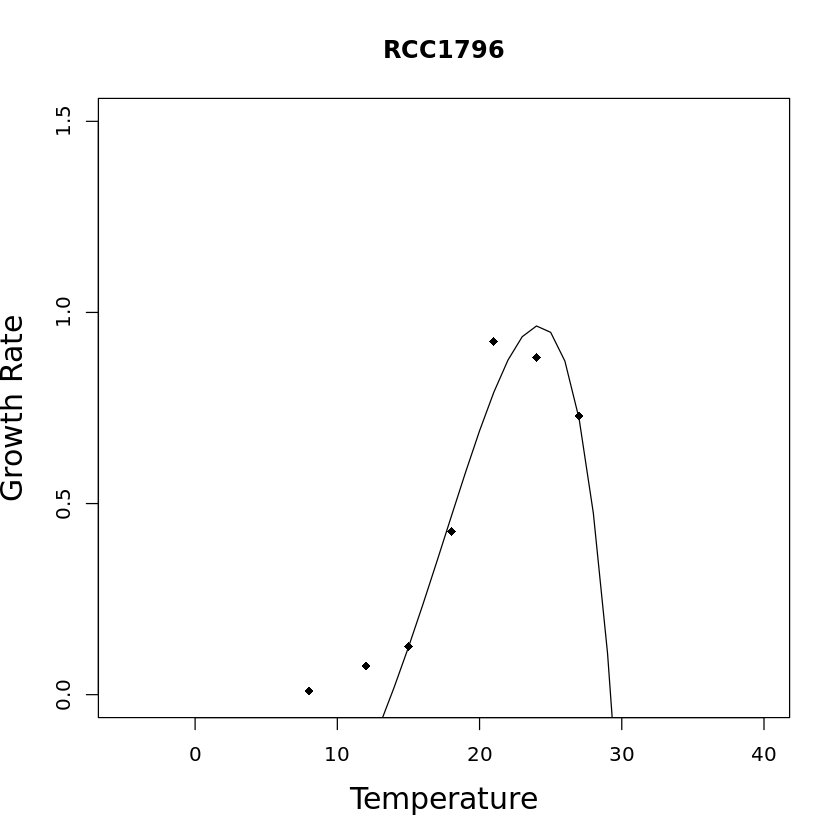

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          1 RCC3729 G. oce… n/a        Grow… Rate            8 deg        0.01 
2          1 RCC3729 G. oce… n/a        Grow… Rate           12 deg        0.01 
3          1 RCC3729 G. oce… n/a        Grow… Rate           15 deg        0.084
4          1 RCC3729 G. oce… n/a        Grow… Rate           18 deg        0.388
5          1 RCC3729 G. oce… n/a        Grow… Rate           21 deg        1.03 
6          1 RCC3729 G. oce… n/a        Grow… Rate           24 deg        0.982
7          1 RCC3729 G. oce… n/a        Grow… Rate           27 deg        0.794
[1] 0.1365272
[1] "^b"
 [1]  -0.29303361  -0.30889202  -0.32431413  -0.33900771  -0.35262993
 [6]  -0.36478254  -0.37500733  -0.38278198  -0.38751672  -0.38855231
[11]  -0.38515965  -0.37654201  -0.36184049  -0.34014414  -0.31050576
[16]  -0.27196556  -

Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”


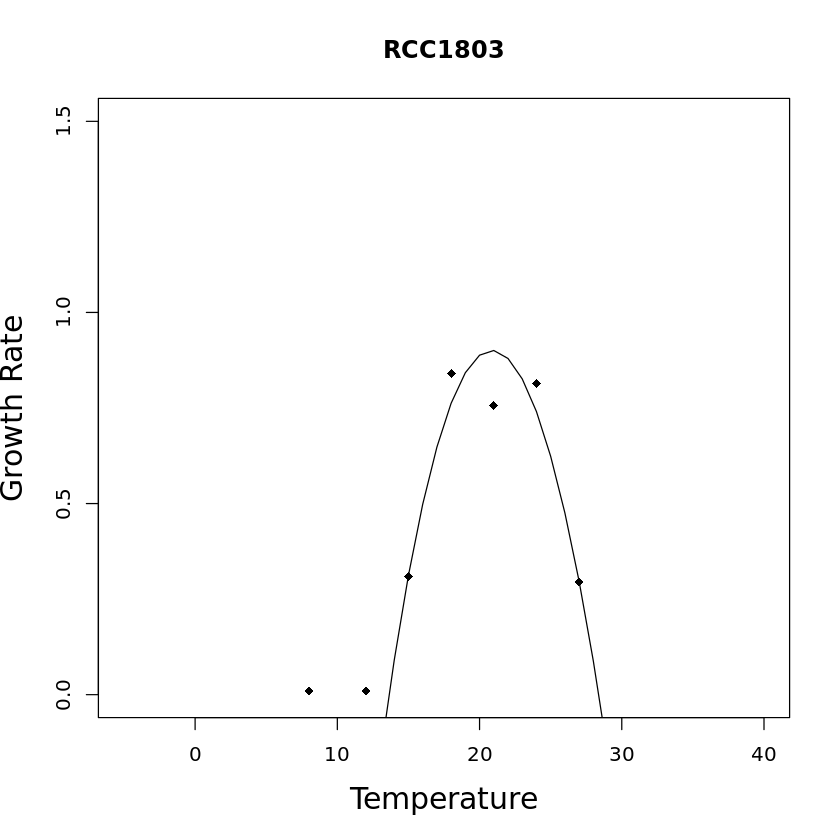

[1] 0.1273784
[1] "^b"
 [1]  -0.069795121  -0.066937487  -0.062718944  -0.056918048  -0.049291289
 [6]  -0.039572942  -0.027475532  -0.012691105   0.005106451   0.026257716
[11]   0.051112319   0.080021325   0.113326865   0.151348353   0.194364441
[16]   0.242589753   0.296145182   0.355020329   0.419026369   0.487737266
[21]   0.560416893   0.635929109   0.712627283   0.788219102   0.859601690
[26]   0.922661155   0.972029570   1.000791108   1.000127531   0.958891438
[31]   0.863093579   0.695288077   0.433836484   0.052028213  -0.482969114
[36]  -1.211360531  -2.182212409  -3.455221981  -5.102818209  -7.212653298
[41]  -9.890554393 -13.264016984 -17.486335529 -22.741483161 -29.249871382
[46] -37.275142911
[1] "^y"
# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA552 E. hux… I          Grow… Rate            8 deg        0.139
2          2 

Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1150004
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


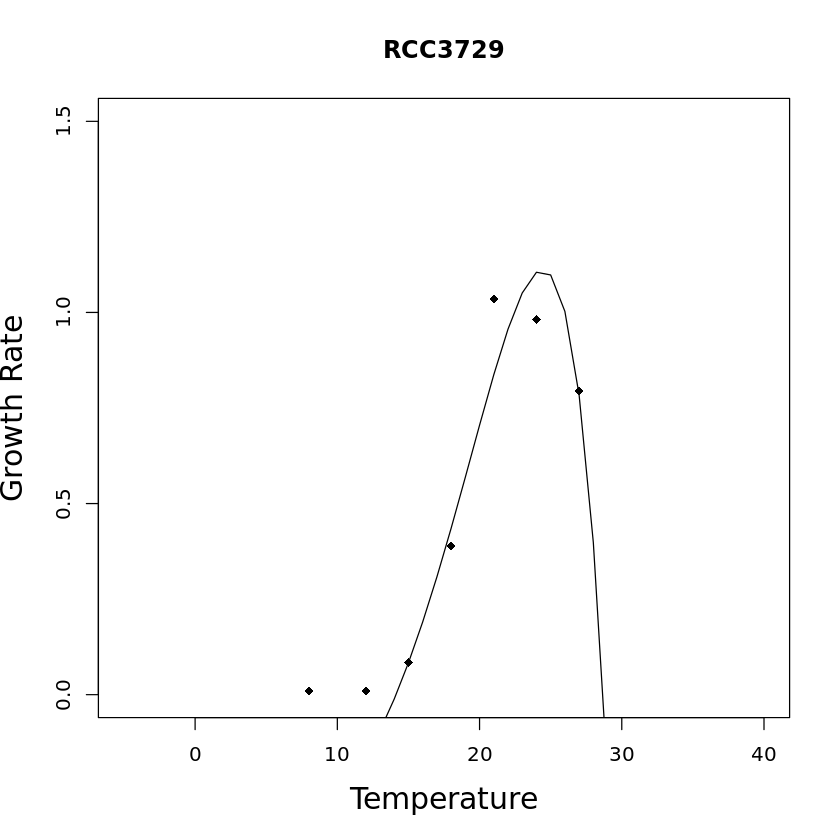

 [1] -1.144388e-01 -1.106531e-01 -1.052106e-01 -9.788165e-02 -8.841919e-02
 [6] -7.656022e-02 -6.202736e-02 -4.453148e-02 -2.377539e-02  5.410106e-04
[11]  2.871395e-02  6.102689e-02  9.773911e-02  1.390712e-01  1.851869e-01
[16]  2.361703e-01  2.919981e-01  3.525049e-01  4.173412e-01  4.859224e-01
[21]  5.573669e-01  6.304210e-01  7.033693e-01  7.739268e-01  8.391099e-01
[26]  8.950830e-01  9.369751e-01  9.586627e-01  9.525122e-01  9.090752e-01
[31]  8.167284e-01  6.612490e-01  4.253150e-01  8.791705e-02 -3.763321e-01
[36] -9.980077e-01 -1.813822e+00 -2.867737e+00 -4.212260e+00 -5.909966e+00
[41] -8.035265e+00 -1.067647e+01 -1.393821e+01 -1.794420e+01 -2.284057e+01
[46] -2.879956e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA559 E. hux… I          Grow… Rate            8 deg        0.144
2          2 SEPA559 E. hux… I          Grow… Rate           12 deg        0.359
3          2 SEPA559 E. hux… I          Grow… Rate           15 deg        0.611
4          2 SEPA559 E. hux… I          Grow… Rate           18 deg        0.647
5          2 SEPA559 E. hux… I          Grow… Rate           21 deg        1.03 
6          2 SEPA559 E. hux… I          Grow… Rate           24 deg        1.12 
7          2 SEPA559 E. hux… I          Grow… Rate           27 deg        0.355


Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1490045
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


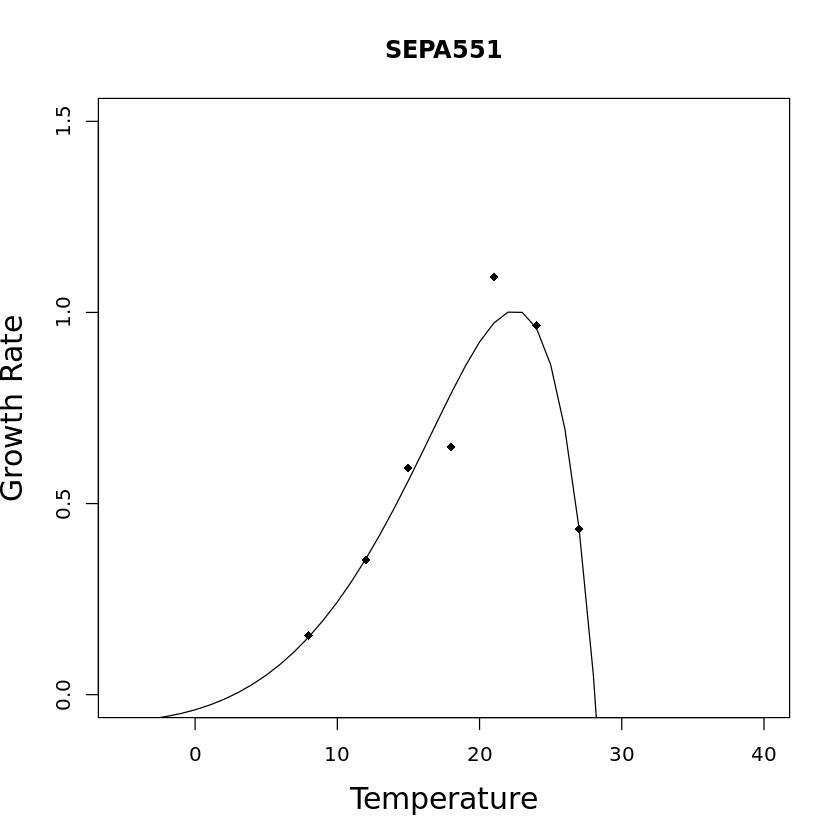

 [1]  -0.033574945  -0.031840480  -0.029116242  -0.025198746  -0.019855882
 [6]  -0.012824777  -0.003809989   0.007517741   0.021521911   0.038599494
[11]   0.059178510   0.083713349   0.112677081   0.146549796   0.185801747
[16]   0.230869807   0.282125318   0.339830973   0.404083821   0.474740734
[21]   0.551321874   0.632886636   0.717875274   0.803907874   0.887530493
[26]   0.963895969   1.026364188   1.066003246   1.070968919   1.025734968
[31]   0.910140943   0.698217044   0.356737042  -0.156560014  -0.895151006
[36]  -1.926399433  -3.334820080  -5.226063643  -7.731773136 -11.015494798
[41] -15.279863382 -20.775326102 -27.810722773 -36.766103332 -48.108240144
[46] -62.409383522
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


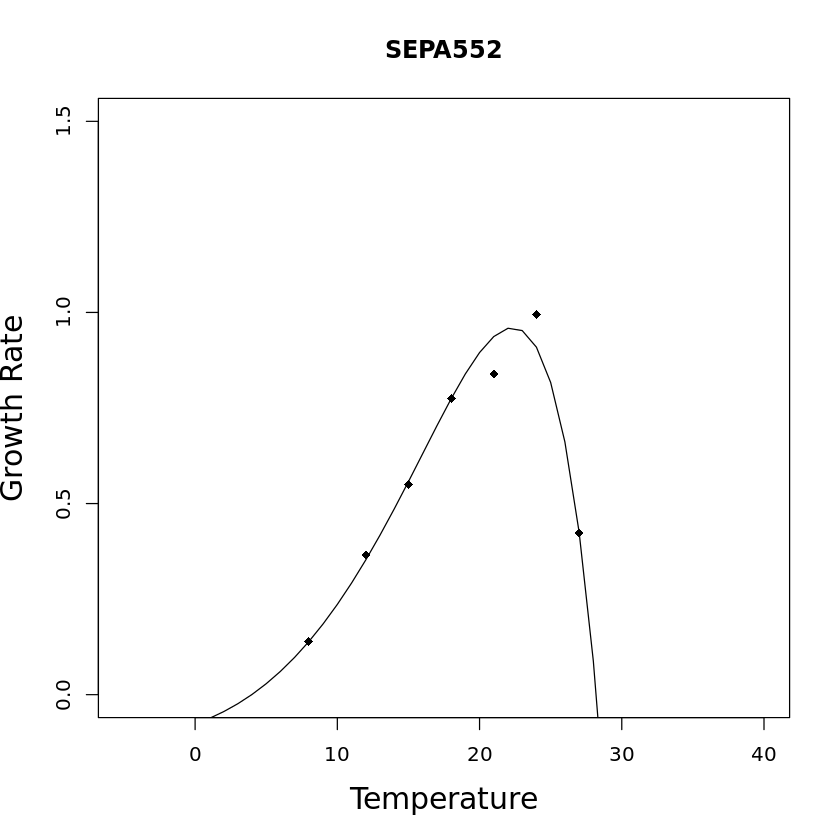

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA561 E. hux… I          Grow… Rate            8 deg        0.167
2          2 SEPA561 E. hux… I          Grow… Rate           12 deg        0.32 
3          2 SEPA561 E. hux… I          Grow… Rate           15 deg        0.349
4          2 SEPA561 E. hux… I          Grow… Rate           18 deg        0.424
5          2 SEPA561 E. hux… I          Grow… Rate           21 deg        0.786
6          2 SEPA561 E. hux… I          Grow… Rate           24 deg        0.988
7          2 SEPA561 E. hux… I          Grow… Rate           27 deg        0.01 
[1] 0.1015141
[1] "^b"
 [1] -1.959837e-01 -1.899595e-01 -1.818522e-01 -1.714392e-01 -1.584910e-01
 [6] -1.427733e-01 -1.240511e-01 -1.020927e-01 -7.667638e-02 -4.759696e-02
[11] -1.467529e-02  2.223078e-02  6.321284e-02  1.082955e-01  1.574168e-01
[16] 

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1824187
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


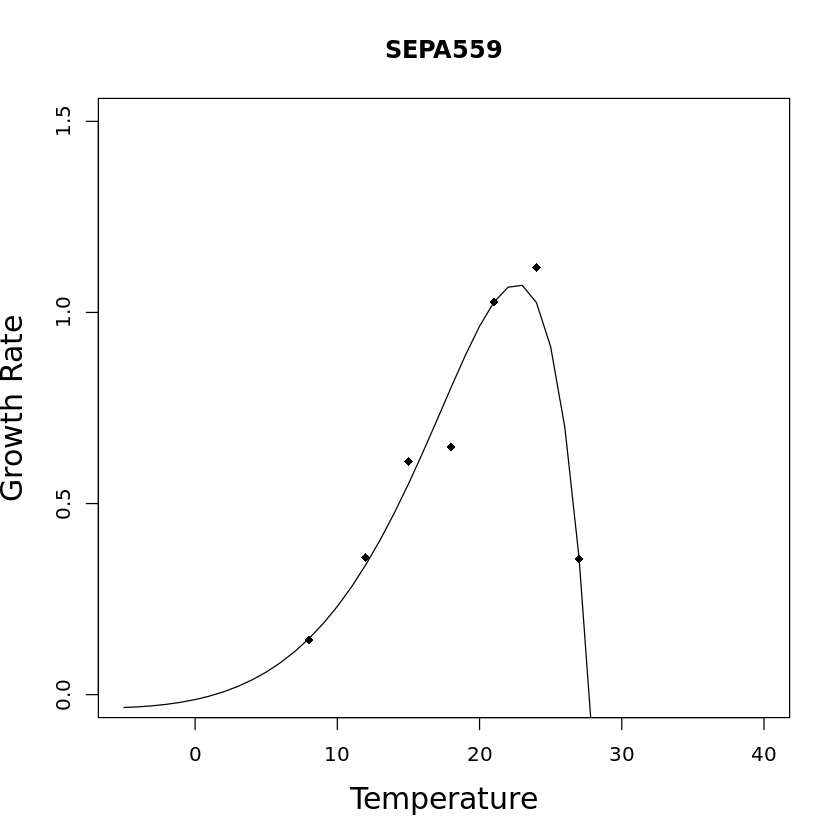

 [1] -5.056323e-02 -5.424676e-02 -5.773316e-02 -6.086676e-02 -6.345163e-02
 [6] -6.524454e-02 -6.594728e-02 -6.519848e-02 -6.256513e-02 -5.753431e-02
[11] -4.950558e-02 -3.778493e-02 -2.158159e-02 -9.211754e-06  2.790601e-02
[16]  6.320736e-02  1.069753e-01  1.602752e-01  2.240779e-01  2.991427e-01
[21]  3.858497e-01  4.839662e-01  5.923219e-01  7.083684e-01  8.275837e-01
[26]  9.426752e-01  1.042521e+00  1.110775e+00  1.124029e+00  1.049418e+00
[31]  8.415023e-01  4.382245e-01 -2.443123e-01 -1.318568e+00 -2.934198e+00
[36] -5.289114e+00 -8.643611e+00 -1.333838e+01 -1.981744e+01 -2.865722e+01
[41] -4.060349e+01 -5.661801e+01 -7.793762e+01 -1.061486e+02 -1.432807e+02
[46] -1.919248e+02
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA564 E. hux… I          Grow… Rate            8 deg        0.039
2          2 SEPA564 E. hux… I          Grow… Rate           12 deg        0.307
3          2 SEPA564 E. hux… I          Grow… Rate           15 deg        0.326
4          2 SEPA564 E. hux… I          Grow… Rate           18 deg        0.727
5          2 SEPA564 E. hux… I          Grow… Rate           21 deg        0.707
6          2 SEPA564 E. hux… I          Grow… Rate           24 deg        0.871
7          2 SEPA564 E. hux… I          Grow… Rate           27 deg        0.445


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.0353357
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


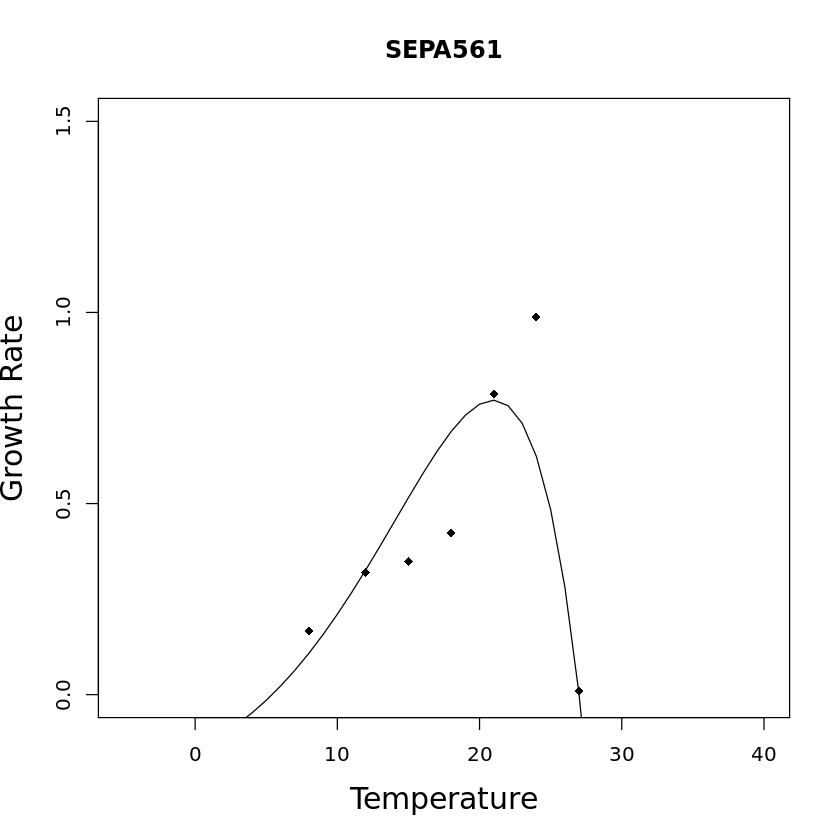

 [1] -2.999857948 -2.845778383 -2.687438602 -2.525116478 -2.359129231
 [6] -2.189836397 -2.017642981 -1.843002790 -1.666421981 -1.488462811
[11] -1.309747609 -1.130962988 -0.952864304 -0.776280369 -0.602118447
[16] -0.431369531 -0.265113929 -0.104527167  0.049113770  0.194423846
[21]  0.329903001  0.453928799  0.564748653  0.660471622  0.739059749
[26]  0.798318928  0.835889253  0.849234852  0.835633160  0.792163602
[31]  0.715695669  0.602876346  0.450116866  0.253578742  0.009159066
[36] -0.287524989 -0.641152485 -1.056715901 -1.539539226 -2.095297003
[41] -2.730034370 -3.450188162 -4.262609104 -5.174585164 -6.193866125
[46] -7.328689415
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA571 E. hux… I          Grow… Rate            8 deg        0.135
2          2 SEPA571 E. hux… I          Grow… Rate           12 deg        0.219
3          2 SEPA571 E. hux… I          Grow… Rate           15 deg        0.381
4          2 SEPA571 E. hux… I          Grow… Rate           18 deg        0.523
5          2 SEPA571 E. hux… I          Grow… Rate           21 deg        0.666
6          2 SEPA571 E. hux… I          Grow… Rate           24 deg        0.577
7          2 SEPA571 E. hux… I          Grow… Rate           27 deg        0.357


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.06790927
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


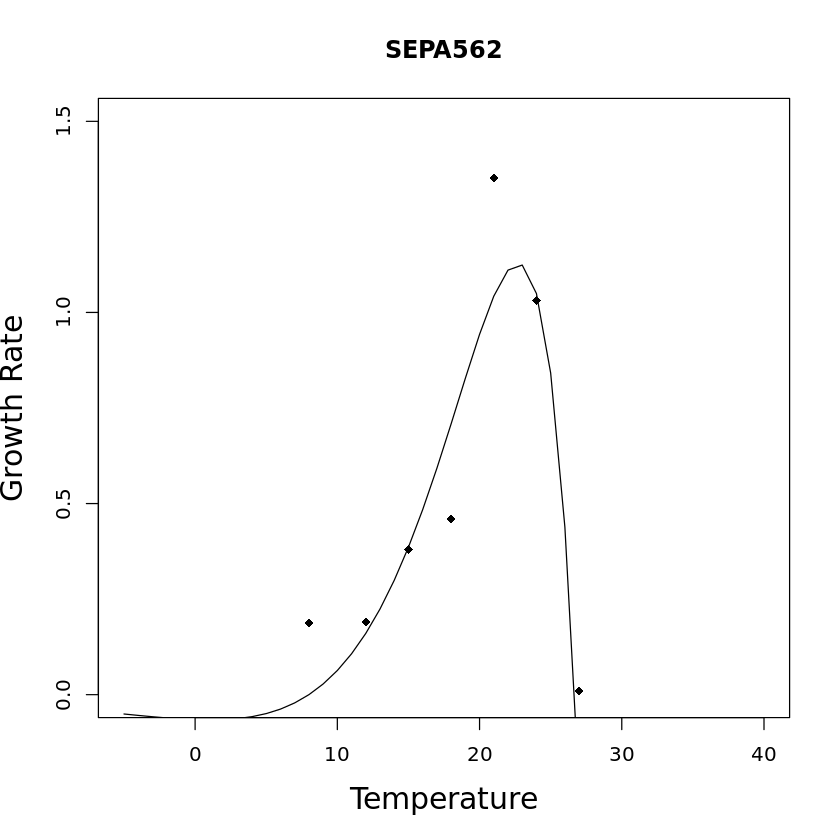

 [1] -0.456738355 -0.438252813 -0.417258067 -0.393657460 -0.367364710
 [6] -0.338306664 -0.306426439 -0.271687000 -0.234075226 -0.193606523
[11] -0.150330039 -0.104334552 -0.055755107 -0.004780475  0.048338460
[16]  0.103279303  0.159637616  0.216915152  0.274506691  0.331685371
[21]  0.387586323  0.441188460  0.491294209  0.536506989  0.575206206
[26]  0.605519497  0.625291970  0.632052119  0.622974088  0.594835929
[31]  0.543973446  0.466229199  0.356896192  0.210655718  0.021508810
[36] -0.217299338 -0.513362648 -0.875205877 -1.312385585 -1.835601228
[41] -2.456817356 -3.189397944 -4.048254019 -5.050005835 -6.213160940
[46] -7.558309655
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA590 E. hux… I          Grow… Rate            8 deg        0.145
2          2 SEPA590 E. hux… I          Grow… Rate           12 deg        0.288
3          2 SEPA590 E. hux… I          Grow… Rate           15 deg        0.549
4          2 SEPA590 E. hux… I          Grow… Rate           18 deg        1.05 
5          2 SEPA590 E. hux… I          Grow… Rate           21 deg        1.09 
6          2 SEPA590 E. hux… I          Grow… Rate           24 deg        1.12 
7          2 SEPA590 E. hux… I          Grow… Rate           27 deg        0.419


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.04318928
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


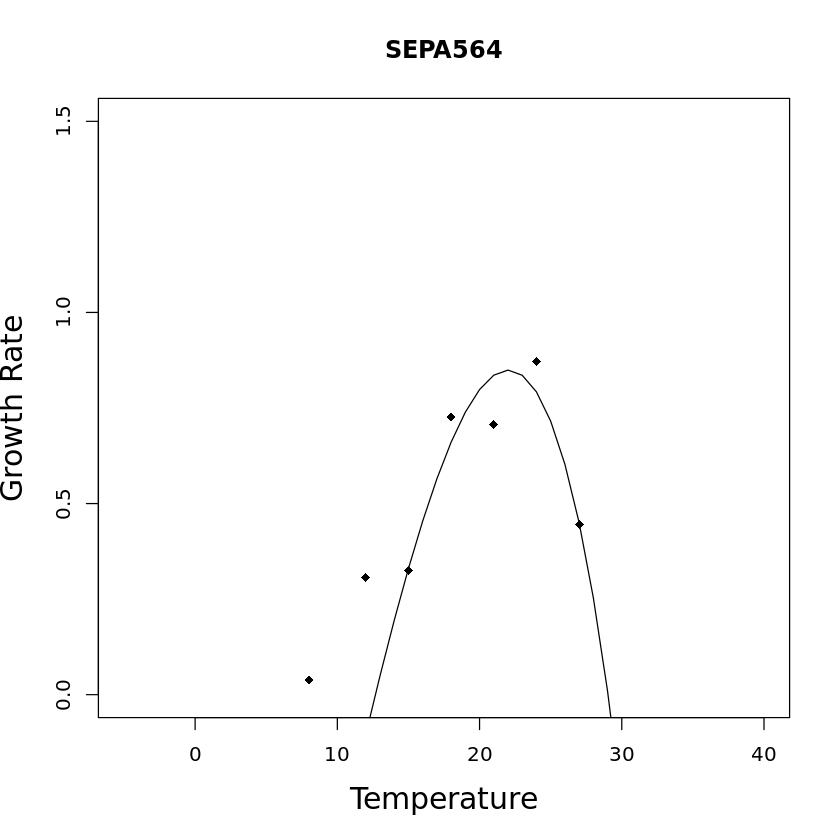

 [1]  -3.52680489  -3.36325569  -3.19191845  -3.01302094  -2.82685256
 [6]  -2.63377046  -2.43420620  -2.22867286  -2.01777276  -1.80220569
[11]  -1.58277777  -1.36041101  -1.13615355  -0.91119058  -0.68685618
[16]  -0.46464589  -0.24623027  -0.03346938   0.17157173   0.36660641
[21]   0.54910863   0.71629402   0.86509954   0.99216177   1.09379375
[26]   1.16596019   1.20425104   1.20385326   1.15952070   1.06554197
[31]   0.91570616   0.70326630   0.42090044   0.06067011  -0.38602390
[36]  -0.92848863  -1.57678914  -2.34180189  -3.23527161  -4.26987180
[41]  -5.45926911  -6.81819181  -8.36250262 -10.10927618 -12.07688139
[46] -14.28506890
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA547 E. hux… Ib         Grow… Rate            8 deg        0.085
2          2 SEPA547 E. hux… Ib         Grow… Rate           12 deg        0.221
3          2 SEPA547 E. hux… Ib         Grow… Rate           15 deg        0.3  
4          2 SEPA547 E. hux… Ib         Grow… Rate           18 deg        0.312
5          2 SEPA547 E. hux… Ib         Grow… Rate           21 deg        0.838
6          2 SEPA547 E. hux… Ib         Grow… Rate           24 deg        0.721
7          2 SEPA547 E. hux… Ib         Grow… Rate           27 deg        0.131


Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”


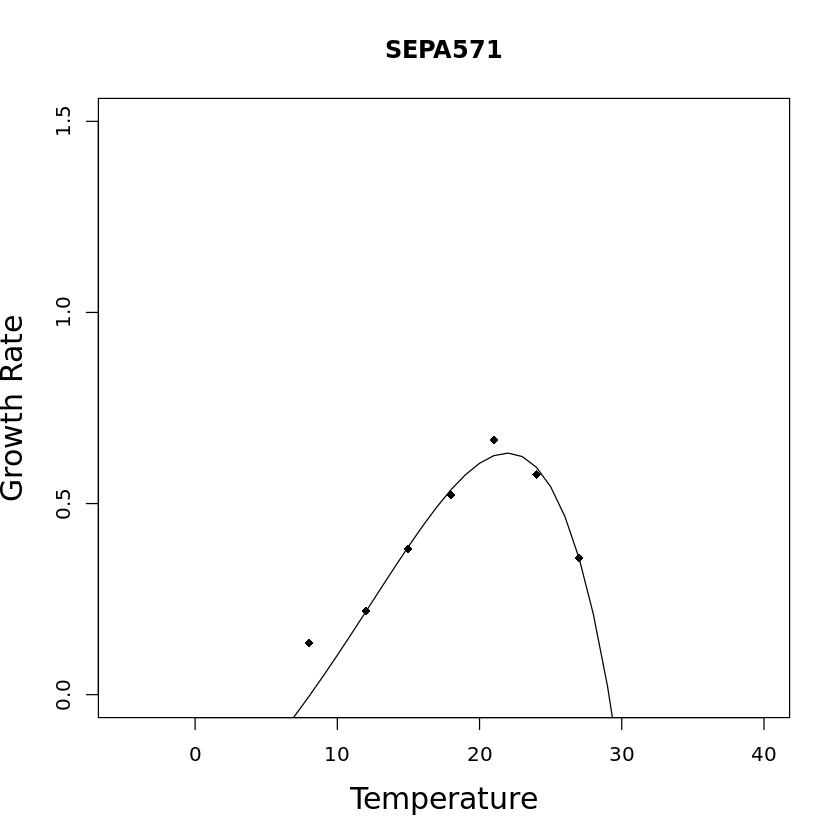

[1] 0.1750427
[1] "^b"
 [1]  -0.007177128  -0.006409212  -0.005227451  -0.003528887  -0.001191539
 [6]   0.001928117   0.005997734   0.011211658   0.017793318   0.025997226
[11]   0.036110306   0.048452118   0.063373454   0.081252537   0.102487860
[16]   0.127486349   0.156645161   0.190324903   0.228811395   0.272262285
[21]   0.320633765   0.373581299   0.430326596   0.489480960   0.548812457
[26]   0.604941029   0.652941493   0.685829125   0.693895985   0.663857999
[31]   0.577762625   0.411594276   0.133498943  -0.298470118  -0.939208007
[36]  -1.860167599  -3.153912501  -4.939849424  -7.371432905 -10.645205798
[41] -15.012126034 -20.791737554 -28.389875821 -38.320761549 -51.234537376
[46] -67.951549681
[1] "^y"
# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA555 E. hux… Ib         Grow… Rate            8 deg        0.076
2          2 

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1185593
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


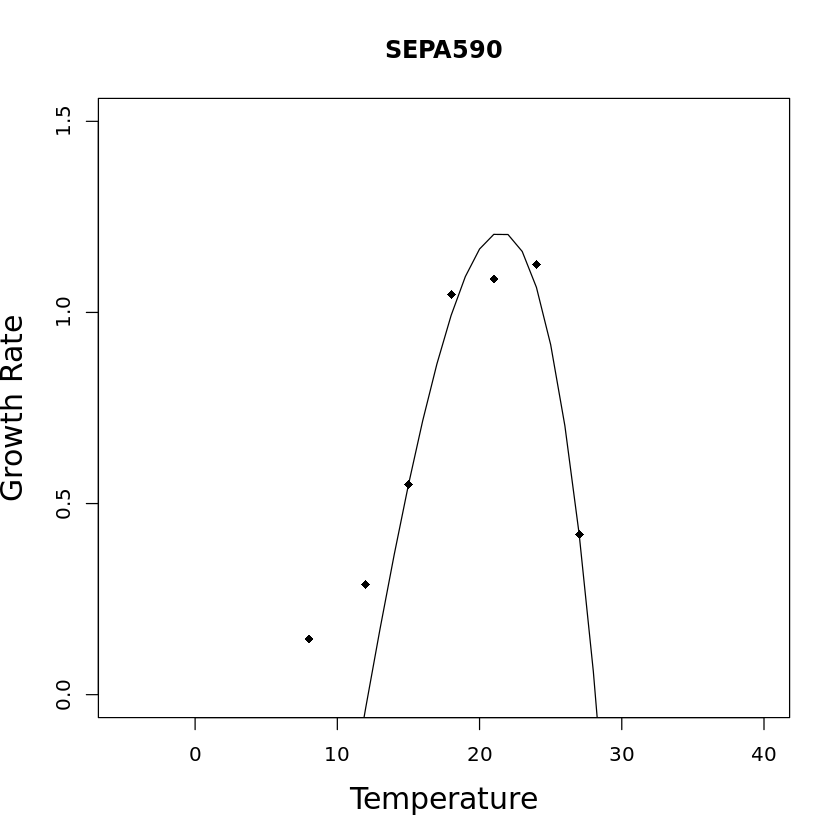

 [1] -1.868018e-01 -1.880569e-01 -1.878092e-01 -1.858043e-01 -1.817653e-01
 [6] -1.753939e-01 -1.663720e-01 -1.543641e-01 -1.390211e-01 -1.199862e-01
[11] -9.690261e-02 -6.942329e-02 -3.722489e-02 -2.481397e-05  4.239675e-02
[16]  9.016908e-02  1.432963e-01  2.016144e-01  2.647380e-01  3.319956e-01
[21]  4.023499e-01  4.743015e-01  5.457715e-01  6.139603e-01  6.751778e-01
[26]  7.246388e-01  7.562182e-01  7.621593e-01  7.327247e-01  6.557815e-01
[31]  5.163085e-01  2.958119e-01 -2.836720e-02 -4.838710e-01 -1.104291e+00
[36] -1.930310e+00 -3.011039e+00 -4.405602e+00 -6.184991e+00 -8.434241e+00
[41] -1.125499e+01 -1.476847e+01 -1.911901e+01 -2.447814e+01 -3.104941e+01
[46] -3.907392e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


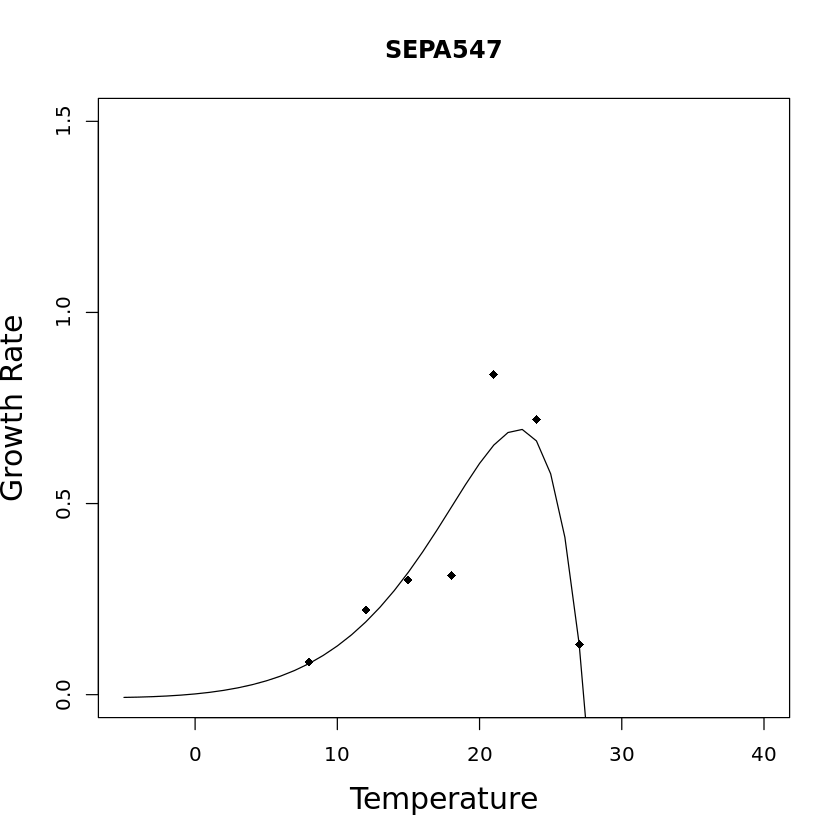

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA563 E. hux… Ib         Grow… Rate            8 deg        0.177
2          2 SEPA563 E. hux… Ib         Grow… Rate           12 deg        0.412
3          2 SEPA563 E. hux… Ib         Grow… Rate           15 deg        0.479
4          2 SEPA563 E. hux… Ib         Grow… Rate           18 deg        0.518
5          2 SEPA563 E. hux… Ib         Grow… Rate           21 deg        0.675
6          2 SEPA563 E. hux… Ib         Grow… Rate           24 deg        0.58 
7          2 SEPA563 E. hux… Ib         Grow… Rate           27 deg        0.01 
[1] 0.09400267
[1] "^b"
 [1]  -0.133295224  -0.123794222  -0.112404427  -0.098971871  -0.083343008
 [6]  -0.065367518  -0.044901784  -0.021813143   0.004014928   0.032676560
[11]   0.064235991   0.098718598   0.136100258   0.176294736   0.219138828
[16]

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.08716399
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


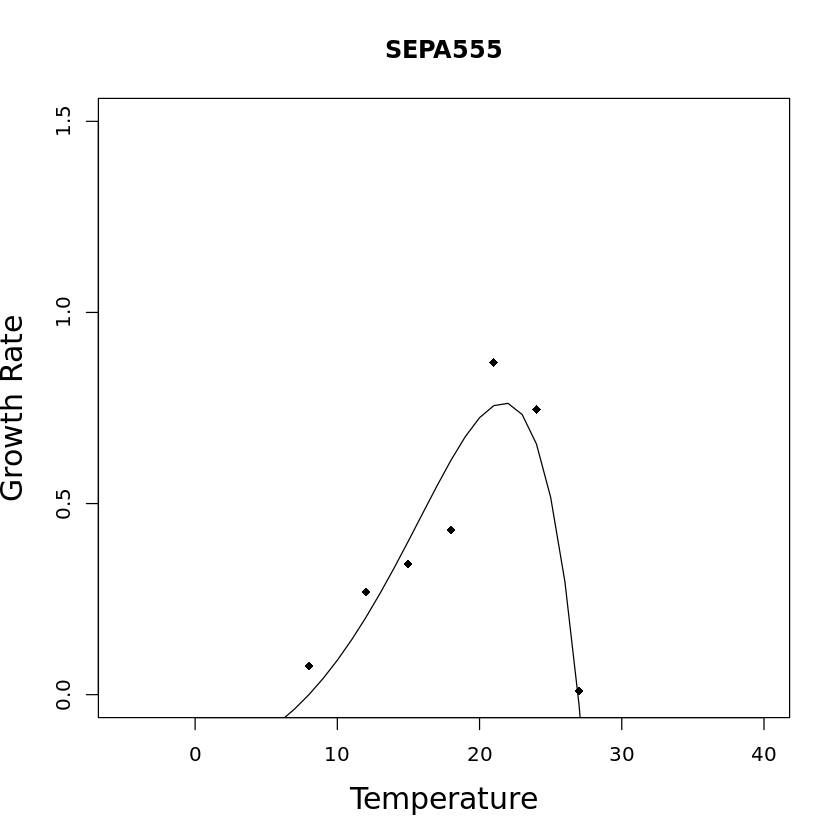

 [1] -4.670716e-01 -4.593181e-01 -4.486971e-01 -4.349712e-01 -4.179031e-01
 [6] -3.972602e-01 -3.728193e-01 -3.443718e-01 -3.117314e-01 -2.747422e-01
[11] -2.332881e-01 -1.873052e-01 -1.367953e-01 -8.184204e-02 -2.262963e-02
[16]  4.053477e-02  1.071957e-01  1.767195e-01  2.482603e-01  3.207200e-01
[21]  3.927031e-01  4.624638e-01  5.278458e-01  5.862135e-01  6.343729e-01
[26]  6.684809e-01  6.839429e-01  6.752948e-01  6.360692e-01  5.586435e-01
[31]  4.340667e-01  2.518630e-01 -1.909079e-04 -3.363179e-01 -7.730265e-01
[36] -1.329434e+00 -2.027633e+00 -2.893102e+00 -3.955174e+00 -5.247562e+00
[41] -6.808951e+00 -8.683666e+00 -1.092243e+01 -1.358319e+01 -1.673212e+01
[46] -2.044463e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


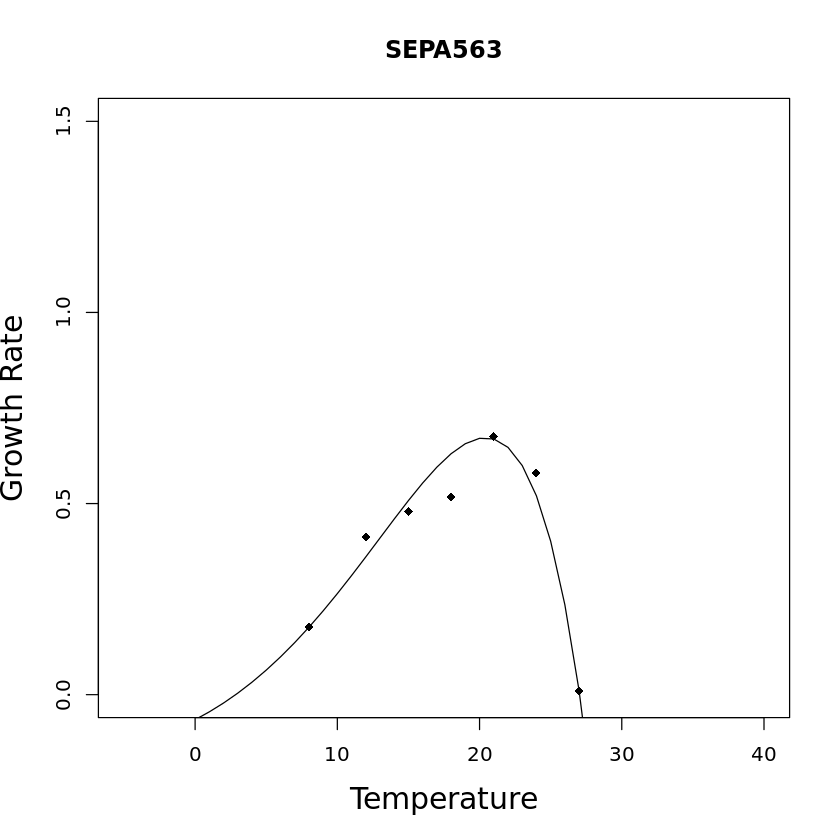

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA567 E. hux… Ib         Grow… Rate            8 deg        0.107
2          2 SEPA567 E. hux… Ib         Grow… Rate           12 deg        0.355
3          2 SEPA567 E. hux… Ib         Grow… Rate           15 deg        0.266
4          2 SEPA567 E. hux… Ib         Grow… Rate           18 deg        0.476
5          2 SEPA567 E. hux… Ib         Grow… Rate           21 deg        0.606
6          2 SEPA567 E. hux… Ib         Grow… Rate           24 deg        0.442
7          2 SEPA567 E. hux… Ib         Grow… Rate           27 deg        0.01 
[1] 0.08042971
[1] "^b"
 [1] -2.346513e-01 -2.225791e-01 -2.085014e-01 -1.923061e-01 -1.738882e-01
 [6] -1.531525e-01 -1.300172e-01 -1.044179e-01 -7.631234e-02 -4.568589e-02
[11] -1.255792e-02  2.301077e-02  6.090946e-02  1.009677e-01  1.429441e-01
[16]

Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”


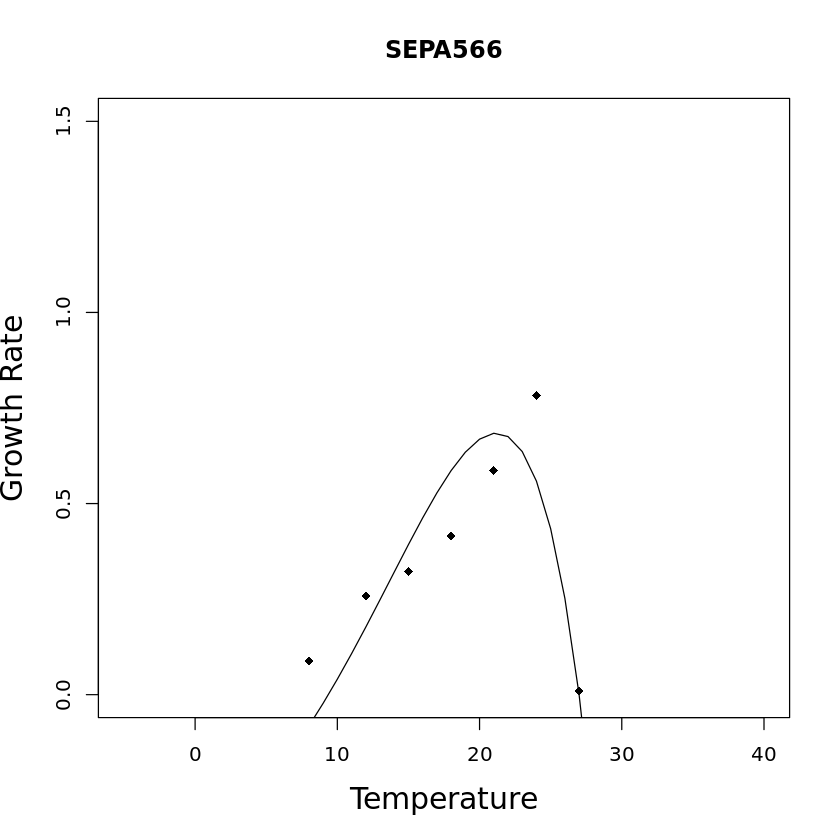

[1] 0.1346517
[1] "^b"
 [1]   0.004324043   0.007931791   0.012258376   0.017402722   0.023472529
 [6]   0.030584052   0.038861544   0.048436234   0.059444722   0.072026609
[11]   0.086321174   0.102462817   0.120574989   0.140762204   0.163099687
[16]   0.187620103   0.214296668   0.243021854   0.273580676   0.305617390
[21]   0.338594151   0.371739946   0.403987707   0.433897167   0.459560498
[26]   0.478487207   0.487464095   0.482385251   0.458046139   0.407894641
[31]   0.323730645   0.195344124   0.010079816  -0.247685621  -0.597170706
[36]  -1.061940308  -1.670804335  -2.458891696  -3.468932309  -4.752785892
[41]  -6.373263279  -8.406294218 -10.943505295 -14.095283018 -17.994410461
[46] -22.800381563
[1] "^y"
# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA569 E. hux… Ib         Grow… Rate            8 deg        0.115
2          2 

Warning message in mle2(minuslogl = LL1, start = list(a = a, b = b, o = o_guess, :
“convergence failure: code=1 (iteration limit 'maxit' reached)”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.142021
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


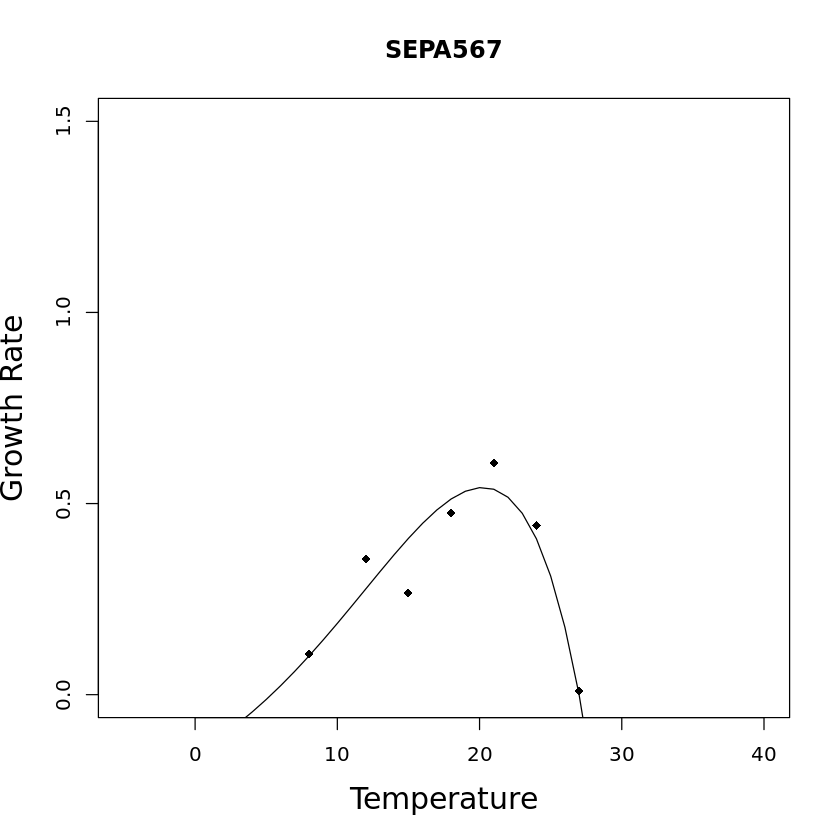

 [1] -1.175797e-02 -9.798216e-03 -7.212213e-03 -3.891962e-03  2.831997e-04
 [6]  5.447065e-03  1.174675e-02  1.934250e-02  2.840691e-02  3.912341e-02
[11]  5.168385e-02  6.628465e-02  8.312143e-02  1.023815e-01  1.242335e-01
[16]  1.488140e-01  1.762091e-01  2.064319e-01  2.393917e-01  2.748562e-01
[21]  3.124033e-01  3.513595e-01  3.907233e-01  4.290701e-01  4.644329e-01
[26]  4.941552e-01  5.147089e-01  5.214708e-01  5.084469e-01  4.679360e-01
[31]  3.901174e-01  2.625486e-01  6.955301e-02 -2.085233e-01 -5.962148e-01
[36] -1.124030e+00 -1.829773e+00 -2.760146e+00 -3.972676e+00 -5.538040e+00
[41] -7.542865e+00 -1.009310e+01 -1.331805e+01 -1.737525e+01 -2.245627e+01
[46] -2.879371e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


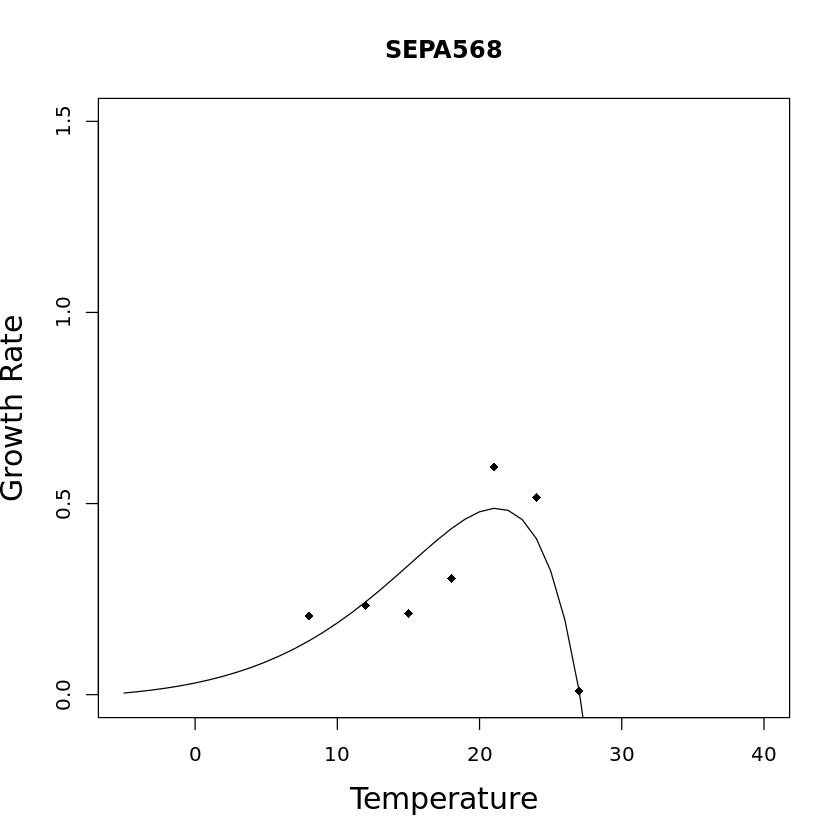

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA570 E. hux… Ib         Grow… Rate            8 deg        0.158
2          2 SEPA570 E. hux… Ib         Grow… Rate           12 deg        0.346
3          2 SEPA570 E. hux… Ib         Grow… Rate           15 deg        0.242
4          2 SEPA570 E. hux… Ib         Grow… Rate           18 deg        0.353
5          2 SEPA570 E. hux… Ib         Grow… Rate           21 deg        0.701
6          2 SEPA570 E. hux… Ib         Grow… Rate           24 deg        0.605
7          2 SEPA570 E. hux… Ib         Grow… Rate           27 deg        0.023
[1] 0.1534092
[1] "^b"
 [1]   0.008795527   0.012014637   0.015903355   0.020569356   0.026133320
 [6]   0.032729576   0.040506484   0.049626419   0.060265224   0.072610891
[11]   0.086861225   0.103220148   0.121892204   0.143074730   0.166947023
[16] 

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.09425123
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


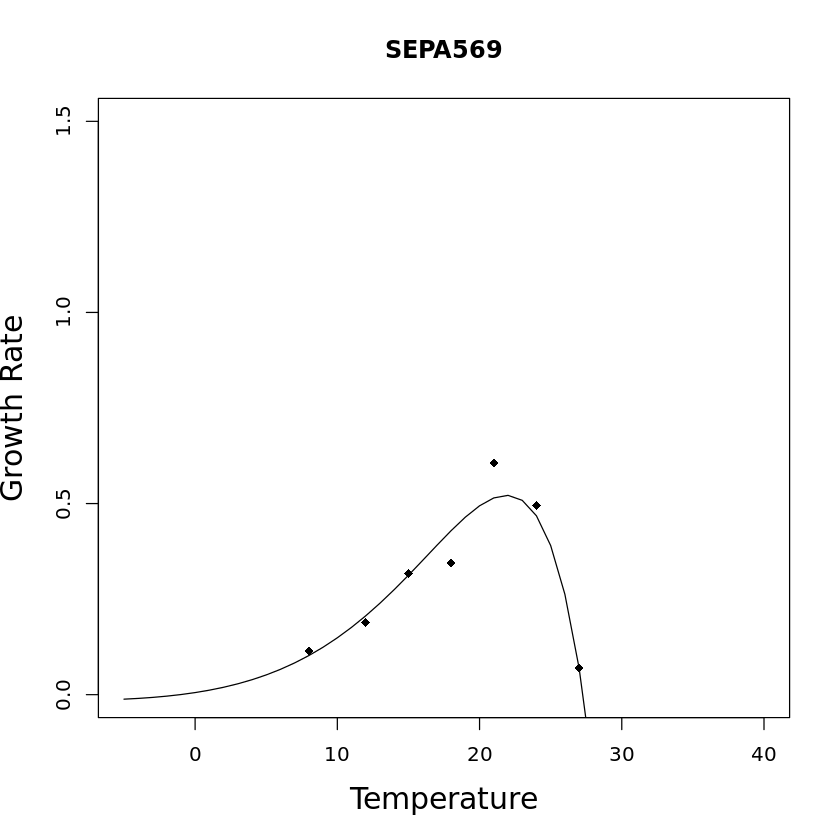

 [1] -6.781789e-01 -6.803036e-01 -6.791737e-01 -6.744168e-01 -6.656474e-01
 [6] -6.524708e-01 -6.344885e-01 -6.113042e-01 -5.825326e-01 -5.478089e-01
[11] -5.068017e-01 -4.592278e-01 -4.048709e-01 -3.436032e-01 -2.754119e-01
[16] -2.004306e-01 -1.189761e-01 -3.159220e-02  6.089853e-02  1.573346e-01
[21]  2.561449e-01  3.552660e-01  4.520464e-01  5.431344e-01  6.243492e-01
[26]  6.905301e-01  7.353640e-01  7.511846e-01  7.287420e-01  6.569374e-01
[31]  5.225174e-01  3.097240e-01 -1.076361e-04 -4.290095e-01 -1.002908e+00
[36] -1.752227e+00 -2.712574e+00 -3.925532e+00 -5.439549e+00 -7.310964e+00
[41] -9.605168e+00 -1.239793e+01 -1.577691e+01 -1.984334e+01 -2.471401e+01
[46] -3.052345e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


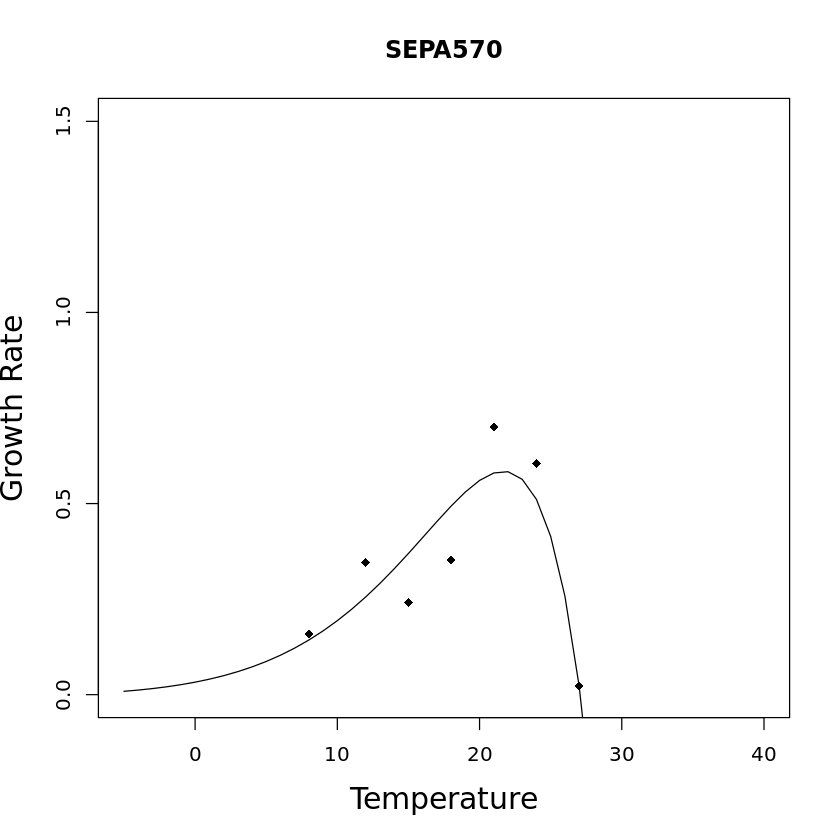

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA583 E. hux… Ib         Grow… Rate            8 deg        0.164
2          2 SEPA583 E. hux… Ib         Grow… Rate           12 deg        0.22 
3          2 SEPA583 E. hux… Ib         Grow… Rate           15 deg        0.307
4          2 SEPA583 E. hux… Ib         Grow… Rate           18 deg        0.312
5          2 SEPA583 E. hux… Ib         Grow… Rate           21 deg        0.777
6          2 SEPA583 E. hux… Ib         Grow… Rate           24 deg        0.648
7          2 SEPA583 E. hux… Ib         Grow… Rate           27 deg        0.01 
[1] 0.08978279
[1] "^b"
 [1] -2.040091e-01 -1.954127e-01 -1.848680e-01 -1.722227e-01 -1.573261e-01
 [6] -1.400315e-01 -1.202004e-01 -9.770620e-02 -7.243940e-02 -4.431379e-02
[11] -1.327358e-02  2.069799e-02  5.756856e-02  9.724480e-02  1.395585e-01
[16]

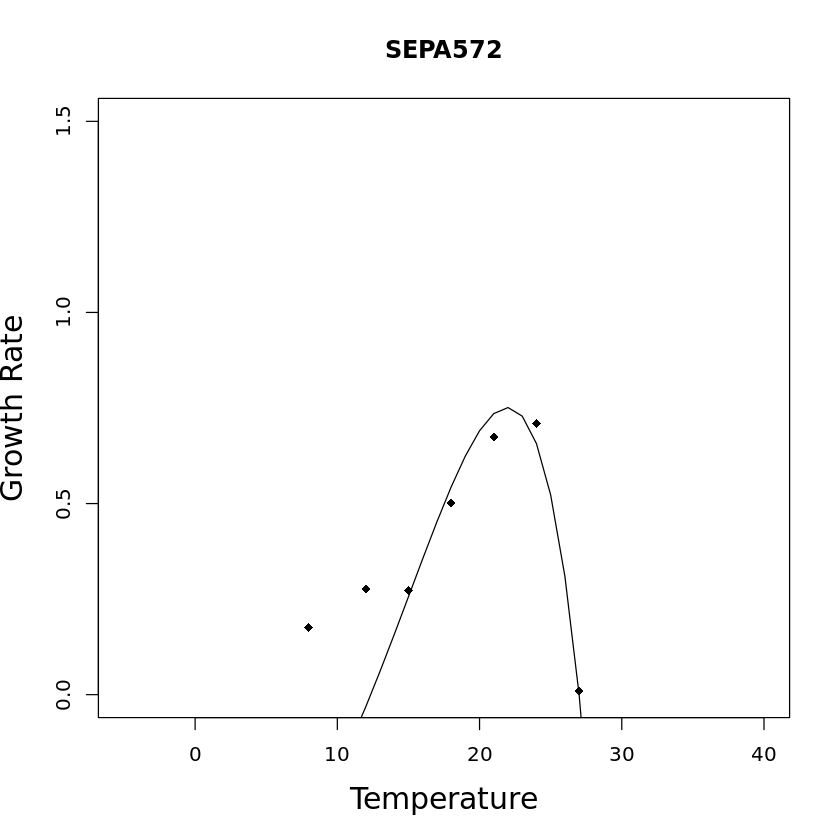

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA536 E. hux… II         Grow… Rate            8 deg        0.111
2          2 SEPA536 E. hux… II         Grow… Rate           12 deg        0.457
3          2 SEPA536 E. hux… II         Grow… Rate           15 deg        0.499
4          2 SEPA536 E. hux… II         Grow… Rate           18 deg        0.93 
5          2 SEPA536 E. hux… II         Grow… Rate           21 deg        1.09 
6          2 SEPA536 E. hux… II         Grow… Rate           24 deg        0.856
7          2 SEPA536 E. hux… II         Grow… Rate           27 deg        0.01 
[1] 0.1029037
[1] "^b"
 [1]  -0.27969946  -0.27330310  -0.26416600  -0.25197856  -0.23641891
 [6]  -0.21715642  -0.19385626  -0.16618543  -0.13382041  -0.09645685
[11]  -0.05382165  -0.00568786   0.04810708   0.10763905   0.17287042
[16]   0.24361762   

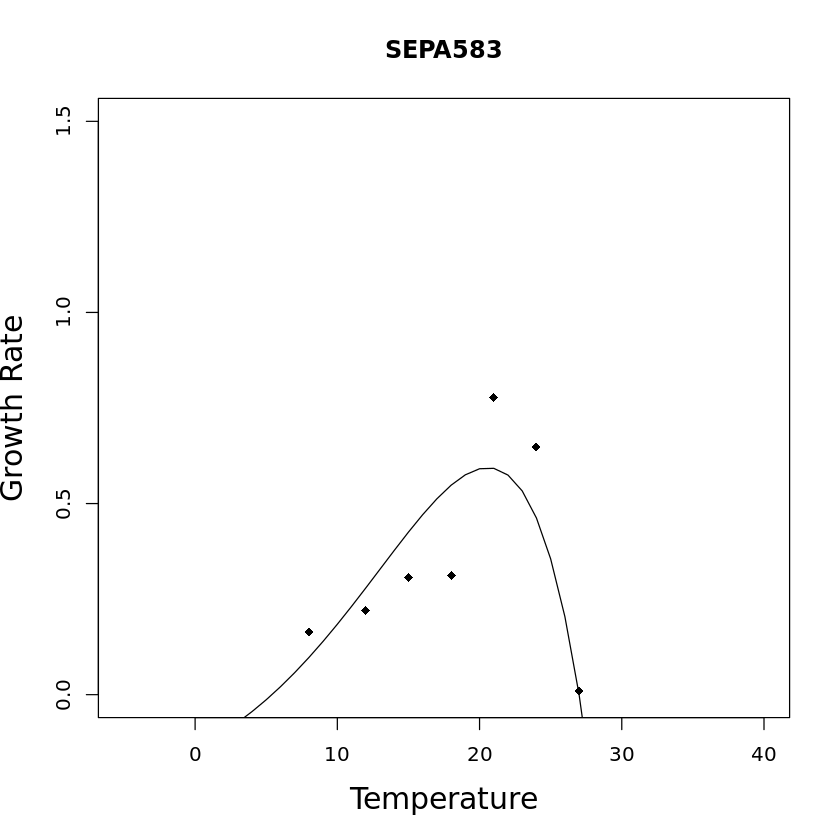

# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA539 E. hux… II         Grow… Rate            8 deg        0.072
2          2 SEPA539 E. hux… II         Grow… Rate           12 deg        0.273
3          2 SEPA539 E. hux… II         Grow… Rate           15 deg        0.292
4          2 SEPA539 E. hux… II         Grow… Rate           18 deg        0.459
5          2 SEPA539 E. hux… II         Grow… Rate           21 deg        0.57 
6          2 SEPA539 E. hux… II         Grow… Rate           24 deg        0.515
7          2 SEPA539 E. hux… II         Grow… Rate           27 deg        0.372
[1] 0.0633789
[1] "^b"
 [1] -0.287656730 -0.270822844 -0.252234392 -0.231843749 -0.209611763
 [6] -0.185509536 -0.159520432 -0.131642347 -0.101890242 -0.070298999
[11] -0.036926605 -0.001857718  0.034792363  0.072873263  0.112194606
[16]  0.152520537  0

Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


[1] 0.1134356
[1] "^b"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


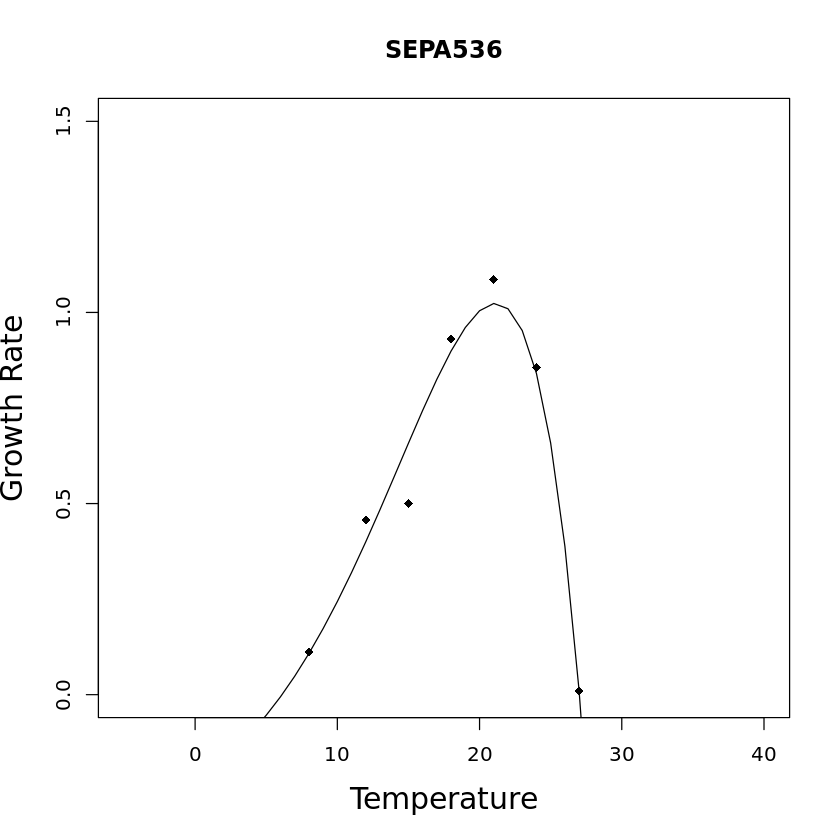

 [1] -1.349589e-01 -1.300312e-01 -1.231587e-01 -1.140876e-01 -1.025486e-01
 [6] -8.825841e-02 -7.092291e-02 -5.024094e-02 -2.590994e-02  2.366888e-03
[11]  3.487119e-02  7.185746e-02  1.135379e-01  1.600637e-01  2.115010e-01
[16]  2.678028e-01  3.287728e-01  3.940228e-01  4.629201e-01  5.345245e-01
[21]  6.075120e-01  6.800838e-01  7.498574e-01  8.137359e-01  8.677533e-01
[26]  9.068908e-01  9.248583e-01  9.138369e-01  8.641742e-01  7.640256e-01
[31]  5.989315e-01  3.513210e-01 -7.101454e-05 -4.808869e-01 -1.121946e+00
[36] -1.960182e+00 -3.039733e+00 -4.413219e+00 -6.143231e+00 -8.304061e+00
[41] -1.098372e+01 -1.428629e+01 -1.833464e+01 -2.327360e+01 -2.927363e+01
[46] -3.653509e+01
[1] "^y"


Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”
Warning message in sqrt(diag(object@vcov)):
“NaNs produced”


# A tibble: 7 × 9
  Experiment Strain  Species Haplogroup Sep1  Sep2  Temperature deg   GrowthRate
       <int> <chr>   <chr>   <chr>      <chr> <chr>       <dbl> <chr>      <dbl>
1          2 SEPA545 E. hux… II         Grow… Rate            8 deg        0.168
2          2 SEPA545 E. hux… II         Grow… Rate           12 deg        0.393
3          2 SEPA545 E. hux… II         Grow… Rate           15 deg        0.533
4          2 SEPA545 E. hux… II         Grow… Rate           18 deg        0.787
5          2 SEPA545 E. hux… II         Grow… Rate           21 deg        1.10 
6          2 SEPA545 E. hux… II         Grow… Rate           24 deg        0.636
7          2 SEPA545 E. hux… II         Grow… Rate           27 deg       NA    


ERROR: Error in optim(par = c(a = 0.01, b = 0.0633, w = 15, o = 21), fn = function (p) : initial value in 'vmmin' is not finite


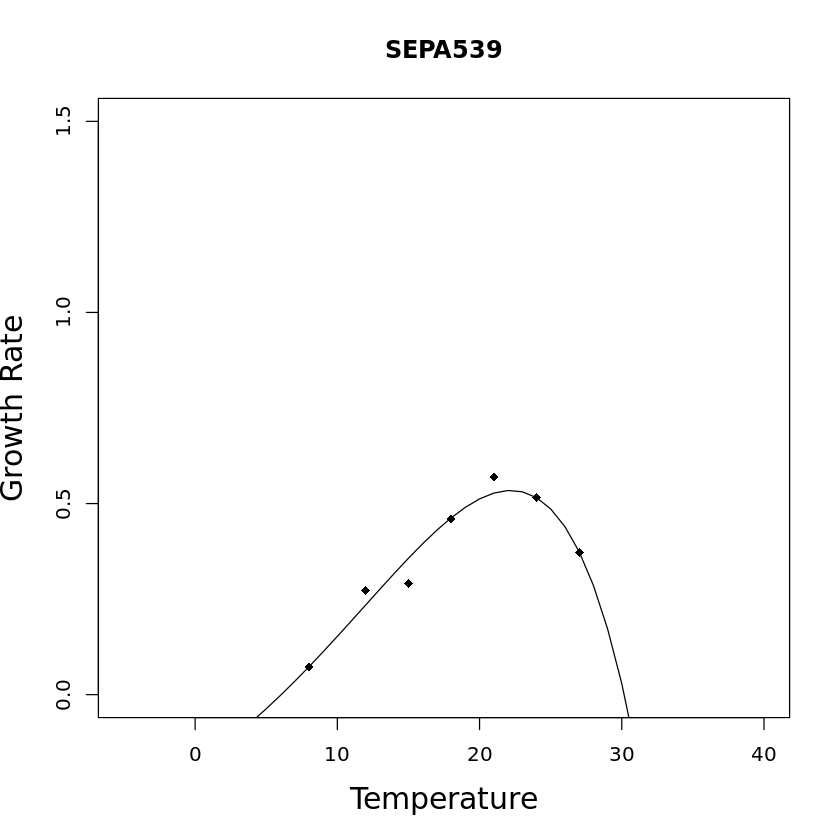

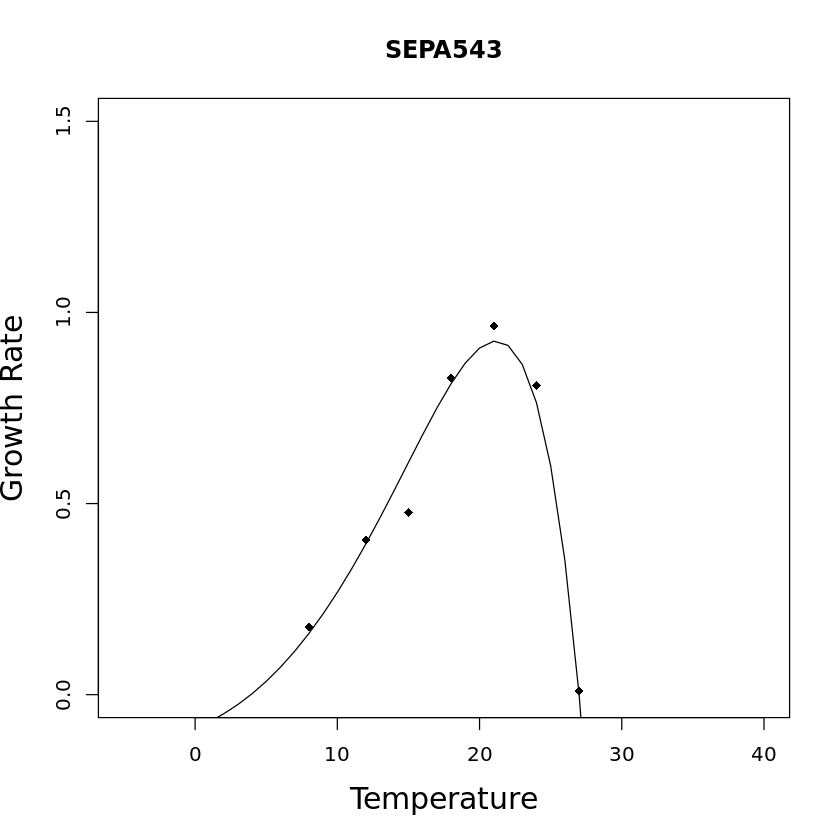

In [17]:
vandassowparam <- function(vandassow,strain) {
    a = 0.01#0.2
    b = 0.0633
    x=seq(-5,40,1)
    bootstrapped_points=vandassow%>%dplyr::filter(Strain==strain) %>%
        dplyr::mutate(GrowthRate=case_when(GrowthRate==0~0.01,
                                           TRUE~GrowthRate))
    print(bootstrapped_points)
    guess_opt = as.numeric(unique((bootstrapped_points %>% 
                            dplyr::filter(GrowthRate==max(GrowthRate,na.rm=T)))$Temperature))
    
    guess_wid = as.numeric(unique((bootstrapped_points %>% dplyr::filter(GrowthRate>0.05) %>%
                            dplyr::filter(Temperature==max(Temperature,na.rm=T)))$Temperature) - 
                           unique((bootstrapped_points %>% dplyr::filter(GrowthRate>0.05) %>%
                            dplyr::filter(Temperature==min(Temperature,na.rm=T)))$Temperature))
    o_guess = guess_opt # optimum temperature
    guess_wid=15
    if (guess_wid!=0) {
        w_guess = guess_wid # thermal niche width
    }
    
    m1 = mle2(minuslogl = LL1, start = list(a = a, b = b,
                                            o = o_guess,w = w_guess),
              data = list(y=as.numeric(bootstrapped_points$GrowthRate),
                          x=as.numeric(bootstrapped_points$Temperature)))
              #upper=c(w=40))
              #control=list(maxit=5000))
              #lower=c(a = 0.01,o = 0,w = 15),
              #upper=c(o=35,b=1,w=30))
    print(summary(m1)@coef["b","Estimate"])
    print("^b")

    y = nbcurve(x=x,
            a=summary(m1)@coef["a","Estimate"],
            b=summary(m1)@coef["b","Estimate"],
            w=summary(m1)@coef["w","Estimate"],
            opt=summary(m1)@coef["o","Estimate"])
    plot_frame=data.frame(x=x,
                          y=y,
                          type="Modeled") %>% 
            dplyr::bind_rows(data.frame(x=bootstrapped_points$Temperature,
                             y=bootstrapped_points$GrowthRate,
                             type="Measured")) %>%
            dplyr::mutate(x=as.numeric(x)) %>%
            dplyr::arrange(x)
    print(y)
    print("^y")
    plot(x,y, typ='l', col="black", cex.lab = 1.5, cex = 1.5,
    xlab="Temperature", ylab="Growth Rate",
    ylim=c(0,1.5))
    points(bootstrapped_points$Temperature,bootstrapped_points$GrowthRate,col="black",pch=18)
    title(as.character(strain))
    coef_list = data.frame("a"=summary(m1)@coef["a","Estimate"],
            "b"=summary(m1)@coef["b","Estimate"],
            "w"=summary(m1)@coef["w","Estimate"],
            "opt"=summary(m1)@coef["o","Estimate"],
            "a_err"=summary(m1)@coef["a","Std. Error"],
            "b_err"=b,
            "w_err"=summary(m1)@coef["w","Std. Error"],
            "opt_err"=summary(m1)@coef["o","Std. Error"],"Strain"=strain)
    return(coef_list)
    return(list(data.frame("Temperature"=x,
                      "ModeledPoints"=y,"Type"="Model",
                      "Strain"=strain) %>% 
           dplyr::bind_rows(data.frame("MeasuredPoints"=bootstrapped_points$GrowthRate,
                                       "Temperature"=as.numeric(bootstrapped_points$Temperature),"Type"="Measure",
                                       "Strain"=strain)),coef_list))
}
all_strains=data.frame()
for (strain in unique(vandassow$Strain)) {
    all_strains=all_strains %>% dplyr::bind_rows(vandassowparam(vandassow,strain))
}

In [209]:
all_strains

a          b           w        opt       a_err       b_err  w_err      
1  0.12649330  0.10503179 24.52002 16.228724  0.10710263 0.0633         NaN
2  0.05212312  0.17068446 26.34847 12.095898  0.07897071 0.0633         NaN
3  0.04025699  0.16949324 29.35120 12.917422  0.04037661 0.0633         NaN
4  0.26018314  0.06540662 18.30091 18.925131  0.92820936 0.0633  3.65418702
5  0.12003917  0.09119758 23.45586 16.793632         NaN 0.0633         NaN
6  2.23604533 -0.04284719 17.30152 22.402665         NaN 0.0633         NaN
7  0.05722025  0.16980431 21.36172 13.318391         NaN 0.0633         NaN
8  0.14821793  0.09071980 24.92111 16.932352  0.58523055 0.0633  9.26360873
9  0.35369097  0.04852518 14.25740 20.577447  0.77585269 0.0633         NaN
10 0.22793568  0.07298758 18.76565 18.937652         NaN 0.0633         NaN
11 0.07469331  0.11983445 22.41986 16.763183  0.14960982 0.0633  2.87792262
12 0.06239047  0.12776670 18.73306 17.633163         NaN 0.0633         NaN
13 0.08814090  0.10822561 14.83017 20.726759  0.65494562 0.0633  4.26465850
14 0.43746542  0.03054820 19.50399 20.078621  3.02995714 0.0633  9.29608687
15 0.29733181  0.05710550 15.07332 20.853995         NaN 0.0633         NaN
16 0.12726493  0.08275765 19.23804 17.421586  0.17071776 0.0633  0.27579407
17 0.27508982  0.06450250 14.28783 16.855522         NaN 0.0633         NaN
18 0.14075612  0.09293224 19.14181 14.428629         NaN 0.0633         NaN
19 0.07156405  0.11455983 15.62445 14.751628  0.41831297 0.0633  3.89573223
20 0.16783070  0.07317025 20.17685 18.089379         NaN 0.0633         NaN
21 0.16452787  0.07492636 19.03805 17.519299  0.54250162 0.0633  0.41469458
22 0.41852081  0.03142251 19.56836 22.345761  1.37264451 0.0633         NaN
23 0.09529246  0.10098852 15.43447 21.519800  1.26974243 0.0633 12.44978018
24 1.00473315 -0.00521792 14.74782 21.009544 15.20848471 0.0633  6.52415692
25 0.04774936  0.13652725 14.56954 21.412172  0.30282406 0.0633  2.97527208
26 0.08302241  0.12737839 25.38204 15.421828  0.25158313 0.0633 15.74226187
27 0.10012766  0.11500037 24.23514 16.096885  0.07737726 0.0633         NaN
28 0.05905273  0.14900448 26.37166 14.547353  0.06188546 0.0633         NaN
29 0.11386833  0.10151409 21.58820 16.204983  0.41148808 0.0633  0.64014508
30 0.02669066  0.18241874 18.69403 17.347387         NaN 0.0633  0.08383592
31 0.39812404  0.03533570 16.35900 20.854337  0.43195698 0.0633  3.11895713
32 0.15852854  0.06790927 21.00832 18.595754  0.08121041 0.0633  0.03945708
33 0.49170947  0.04318928 15.98813 20.154484         NaN 0.0633         NaN
34 0.02352598  0.17504265 27.94045 13.385510  0.02730277 0.0633  0.03564853
35 0.07290008  0.11855926 18.92471 17.462978         NaN 0.0633         NaN
36 0.12400203  0.09400267 24.18722 14.945024  0.17019273 0.0633  0.31318562
37 0.12213899  0.08716399 17.63415 18.182269         NaN 0.0633         NaN
38 0.12386010  0.08042971 21.63848 16.180084  0.25428502 0.0633  0.52833142
39 0.04882003  0.13465174 33.57271 10.259400  0.06911718 0.0633  0.39536400
40 0.03778416  0.14202101 28.34612 13.111708  0.05054234 0.0633         NaN
41 0.04198654  0.15340917 36.85566  8.652738  0.05214247 0.0633  0.43464271
42 0.10504862  0.09425123 14.65243 19.673490         NaN 0.0633  0.12693291
43 0.11199114  0.08978279 21.59881 16.200479  0.26588219 0.0633  0.51729100
44 0.14376469  0.10290366 20.91165 16.566791  0.20517930 0.0633  0.23721383
45 0.14780801  0.06337890 24.12535 18.114388  0.58727919 0.0633  8.50052681
46 0.11098917  0.11343563 23.07825 15.460701         NaN 0.0633         NaN
   opt_err    Strain 
1         NaN SEPA92 
2         NaN SEPA100
3         NaN SEPA127
4  2.64541043 SEPA340
5         NaN SEPA342
6         NaN SEPA350
7         NaN SEPA118
8  8.54657361 SEPA81 
9         NaN SEPA341
10        NaN SEPA365
11 1.89595685 SEPA373
12        NaN SEPA527
13 3.66477782 SEPA528
14 8.20390513 SEPA529
15        NaN SEPA530
16 0.23479447 SEPA516
17        NaN SEPA184
18        NaN SEPA194
19 4.08033290

In [211]:
all_strains[curr,"b"]

[1] 0.1050318

In [27]:
recalculate=FALSE
all_strains=all_strains%>%dplyr::filter(!is.na(opt))
revised_df_vanDassow=data.frame()
for (curr in c(1:nrow(derived_traits))) {
  strain_curr=all_strains$Strain[curr]
  group_curr="coccolithophores"
  if (length(group_curr)==0) {
    group_curr="unknown"
  }
  a=all_strains[curr,"a"]
  b=all_strains[curr,"b"]
  w=all_strains[curr,"w"]
  opt=all_strains[curr,"opt"]
  opt_val = optimize(nbcurve,interval=c(-20,40),maximum=TRUE,
                     a=a,
                     b=b,
                     w=w,
                     opt=opt)$maximum
  if (abs(opt_val) > 100) {
    next # these original parameterizations were bad.
  }
  wid_eq_1 = all_strains[curr,"w"]/2+
    opt
  wid_eq_2 = -all_strains[curr,"w"]/2+
    opt
  tol_gr=0.01 ## we don't want to say the width is valid when GR<this
  test_temp=wid_eq_1
  while ((nbcurve(test_temp,opt,w,a,b) < tol_gr)) {
    test_temp=test_temp+sign(test_temp)*-0.001
  }
  wid_eq_1=test_temp
  test_temp=wid_eq_2
  while ((nbcurve(test_temp,opt,w,a,b) < tol_gr)) {
    test_temp=test_temp+sign(test_temp-wid_eq_1)*-0.001
  }
  wid_eq_2=test_temp
  
  if (recalculate) {
    wid_eq_1 = (all_strains[curr,"w"])/2+
      opt_val
    wid_eq_2 = -(all_strains[curr,"w"])/2+
      opt_val
  }
  tolerance_val=nbcurve(opt_val,opt,w,a,b)*0.8
  temps_test=seq(from = wid_eq_2+sign(wid_eq_2)*wid_eq_2*0.5, 
                 to = wid_eq_1+sign(wid_eq_2)*wid_eq_2*0.5, by = 0.01)
  window_1 = -100
  window_2 = -100
  print(paste0(tolerance_val,"; window",window_1," to ",window_2,"; strain:",strain_curr))
  for (temp in temps_test) {
    if ((window_1<0)&(window_2<0)&(nbcurve(temp,opt,w,a,b) >= tolerance_val)) {
      window_1 = temp
    }else if ((window_2<0)&(window_1>0)&(nbcurve(temp,opt,w,a,b) <= tolerance_val)){
      window_2=temp
    }
  }
  if ((window_1==-100)|(window_2==-100)){
    print("broken")
    break
  }
  if (abs(wid_eq_2-wid_eq_1) > 50) {
    print("broken")
    #break
  }
  revised_df_vanDassow = rbind(revised_df_vanDassow,
                     data.frame(Strain=strain_curr,Revised_opt=opt_val,
                                Group=group_curr,
                                Revised_wid=abs(wid_eq_2-wid_eq_1),
                                Revised_plateau=abs(window_1-window_2),
                                low_temp=window_1,high_temp=window_2,
                                max_GR=nbcurve(opt_val,opt,w,a,b),
                                t_opt=opt_val,a=a,b=b,w=w))
}
revised_df_vanDassow$left_plateau=revised_df_vanDassow$t_opt-revised_df_vanDassow$low_temp
revised_df_vanDassow$right_plateau=revised_df_vanDassow$high_temp-revised_df_vanDassow$t_opt

[1] "0.79471068182236; window-100 to -100; strain:SEPA92"
[1] "0.818615811824669; window-100 to -100; strain:SEPA100"
[1] "0.839197968535759; window-100 to -100; strain:SEPA127"
[1] "0.782132130789302; window-100 to -100; strain:SEPA340"
[1] "0.573471442678414; window-100 to -100; strain:SEPA342"
[1] "0.708543976441781; window-100 to -100; strain:SEPA350"
[1] "0.835038950043207; window-100 to -100; strain:SEPA118"
[1] "0.730738216304859; window-100 to -100; strain:SEPA81"
[1] "0.790993133934462; window-100 to -100; strain:SEPA341"
[1] "0.81191371853041; window-100 to -100; strain:SEPA365"
[1] "0.653963152148173; window-100 to -100; strain:SEPA373"
[1] "0.64940701939842; window-100 to -100; strain:SEPA527"
[1] "0.772135825066275; window-100 to -100; strain:SEPA528"
[1] "0.660612678156336; window-100 to -100; strain:SEPA529"
[1] "0.818832471663234; window-100 to -100; strain:SEPA530"
[1] "0.499114640363261; window-100 to -100; strain:SEPA516"
[1] "0.687418730291862; window-100 to -100; s

Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf replaced by maximum positive value”
Warning message in optimize(nbcurve, interval = c(-20, 40), maximum = TRUE, a = a, :
“NA/Inf repl

ERROR: Error in while ((nbcurve(test_temp, opt, w, a, b) < tol_gr)) {: missing value where TRUE/FALSE needed


In [225]:
all_strains[curr,]# %>% dplyr::filter(!is.na(opt))

a  b  w  opt a_err b_err w_err opt_err Strain
NA NA NA NA NA  NA    NA    NA    NA      NA

Joining with `by =
join_by(Strain)`
Joining with `by =
join_by(Strain)`


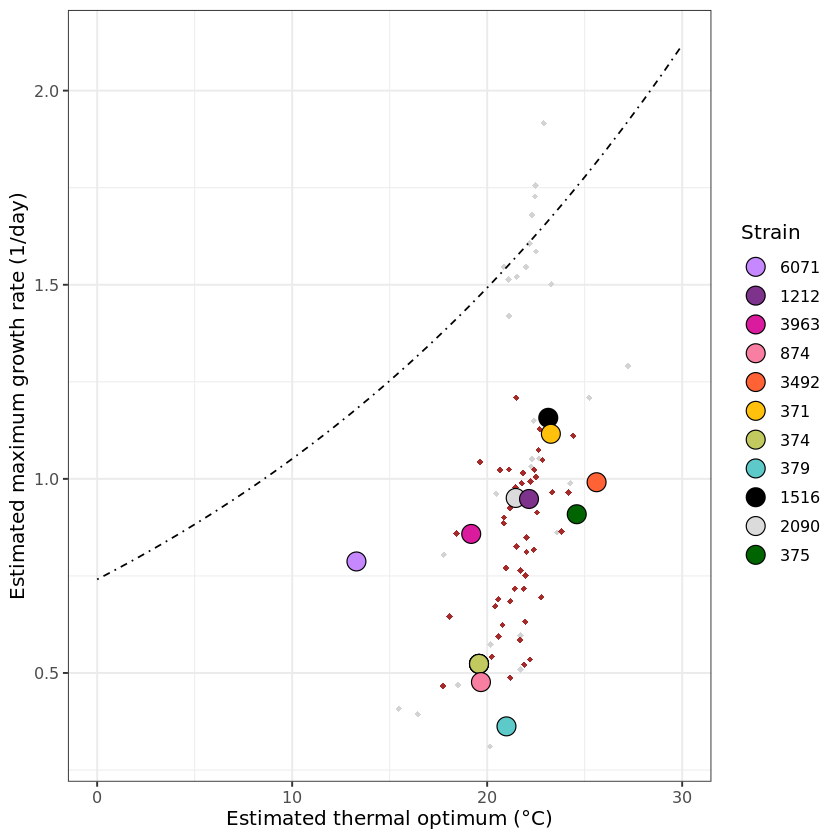

In [28]:
eppley_comp = ggplot(all_params_coef%>%dplyr::left_join(revised_df_2 %>% 
                                                        dplyr::mutate(Strain=as.numeric(as.character(Strain)))) %>%
          dplyr::left_join(all_params %>% dplyr::group_by(Strain) %>% 
                           dplyr::filter(MeasuredPoints==max(MeasuredPoints,na.rm=T))) %>%
          dplyr::mutate(Strain=factor(Strain,levels=unique(Strain))))+ 
    geom_point(data=revised_df%>%dplyr::filter(Group=="coccolithophores"),
               aes(x=t_opt,y=max_GR),color="light gray",pch=18)+
    geom_point(data=revised_df_vanDassow,
               aes(x=t_opt,y=max_GR),color="brown",pch=18)+
    geom_point(aes(x = Revised_opt, y =MeasuredPoints,fill=Strain),size=5,color="black",
               pch=21) +
    #geom_smooth(aes(x = Revised_opt, y =MeasuredPoints), method="lm") +
    geom_line(data=data.frame(x=c(0:30),y=0.741*exp(0.035*c(0:30))),
              mapping=aes(x=x,y=y),linetype="dotdash") + 
    theme_bw(base_size=12) + 
    #theme(legend.position="none") + 
    ylab("Estimated maximum growth rate (1/day)") + xlab("Estimated thermal optimum (°C)") + 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors) +
    scale_size(name="Thermal width")
eppley_comp

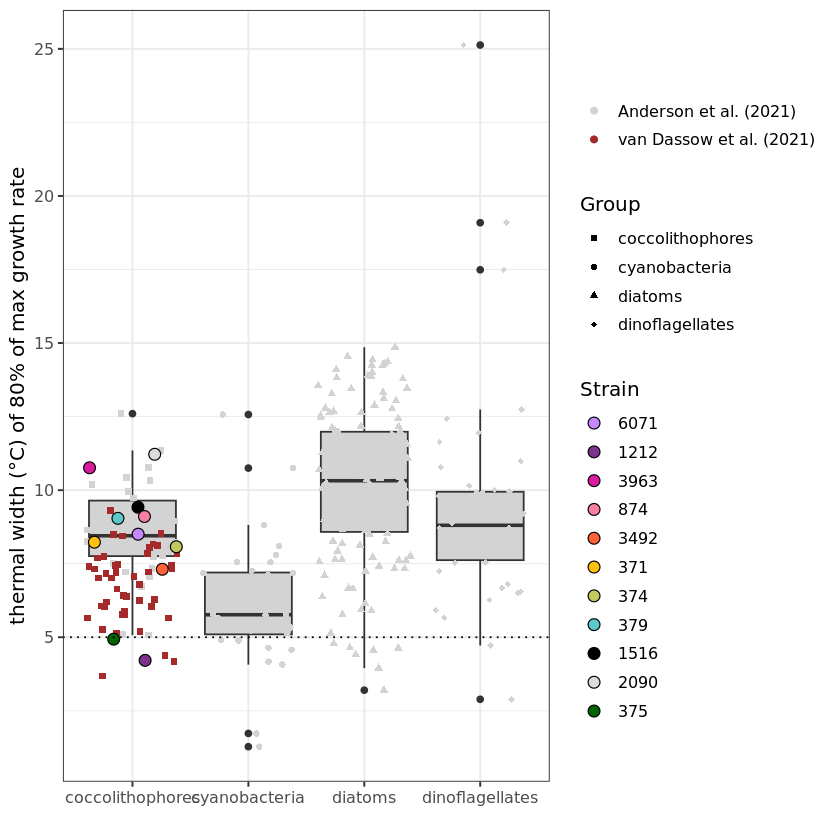

In [29]:
by_grp_plateau=ggplot(revised_df) + 
    geom_boxplot(aes(x=Group,y=Revised_plateau),fill="light gray") +
    geom_jitter(aes(x=Group,y=Revised_plateau,shape=Group,col="Anderson et al. (2021)"))+
    geom_jitter(data=revised_df_vanDassow,aes(x=Group,y=Revised_plateau,shape=Group,col="van Dassow et al. (2021)"))+
    scale_color_manual(values=c("light gray","brown"),name="") + 
    theme_bw(base_size=12)+
    scale_shape_manual(values=c(15,16,17,18))+
    xlab("") + ylab("thermal width (°C) of 80% of max growth rate")+ 
    geom_jitter(data=revised_df_plateau,aes(x="coccolithophores",y=Revised_plateau,fill=factor(Strain)),
               pch=21,
               size=3)+
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain")+
    geom_hline(aes(yintercept=5),linetype="dotted",color="black")
by_grp_plateau

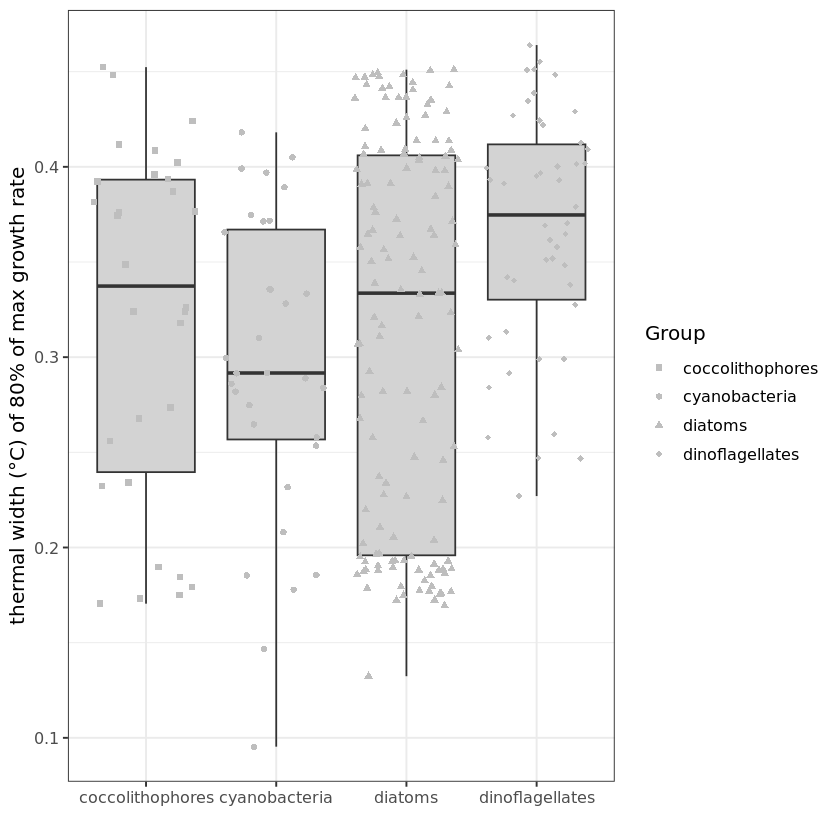

In [161]:
by_grp_plateau_scale=ggplot(revised_df) + 
    geom_boxplot(aes(x=Group,y=Revised_plateau/Revised_wid),fill="light gray") +
    geom_jitter(aes(x=Group,y=Revised_plateau/Revised_wid,shape=Group),col="gray")+
    theme_bw(base_size=12)+
    scale_shape_manual(values=c(15,16,17,18))+
    xlab("") + ylab("thermal width (°C) of 80% of max growth rate")+ 
    #geom_jitter(data=revised_df_width,aes(x="coccolithophores",y=Revised_wid,fill=factor(Strain)),
    #           pch=21,
    #           size=3)+
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)#+
    #geom_hline(aes(yintercept=5),linetype="dotted",color="black")
by_grp_plateau_scale

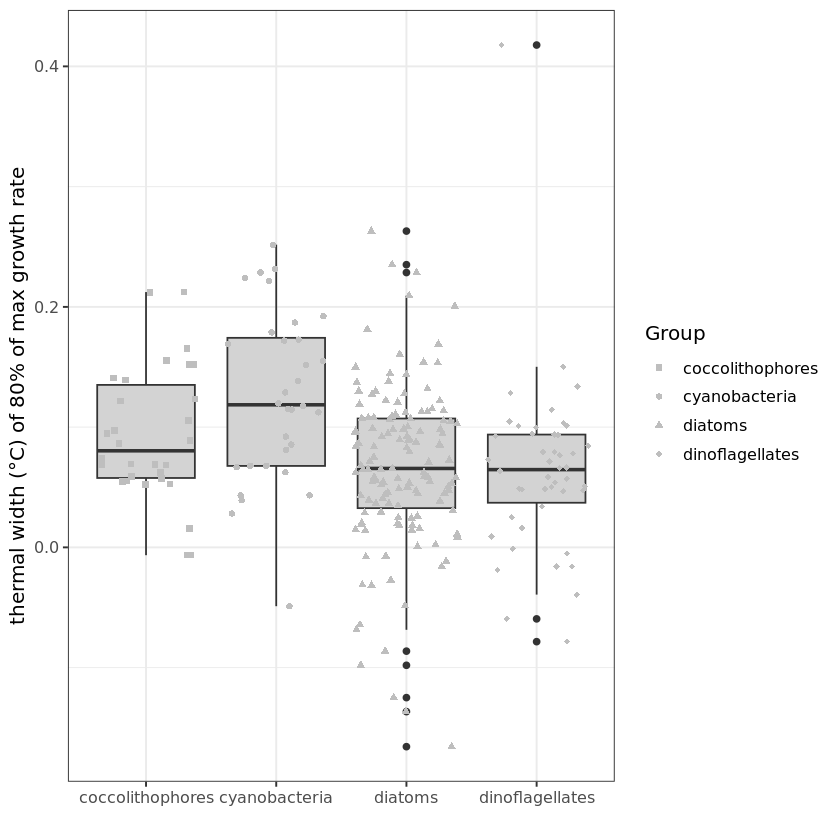

In [106]:
by_grp_plateau_sim=ggplot(revised_df) + 
    geom_boxplot(aes(x=Group,y=b),fill="light gray") +
    geom_jitter(aes(x=Group,y=b,shape=Group),col="gray")+
    theme_bw(base_size=12)+
    scale_shape_manual(values=c(15,16,17,18))+
    xlab("") + ylab("thermal width (°C) of 80% of max growth rate")+ 
    #geom_jitter(data=revised_df_width,aes(x="coccolithophores",y=Revised_wid,fill=factor(Strain)),
    #           pch=21,
    #           size=3)+
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)#+
    #geom_hline(aes(yintercept=5),linetype="dotted",color="black")
by_grp_plateau_sim

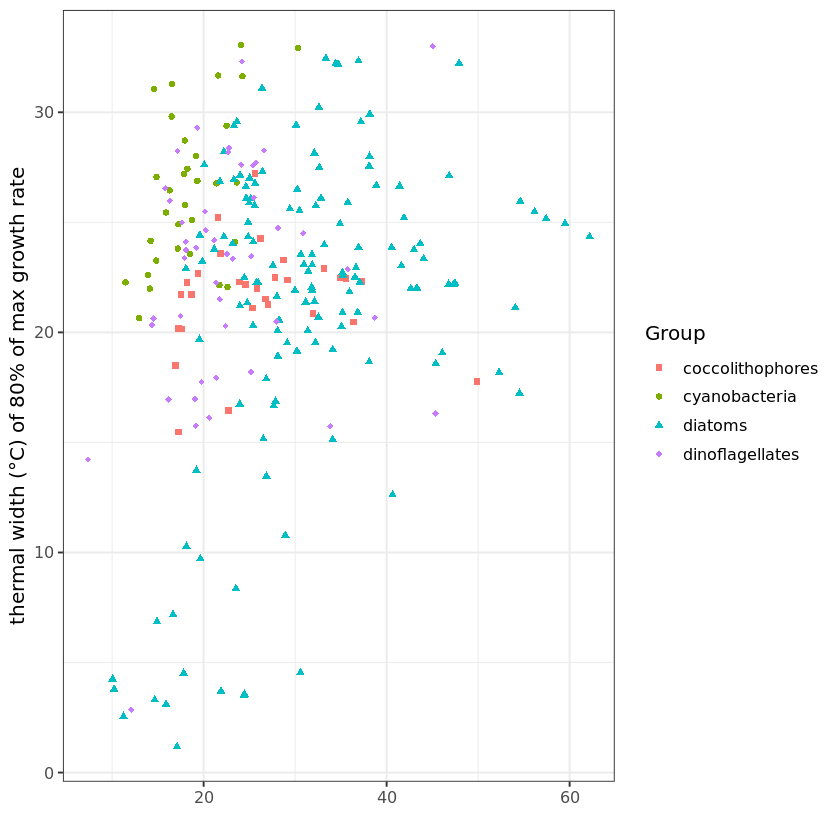

In [87]:
ggplot(revised_df) + 
    geom_jitter(aes(x=Revised_wid,y=t_opt,shape=Group,col=Group))+
    theme_bw(base_size=12)+
    scale_shape_manual(values=c(15,16,17,18))+
    xlab("") + ylab("thermal width (°C) of 80% of max growth rate")+ 
    #geom_jitter(data=revised_df_width,aes(x="coccolithophores",y=Revised_wid,fill=factor(Strain)),
    #           pch=21,
    #           size=3)+
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)#+
    #geom_hline(aes(yintercept=5),linetype="dotted",color="black")

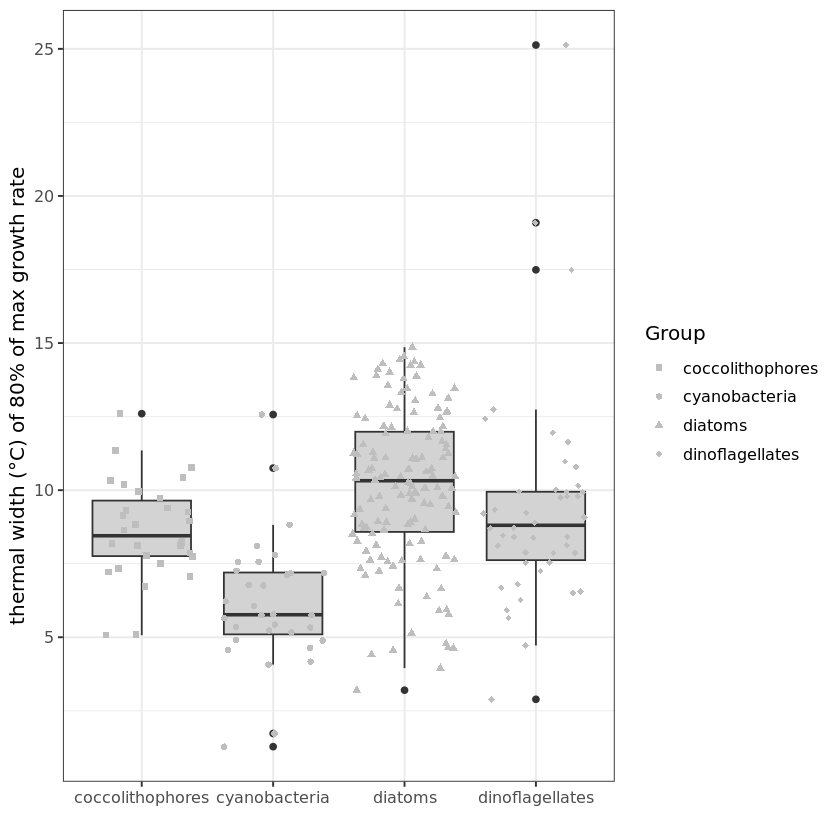

In [157]:
by_grp_plateau_simp=ggplot(revised_df) + 
    geom_boxplot(aes(x=Group,y=Revised_plateau),fill="light gray") +
    geom_jitter(aes(x=Group,y=Revised_plateau,shape=Group),col="gray")+
    theme_bw(base_size=12)+
    scale_shape_manual(values=c(15,16,17,18))+
    xlab("") + ylab("thermal width (°C) of 80% of max growth rate")+ 
    #geom_jitter(data=revised_df_width,aes(x="coccolithophores",y=Revised_wid,fill=factor(Strain)),
    #           pch=21,
    #           size=3)+
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)#+
    #geom_hline(aes(yintercept=5),linetype="dotted",color="black")
by_grp_plateau_simp

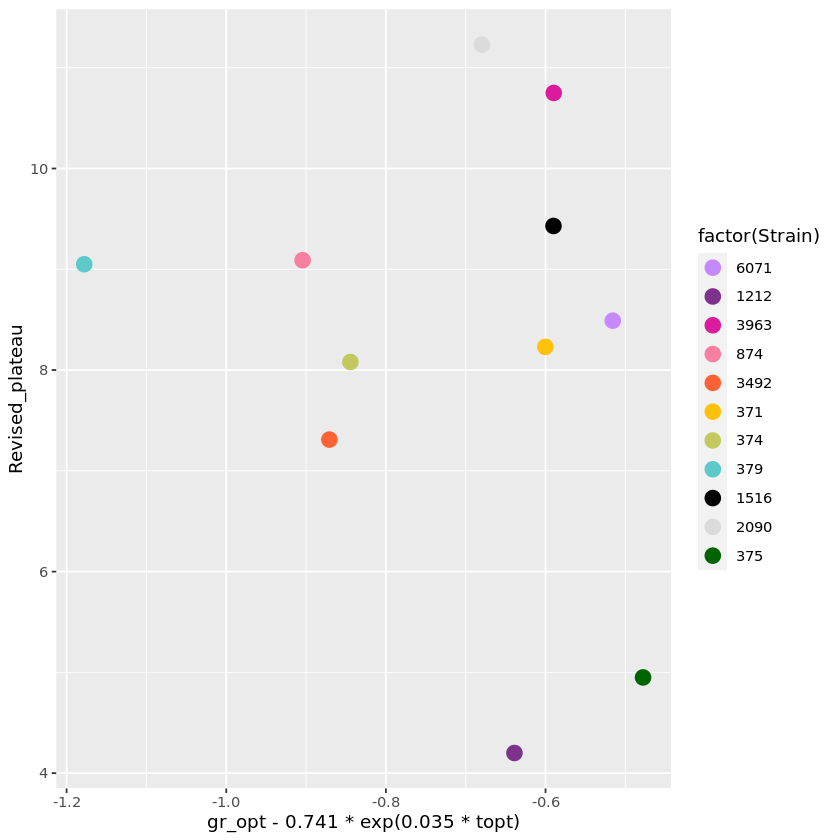

In [158]:
ggplot(revised_df_plateau) + geom_point(aes(x=gr_opt-0.741*exp(0.035*topt),
                                            y=Revised_plateau,color=factor(Strain)),size=4)+
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)

In [126]:
revised_df_plateau

Strain Revised_plateau low_temp  high_temp topt     gr_opt    left_plateau
1   374    8.08           15.010551 23.09055  19.58152 0.6260184 4.570972    
2  3963   10.75           13.680812 24.43081  19.18172 0.8603201 5.500906    
3  3492    7.31           22.535532 29.84553  25.61106 0.9451751 3.075532    
4  1516    9.43           17.752610 27.18261  23.13286 1.0750877 5.380251    
5   874    9.09           14.701134 23.79113  19.68094 0.5712779 4.979808    
6   375    4.95           21.946420 26.89642  24.59385 1.2746688 2.647425    
7  2090   11.23           15.380968 26.61097  21.46341 0.8908356 6.082439    
8   379    9.05           16.059217 25.10922  20.98970 0.3668051 4.930484    
9  1212    4.20           20.988086 25.18809  22.14586 0.9696016 1.157775    
10  371    8.23           19.239446 27.46945  23.26621 1.0725932 4.026765    
11 6071    8.49            8.606928 17.09693  13.29617 0.6643287 4.689245    
   right_plateau
1  3.509028     
2  5.249094     
3  4.234468     
4  4.049749     
5  4.110192     
6  2.302575     
7  5.147561     
8  4.119516     
9  3.042225     
10 4.203235     
11 3.800755

In [37]:
all_params_coef

a          b           w        opt      a_err      b_err w_err     
1  0.17394705 0.071300892 20.80231 16.14560 0.02275646 0.01  0.03624649
2  0.72777710 0.008870916 24.12235 18.53832 0.89559156 0.01  0.59467380
3  0.41741480 0.033055737 21.17475 23.81191        NaN 0.01         NaN
4  0.26721485 0.066171077 24.98224 18.63879 0.26793100 0.01  0.13528875
5  0.25345497 0.043952256 21.65371 17.23622 0.17486811 0.01  0.20879375
6  0.03454827 0.161768705 19.92580 19.05065 0.03691808 0.01  0.08940676
7  0.47716739 0.030904070 26.32552 18.88865 0.56711825 0.01  0.18452195
8  0.16057197 0.041555415 21.40711 18.71665 0.09472308 0.01  0.06123327
9  0.25151945 0.063708092 16.30761 20.15439 0.49686583 0.01  0.17989665
10 0.52132676 0.032172734 20.87983 21.55978 0.93759456 0.01  0.27207021
11 0.35551831 0.051858146 20.52977 10.73427 0.17139389 0.01  0.10607950
   opt_err    Strain
1  0.02247120  374  
2  0.31516018 3963  
3         NaN 3492  
4  0.08506004 1516  
5  0.13181901  874  
6  0.07839536  375  
7  0.11036632 2090  
8  0.21864872  379  
9         NaN 1212  
10 0.20525227  371  
11 0.05025127 6071

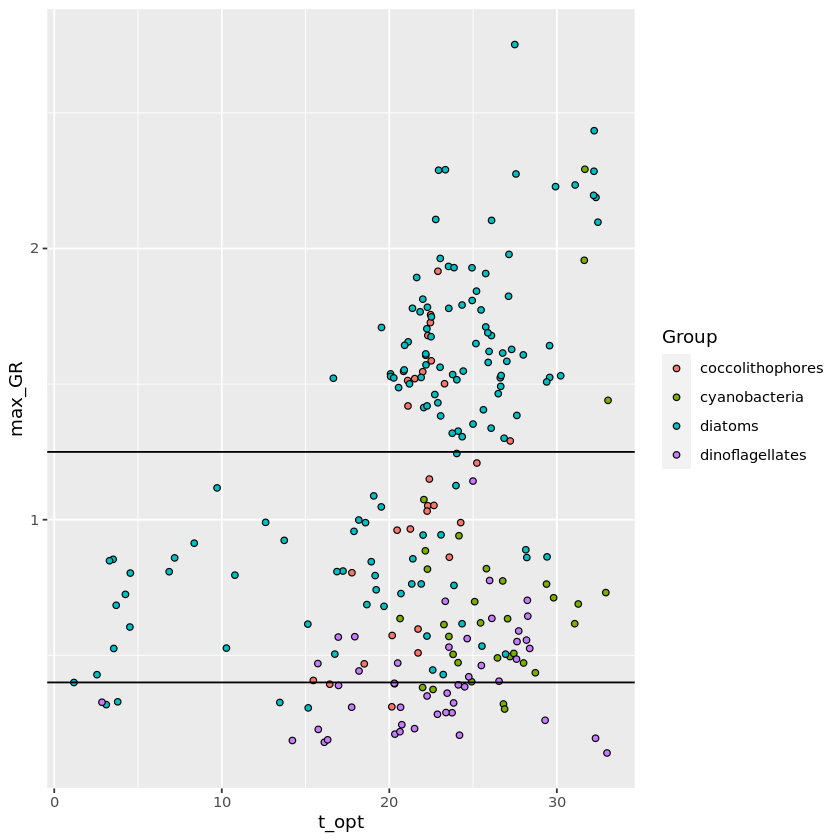

In [102]:
ggplot(revised_df) + geom_point(aes(x=t_opt,y=max_GR,fill=Group),pch=21) + 
    geom_hline(aes(yintercept=0.4)) + geom_hline(aes(yintercept=1.25))

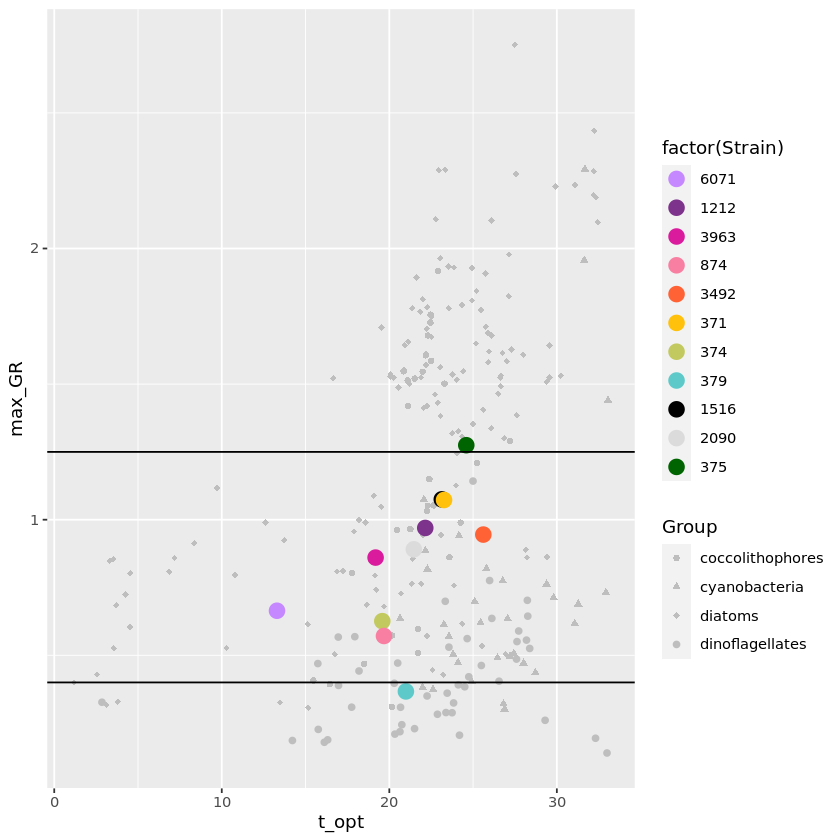

In [159]:
ggplot(revised_df) + geom_point(aes(x=t_opt,y=max_GR,shape=Group),color="gray") + 
    scale_shape_manual(values=c(16,17,18,19)) + 
    geom_point(data=revised_df_plateau,aes(x=topt,y=gr_opt,color=factor(Strain)),size=4)+ 
    geom_hline(aes(yintercept=0.4)) + geom_hline(aes(yintercept=1.25))+
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors)

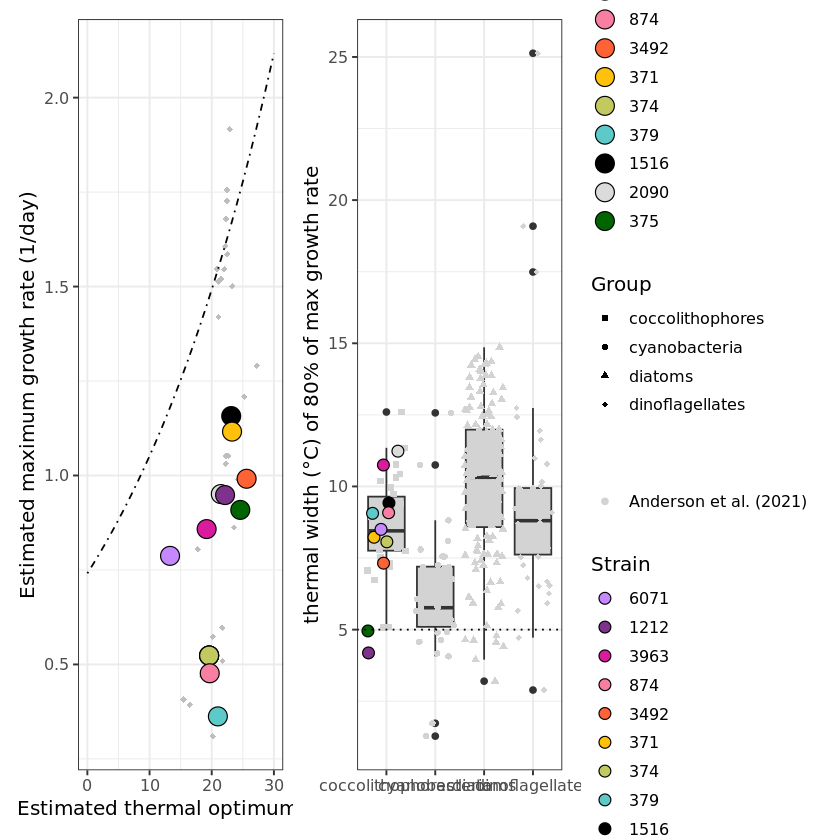

In [167]:
(eppley_comp | by_grp_plateau) + plot_layout(guides = "collect")
ggsave("eppley_side_by_side.png",width=13,height=8,units="in")

In [20]:
ssc_separated=read.csv("../../data/ssc_separated.csv")

In [21]:
head(ssc_separated)

X Strain Position Temperature SSC_vals FSC_vals RedB_vals GR_Calc_placeholder
1 1 371    1        6.8         3553.321 11998.94 NA        T0                 
2 2 371    1        6.8         3553.321 11998.94 NA        T0                 
3 3 371    1        6.8         3553.321 11998.94 NA        T0                 
4 4 371    3        9.5         3553.321 11998.94 NA        T0                 
5 5 371    3        9.5         3553.321 11998.94 NA        T0                 
6 6 371    3        9.5         3553.321 11998.94 NA        T0

In [31]:
side_scatter=ggplot(ssc_separated%>%dplyr::filter(!is.na(RedB_vals)) %>% 
     dplyr::mutate(RedB_vals=as.numeric(as.character(RedB_vals)),
                   SSC_vals=as.numeric(as.character(SSC_vals)),
                   FSC_vals=as.numeric(as.character(FSC_vals))) %>%
     dplyr::filter(!is.na(RedB_vals)&(RedB_vals!=0)&(SSC_vals!=0)&(!is.na(SSC_vals))&
       (FSC_vals!=0)&(!is.na(FSC_vals))&(GR_Calc_placeholder=="TF")) %>%
     dplyr::filter((log10(RedB_vals) > 5)&(log10(FSC_vals) > 5.5)) %>%dplyr::arrange(desc(RedB_vals)) %>%
     dplyr::mutate(isbelow10 = case_when(as.numeric(Temperature)<10 ~ "a",
                                         TRUE ~ "z")))+
     geom_violin(aes(y = FSC_vals, x=factor(Strain),
                     fill=factor(Strain),color=factor(Strain), alpha=as.numeric(Temperature),
                     group=paste0(Strain,isbelow10,Temperature)))+scale_y_log10()+ 
    scale_fill_manual(breaks=as.character((strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% 
                                                             dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain") + 
    scale_color_manual(breaks=as.character((strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        limits=as.character((strain_color_frame_harriet %>% 
                                                             dplyr::filter(Strains %in% all_params$Strain))$Strains),
                                        values=(strain_color_frame_harriet %>% 
                                                dplyr::filter(Strains %in% all_params$Strain))$Colors,
                      name="Strain") + xlab("") + ylab("Forward scatter") + 
    scale_alpha(name="Temperature",range=c(0.25,1))+
    theme_bw(base_size=12)

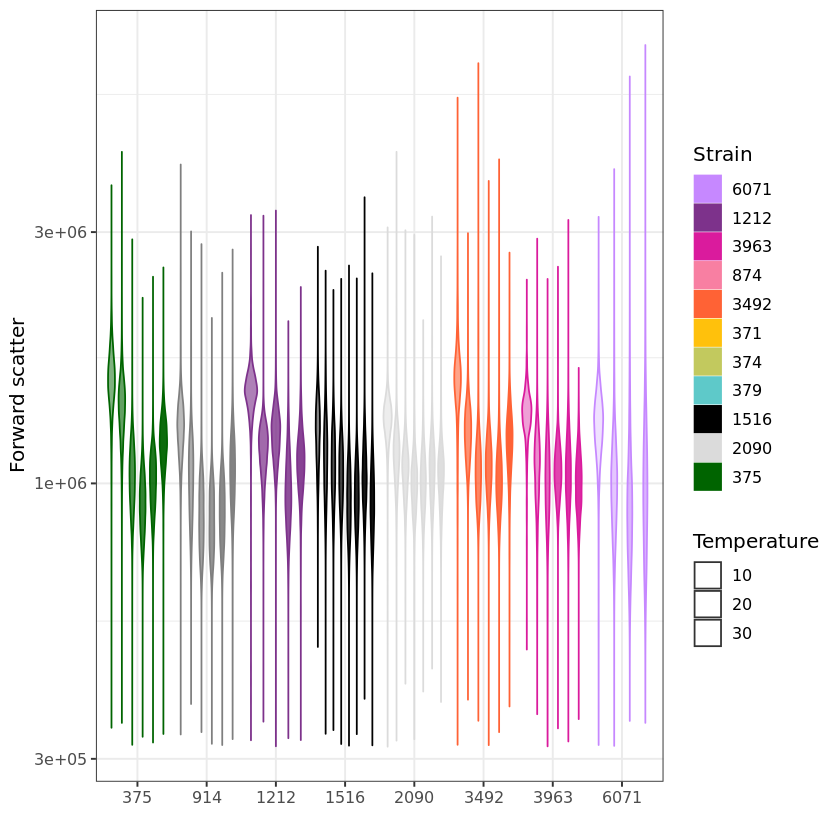

In [33]:
side_scatter

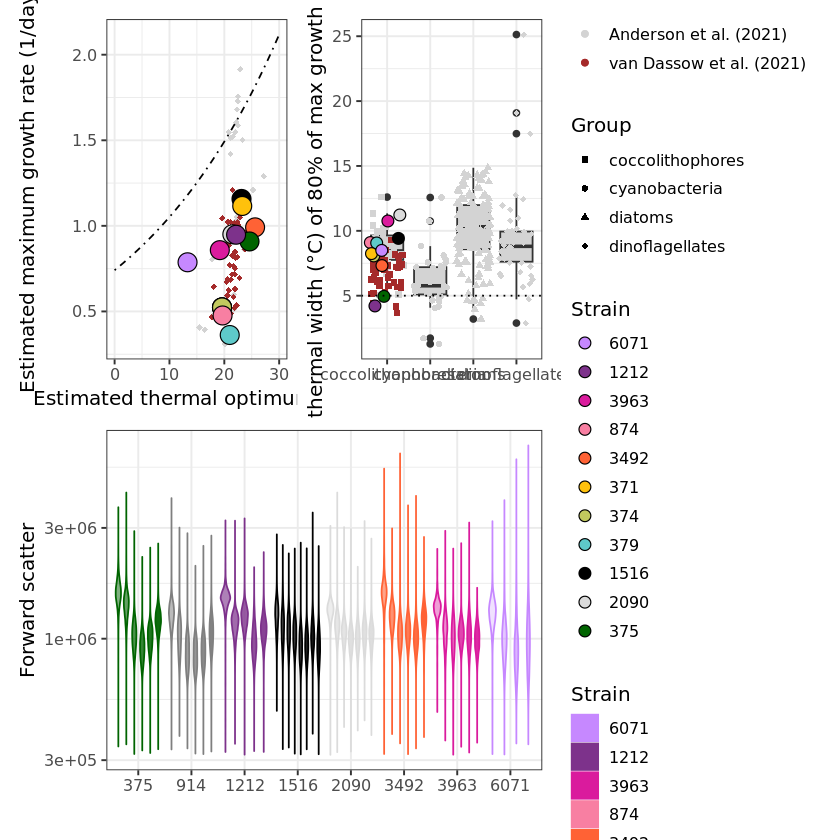

In [34]:
((eppley_comp | by_grp_plateau)/side_scatter) + plot_layout(guides = "collect")
ggsave("Fig3_eppley_otherdata.pdf",width=12,height=10,units="in")
